## 데이터 그래프화

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import mplfinance as mpf
import numpy as np

In [8]:
from mplfinance.original_flavor import candlestick2_ohlc

In [38]:
pip install natsort

Note: you may need to restart the kernel to use updated packages.


In [47]:
df = pd.read_csv('./btc_30min/btc_5min_1672.csv', names=['DateTime', 'Open', 'High', 'Low', 'Close',
                                                     'Volume'])

In [48]:
df.dtypes

DateTime     object
Open          int64
High          int64
Low           int64
Close         int64
Volume      float64
dtype: object

In [49]:
df.index = pd.DatetimeIndex(df['DateTime'])

In [50]:
df = df.drop(['DateTime'], axis = 1)

In [51]:
df = df.sort_values('DateTime', ascending=True)

In [52]:
df

Open     High      Low    Close    Volume
DateTime                                                         
2017-09-29 23:30:00  4641000  4664000  4641000  4657000  0.167528
2017-09-30 00:00:00  4657000  4665000  4651000  4660000  0.093726
2017-09-30 00:30:00  4659000  4676000  4653000  4676000  0.060747
2017-09-30 01:00:00  4672000  4683000  4672000  4676000  0.075466
2017-09-30 01:30:00  4676000  4705000  4674000  4700000  0.975568
2017-09-30 02:00:00  4701000  4705000  4685000  4697000  0.623003
2017-09-30 02:30:00  4699000  4704000  4695000  4703000  0.089772
2017-09-30 03:00:00  4706000  4710000  4694000  4703000  0.583020
2017-09-30 03:30:00  4698000  4706000  4695000  4695000  0.061034
2017-09-30 04:00:00  4694000  4704000  4693000  4702000  0.076965
2017-09-30 04:30:00  4700000  4716000  4693000  4711000  0.194167
2017-09-30 05:00:00  4711000  4737000  4711000  4737000  0.068091
2017-09-30 05:30:00  4734000  4747000  4720000  4738000  0.986102
2017-09-30 06:00:00  4736000  4753000  4731000  4731000  0.361388
2017-09-30 06:30:00  4735000  4762000  4735000  4762000  0.095127
2017-09-30 07:00:00  4764000  4764000  4747000  4749000  0.104850
2017-09-30 07:30:00  4752000  4776000  4748000  4776000  0.104438
2017-09-30 08:00:00  4774000  4778000  4760000  4767000  0.856400
2017-09-30 08:30:00  4764000  4768000  4746000  4749000  0.071270
2017-09-30 09:00:00  4754000  4754000  4725000  4744000  0.393228
2017-09-30 09:30:00  4748000  4759000  4729000  4743000  0.768488
2017-09-30 10:00:00  4743000  4766000  4734000  4766000  0.566059
2017-09-30 10:30:00  4764000  4767000  4752000  4752000  0.520811
2017-09-30 11:00:00  4750000  4761000  4741000  4751000  0.762993
2017-09-30 11:30:00  4751000  4761000  4744000  4744000  0.072136
2017-09-30 12:00:00  4749000  4755000  4741000  4753000  0.078474
2017-09-30 12:30:00  4755000  4756000  4745000  4753000  0.093630
2017-09-30 13:00:00  4753000  4771000  4753000  4764000  0.279125
2017-09-30 13:30:00  4764000  4774000  4759000  4773000  0.225143
2017-09-30 14:00:00  4770000  4776000  4757000  4771000  0.435239
2017-09-30 14:30:00  4779000  4788000  4773000  4788000  0.333918
2017-09-30 15:00:00  4788000  4802000  4783000  4799000  0.078934
2017-09-30 15:30:00  4801000  4815000  4797000  4804000  0.344200
2017-09-30 16:00:00  4803000  4845000  4803000  4845000  0.723471
2017-09-30 16:30:00  4840000  4844000  4779000  4790000  1.351781
2017-09-30 17:00:00  4789000  4809000  4780000  4792000  1.095156
2017-09-30 17:30:00  4793000  4798000  4783000  4790000  0.075269
2017-09-30 18:00:00  4792000  4814000  4777000  4814000  1.017613
2017-09-30 18:30:00  4806000  4815000  4799000  4806000  0.073112
2017-09-30 19:00:00  4806000  4818000  4801000  4811000  0.325084
2017-09-30 19:30:00  4812000  4830000  4809000  4830000  0.178507
2017-09-30 20:00:00  4826000  4850000  4826000  4849000  0.823033
2017-09-30 20:30:00  4844000  4851000  4839000  4843000  0.084645
2017-09-30 21:00:00  4847000  4859000  4839000  4853000  0.429494
2017-09-30 21:30:00  4849000  4859000  4844000  4852000  0.266062
2017-09-30 22:00:00  4850000  4853000  4839000  4841000  0.978380
2017-09-30 22:30:00  4845000  4863000  4842000  4863000  1.146904
2017-09-30 23:00:00  4863000  4880000  4863000  4879000  0.915179
2017-09-30 23:30:00  4879000  4896000  4879000  4895000  0.081281

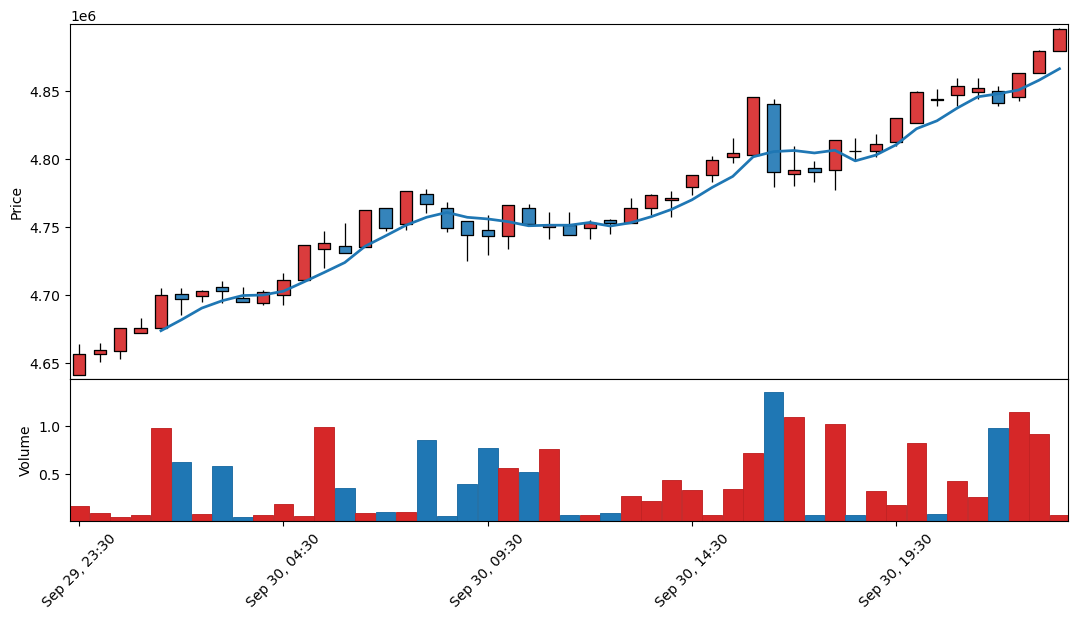

In [53]:
colorset = mpf.make_marketcolors(up='tab:red', down='tab:blue', volume='in')
s = mpf.make_mpf_style(marketcolors=colorset)

filename = './btc_30min_png/{}.png'.format(0)
mpf.plot(df,
        type = 'candle',
        mav = (5),
        volume = True,
        style = s,
        figratio = (2,1),
        tight_layout=True)
        #savefig = filename)

#plt.savefig('./btc_30min_png/{}.png'.format(1))

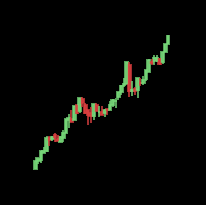

In [54]:
plt.style.use('dark_background')

my_dpi = 288
dimension = 192

fig = plt.figure(figsize=(dimension / my_dpi, dimension / my_dpi), dpi=my_dpi)
ax1 = fig.add_subplot(1, 1, 1)
candlestick2_ohlc(ax1, df['Open'], df['High'], df['Low'], df['Close'], width=1,
                  colorup='#77d879', colordown='#db3f3f')
ax1.grid(False)
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax1.axis('off')

fig.canvas.draw()
#plt.savefig('./btc_30min_png/{}.png'.format(0))

In [95]:
df_day = pd.read_csv('raw_btc_label.csv')

In [102]:
df_day.rename(columns={'Unnamed: 6':'Label'},inplace=True)

In [104]:
for i in range(len(df_day['Change'])) :
    if (df_day['Change'][i] < 0.01) & (df_day['Change'][i] > -0.01) :
        df_day['Label'][i] = 1
    elif df_day['Change'][i] < -0.01 :
        df_day['Label'][i] = 0
    else :
        df_day['Label'][i] = 2

/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_2341/3805720707.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['Label'][i] = 1
/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_2341/3805720707.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['Label'][i] = 2
/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_2341/3805720707.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_day['Labe

In [105]:
df_day

Date     Price      Open      High       Low  Change  Label
0     2017.9.26   4320000   4319000   4420000   4306000   0.000    1.0
1     2017.9.27   4654000   4320000   4680000   4313000   0.077    2.0
2     2017.9.28   4592000   4654000   4791000   4518000  -0.013    0.0
3     2017.9.29   4658000   4592000   4710000   4478000   0.014    2.0
4     2017.9.30   4891000   4658000   4898000   4654000   0.050    2.0
...         ...       ...       ...       ...       ...     ...    ...
1672  2022.4.25  50633000  49617000  50897000  48560000   0.020    2.0
1673  2022.4.26  48710000  50623000  51147000  48202000  -0.038    0.0
1674  2022.4.27  49918000  48720000  50067000  48570000   0.025    2.0
1675  2022.4.28  50549000  49915000  51169000  49667000   0.013    2.0
1676  2022.4.29  49715000  50543000  50712000  49400000  -0.017    0.0

[1677 rows x 7 columns]

In [106]:
df_day.to_csv('btc_label.csv')

In [2]:
import glob
import pandas as pd

def make_img(file_list) :
    count = 0
    for file in file_list :

        df = pd.read_csv(file, names=['DateTime', 'Open', 'High', 'Low', 'Close', 'Volume'])
        df.index = pd.DatetimeIndex(df['DateTime'])
        df = df.drop(['DateTime'], axis = 1)
        df = df.sort_values('DateTime', ascending=True)

        plt.style.use('dark_background')

        my_dpi = 288
        dimension = 192

        fig = plt.figure(figsize=(dimension / my_dpi, dimension / my_dpi), dpi=my_dpi)
        ax1 = fig.add_subplot(1, 1, 1)
        candlestick2_ohlc(ax1, df['Open'], df['High'], df['Low'], df['Close'], width=1,
                          colorup='#77d879', colordown='#db3f3f')
        ax1.grid(False)
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.xaxis.set_visible(False)
        ax1.yaxis.set_visible(False)
        ax1.axis('off')

        #fig.canvas.draw()
        plt.savefig('./btc_30min_jpg/{}.jpg'.format(count))
        print('{}th csv done'.format(count))
        count += 1


In [5]:
raw_file_list = sorted(glob.glob('/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/*.csv'))

In [6]:
import natsort

file_list = natsort.natsorted(raw_file_list)
file_list

['/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_0.csv',
 '/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_1.csv',
 '/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_2.csv',
 '/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_3.csv',
 '/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_4.csv',
 '/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_5.csv',
 '/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_6.csv',
 '/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_7.csv',
 '/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_8.csv',
 '/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_9.csv',
 '/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_10.csv',
 '/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_11.csv',
 '/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_12.csv',
 '/Users/anjaeu/Code/Visual_Code/심층학습 프로젝트/btc_30min/btc_5min_13.csv',
 '/Users/anjaeu/

0th csv done
1th csv done
2th csv done
3th csv done
4th csv done
5th csv done
6th csv done
7th csv done
8th csv done
9th csv done
10th csv done
11th csv done
12th csv done
13th csv done
14th csv done
15th csv done
16th csv done
17th csv done
18th csv done
19th csv done
20th csv done
21th csv done
22th csv done
23th csv done


/var/folders/7n/qbcvswc55hzd4lnphhs0grb40000gn/T/ipykernel_1785/3482099840.py:18: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=(dimension / my_dpi, dimension / my_dpi), dpi=my_dpi)


24th csv done
25th csv done
26th csv done
27th csv done
28th csv done
29th csv done
30th csv done
31th csv done
32th csv done
33th csv done
34th csv done
35th csv done
36th csv done
37th csv done
38th csv done
39th csv done
40th csv done
41th csv done
42th csv done
43th csv done
44th csv done
45th csv done
46th csv done
47th csv done
48th csv done
49th csv done
50th csv done
51th csv done
52th csv done
53th csv done
54th csv done
55th csv done
56th csv done
57th csv done
58th csv done
59th csv done
60th csv done
61th csv done
62th csv done
63th csv done
64th csv done
65th csv done
66th csv done
67th csv done
68th csv done
69th csv done
70th csv done
71th csv done
72th csv done
73th csv done
74th csv done
75th csv done
76th csv done
77th csv done
78th csv done
79th csv done
80th csv done
81th csv done
82th csv done
83th csv done
84th csv done
85th csv done
86th csv done
87th csv done
88th csv done
89th csv done
90th csv done
91th csv done
92th csv done
93th csv done
94th csv done
95th c

578th csv done
579th csv done
580th csv done
581th csv done
582th csv done
583th csv done
584th csv done
585th csv done
586th csv done
587th csv done
588th csv done
589th csv done
590th csv done
591th csv done
592th csv done
593th csv done
594th csv done
595th csv done
596th csv done
597th csv done
598th csv done
599th csv done
600th csv done
601th csv done
602th csv done
603th csv done
604th csv done
605th csv done
606th csv done
607th csv done
608th csv done
609th csv done
610th csv done
611th csv done
612th csv done
613th csv done
614th csv done
615th csv done
616th csv done
617th csv done
618th csv done
619th csv done
620th csv done
621th csv done
622th csv done
623th csv done
624th csv done
625th csv done
626th csv done
627th csv done
628th csv done
629th csv done
630th csv done
631th csv done
632th csv done
633th csv done
634th csv done
635th csv done
636th csv done
637th csv done
638th csv done
639th csv done
640th csv done
641th csv done
642th csv done
643th csv done
644th csv 

1119th csv done
1120th csv done
1121th csv done
1122th csv done
1123th csv done
1124th csv done
1125th csv done
1126th csv done
1127th csv done
1128th csv done
1129th csv done
1130th csv done
1131th csv done
1132th csv done
1133th csv done
1134th csv done
1135th csv done
1136th csv done
1137th csv done
1138th csv done
1139th csv done
1140th csv done
1141th csv done
1142th csv done
1143th csv done
1144th csv done
1145th csv done
1146th csv done
1147th csv done
1148th csv done
1149th csv done
1150th csv done
1151th csv done
1152th csv done
1153th csv done
1154th csv done
1155th csv done
1156th csv done
1157th csv done
1158th csv done
1159th csv done
1160th csv done
1161th csv done
1162th csv done
1163th csv done
1164th csv done
1165th csv done
1166th csv done
1167th csv done
1168th csv done
1169th csv done
1170th csv done
1171th csv done
1172th csv done
1173th csv done
1174th csv done
1175th csv done
1176th csv done
1177th csv done
1178th csv done
1179th csv done
1180th csv done
1181th c

1632th csv done
1633th csv done
1634th csv done
1635th csv done
1636th csv done
1637th csv done
1638th csv done
1639th csv done
1640th csv done
1641th csv done
1642th csv done
1643th csv done
1644th csv done
1645th csv done
1646th csv done
1647th csv done
1648th csv done
1649th csv done
1650th csv done
1651th csv done
1652th csv done
1653th csv done
1654th csv done
1655th csv done
1656th csv done
1657th csv done
1658th csv done
1659th csv done
1660th csv done
1661th csv done
1662th csv done
1663th csv done
1664th csv done
1665th csv done
1666th csv done
1667th csv done
1668th csv done
1669th csv done
1670th csv done
1671th csv done
1672th csv done
1673th csv done
1674th csv done
1675th csv done
1676th csv done


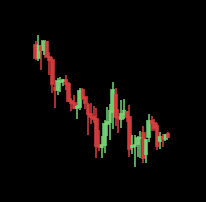

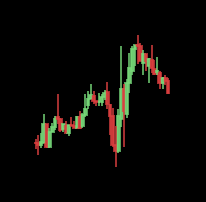

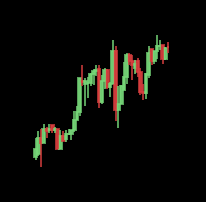

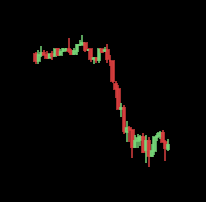

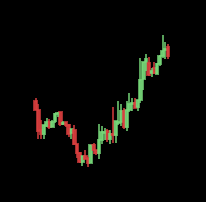

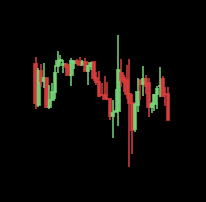

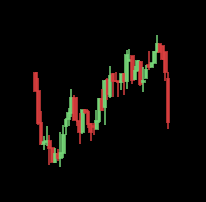

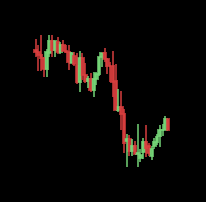

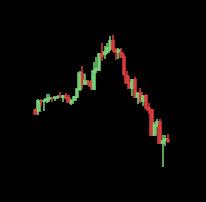

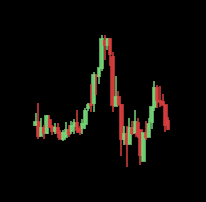

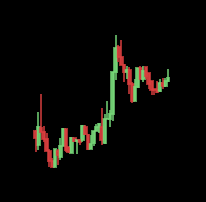

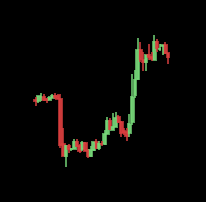

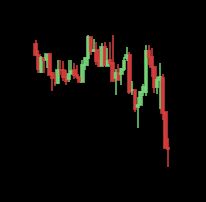

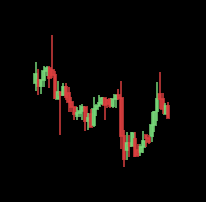

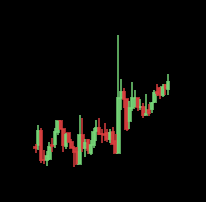

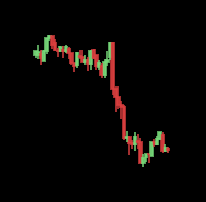

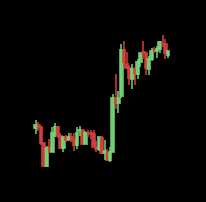

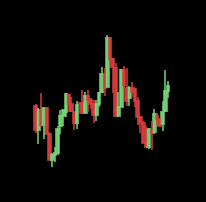

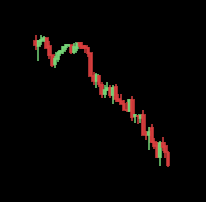

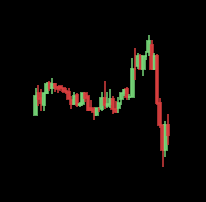

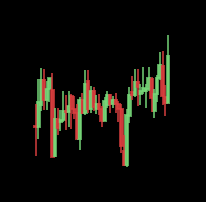

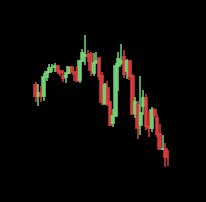

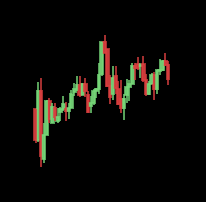

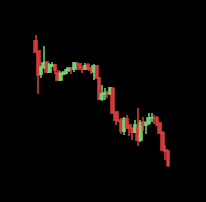

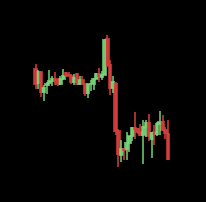

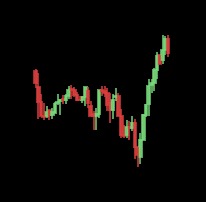

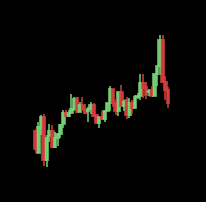

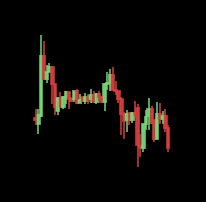

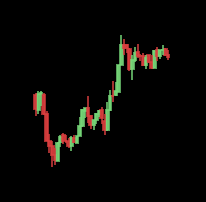

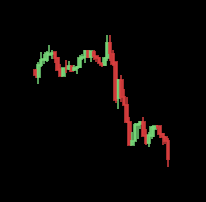

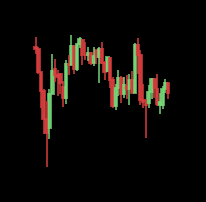

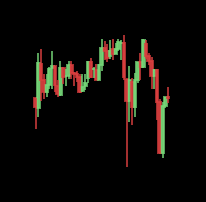

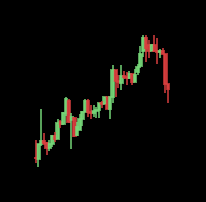

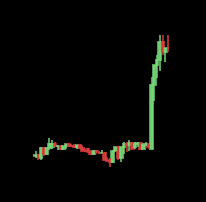

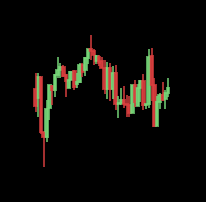

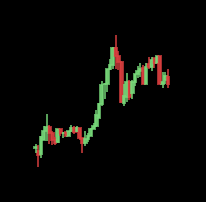

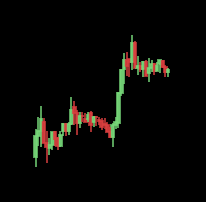

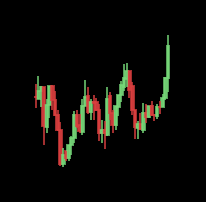

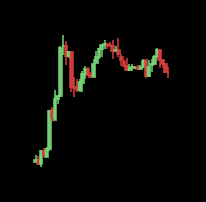

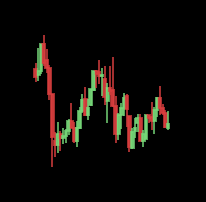

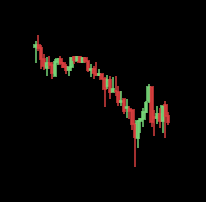

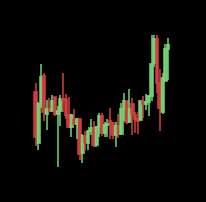

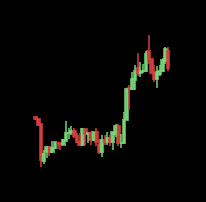

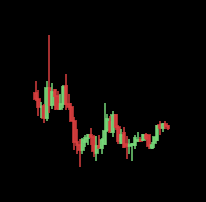

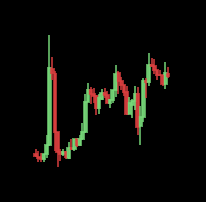

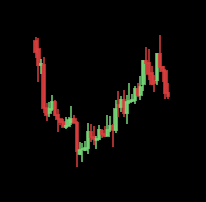

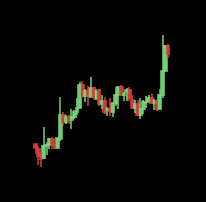

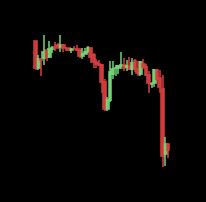

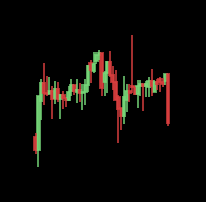

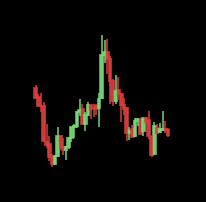

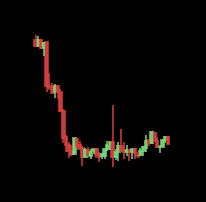

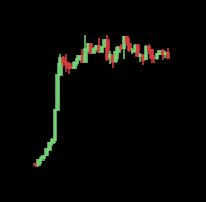

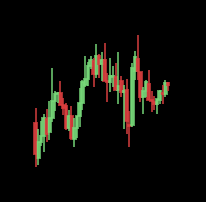

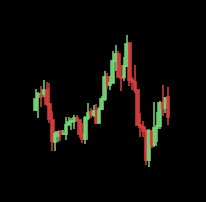

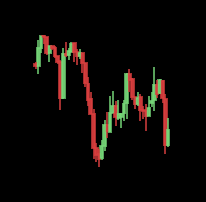

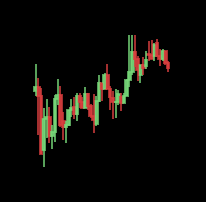

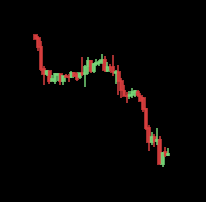

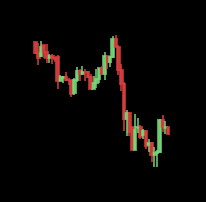

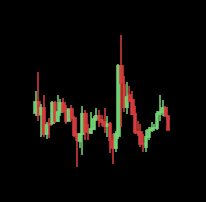

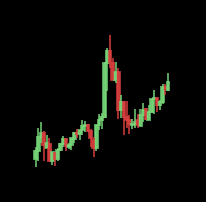

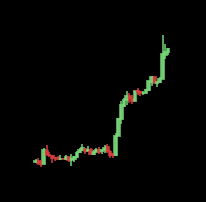

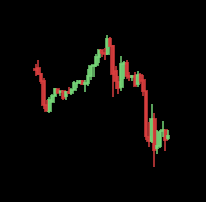

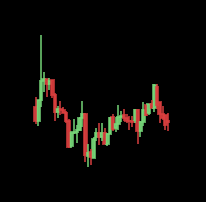

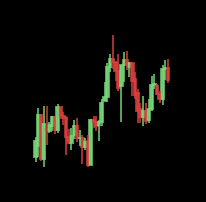

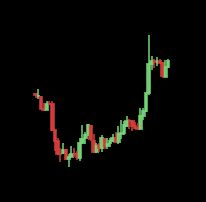

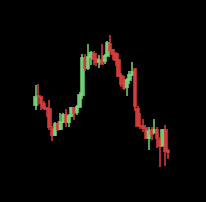

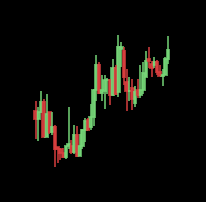

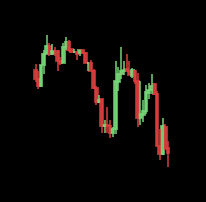

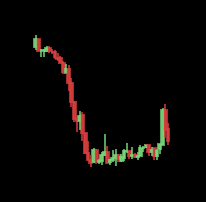

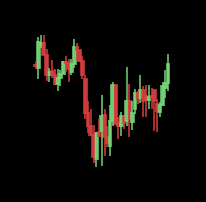

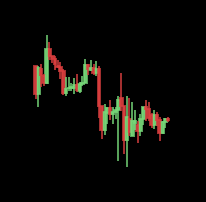

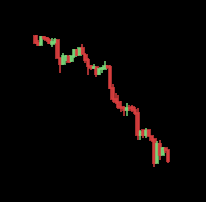

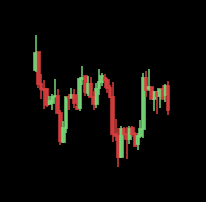

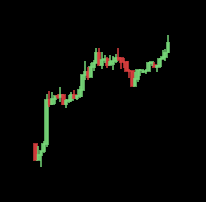

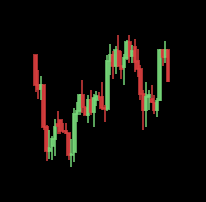

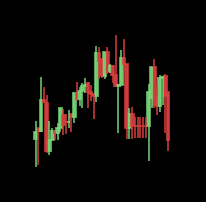

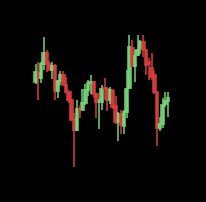

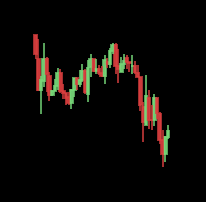

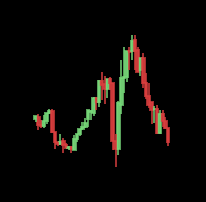

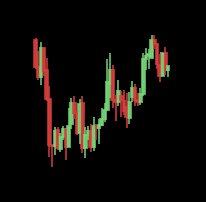

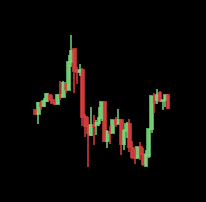

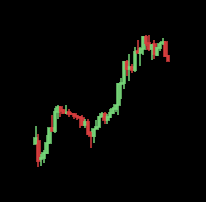

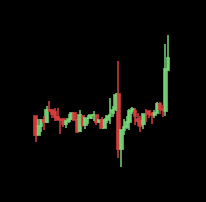

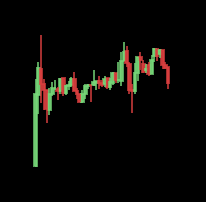

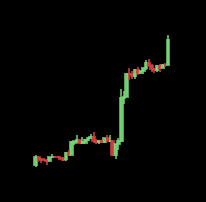

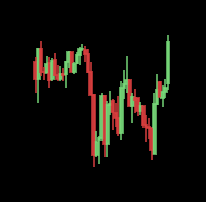

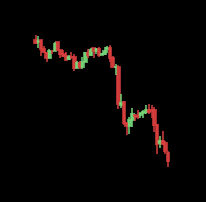

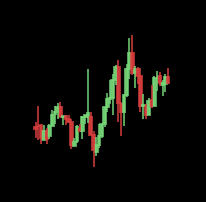

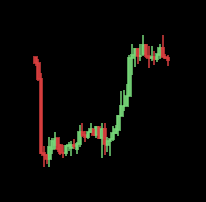

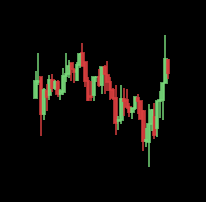

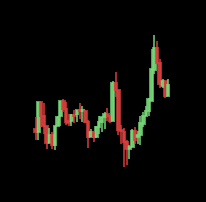

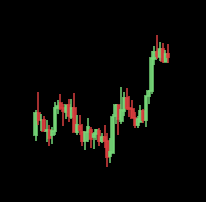

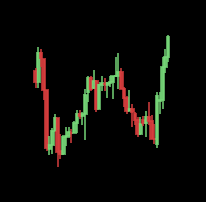

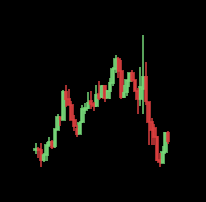

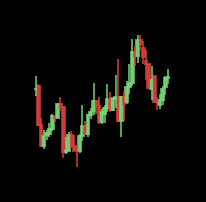

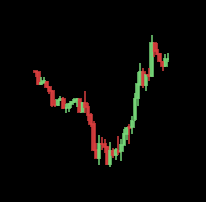

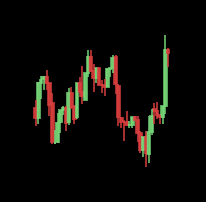

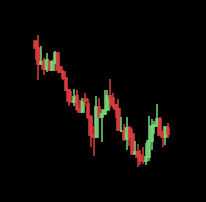

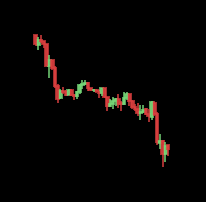

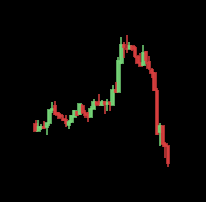

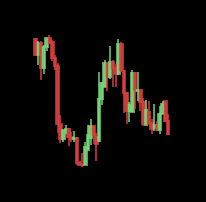

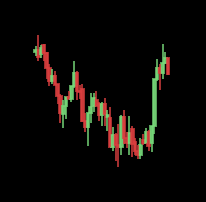

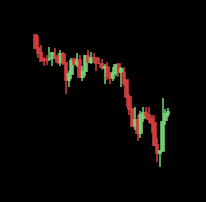

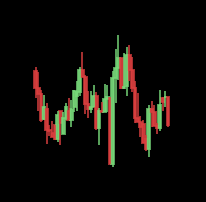

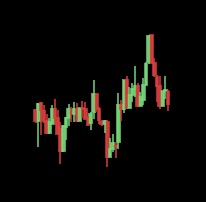

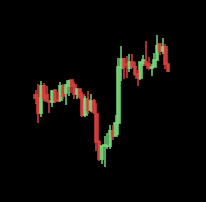

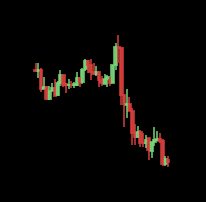

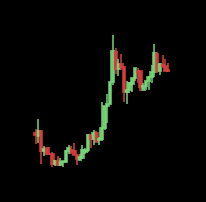

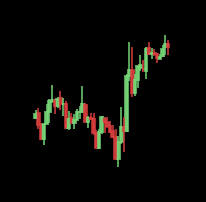

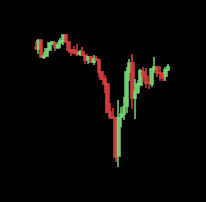

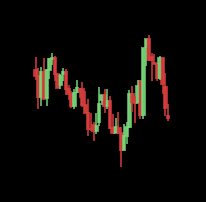

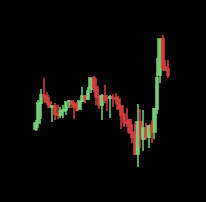

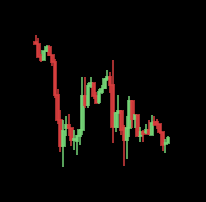

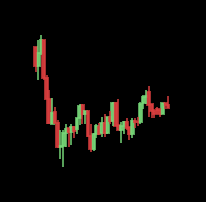

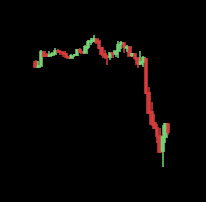

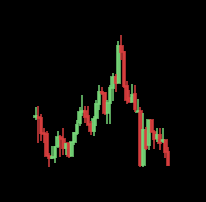

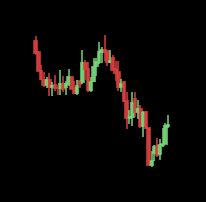

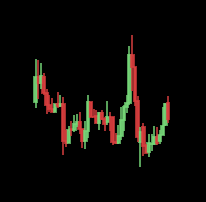

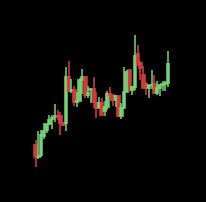

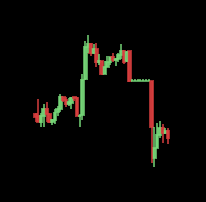

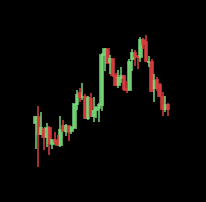

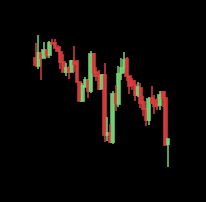

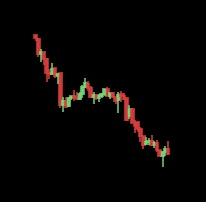

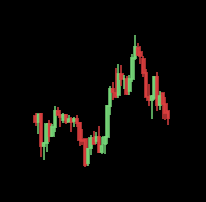

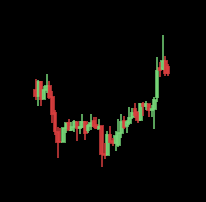

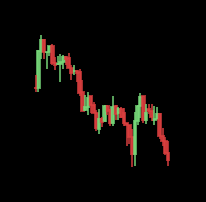

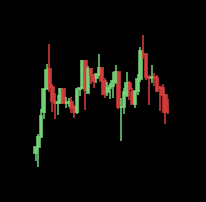

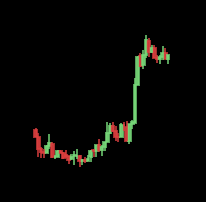

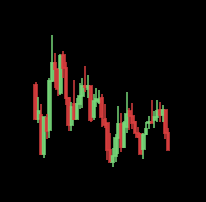

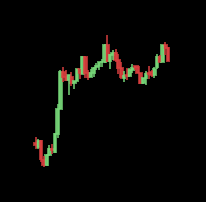

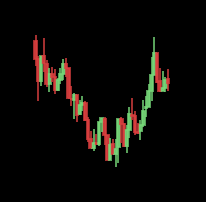

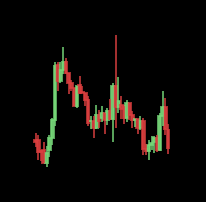

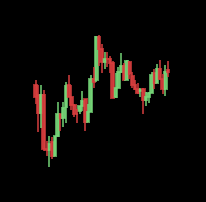

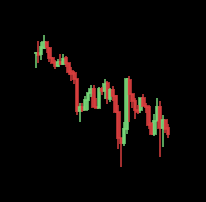

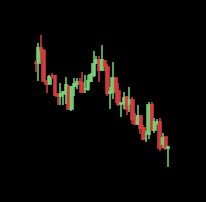

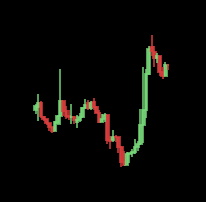

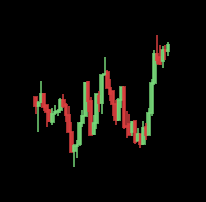

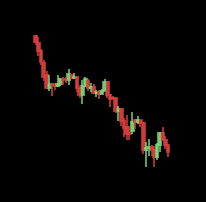

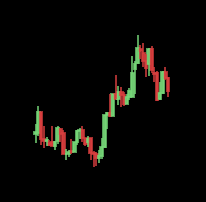

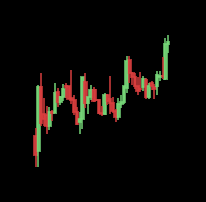

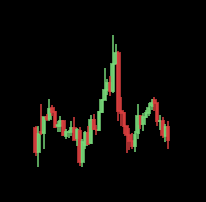

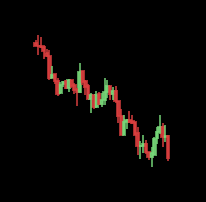

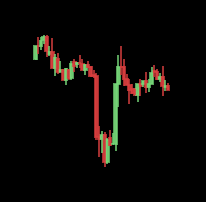

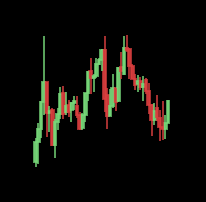

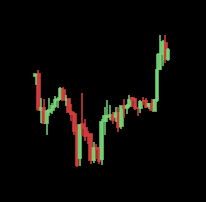

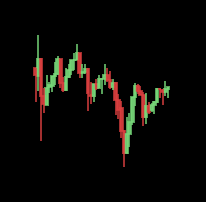

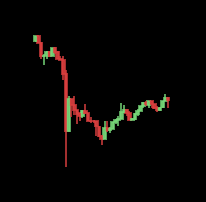

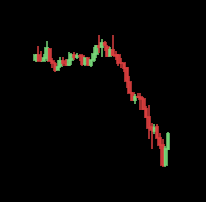

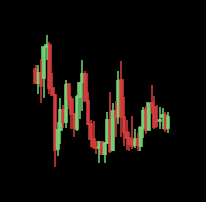

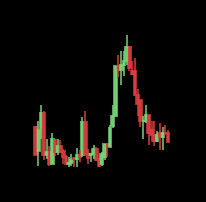

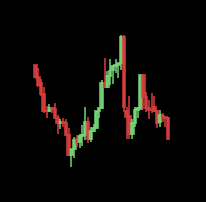

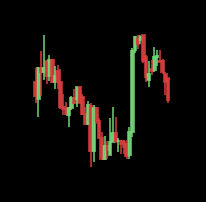

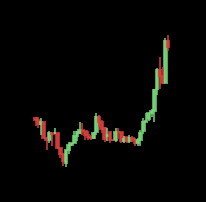

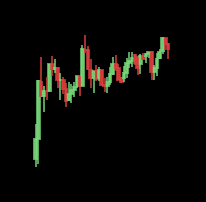

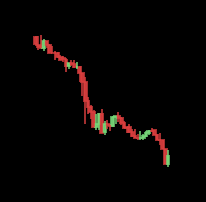

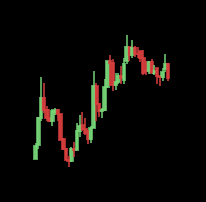

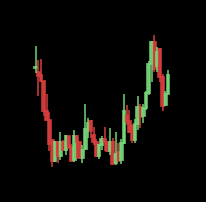

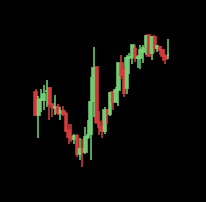

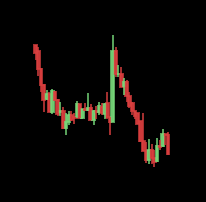

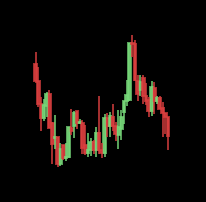

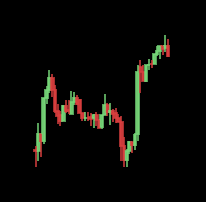

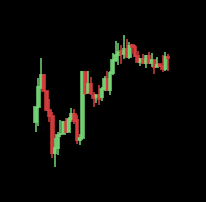

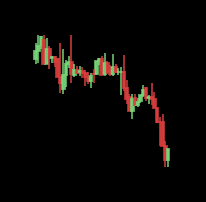

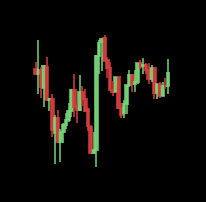

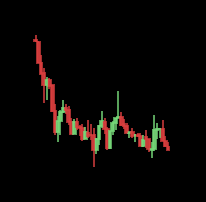

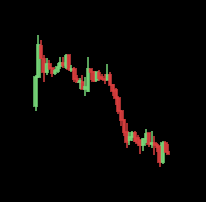

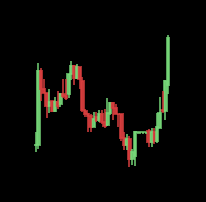

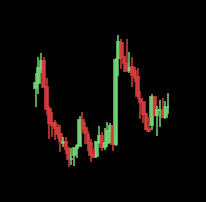

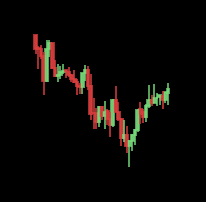

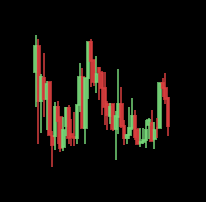

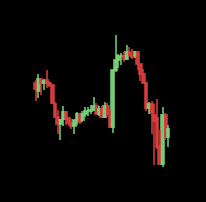

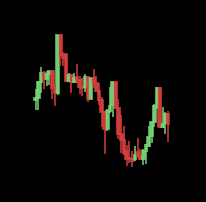

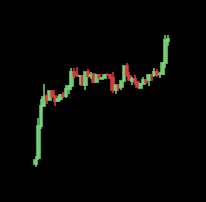

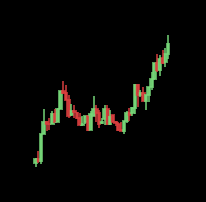

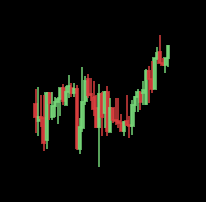

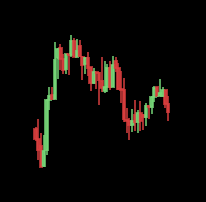

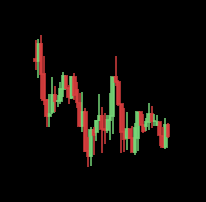

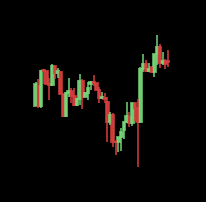

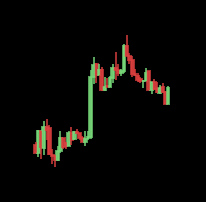

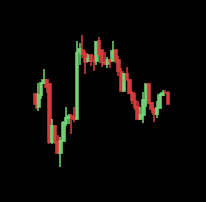

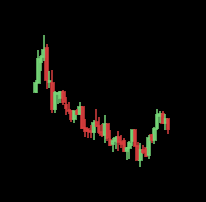

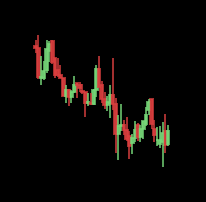

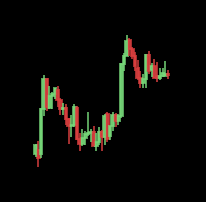

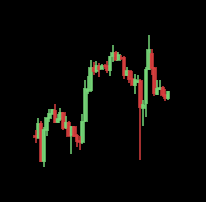

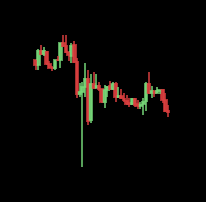

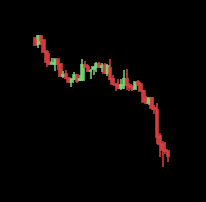

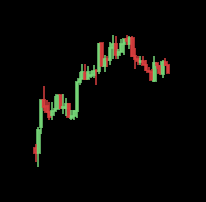

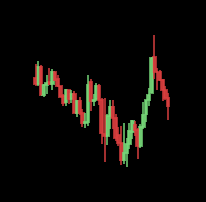

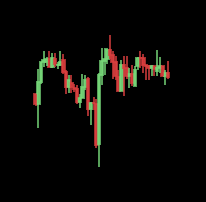

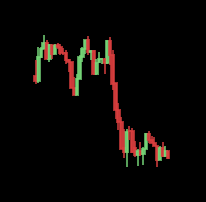

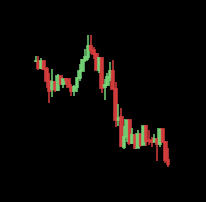

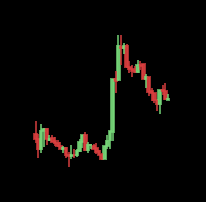

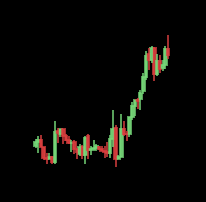

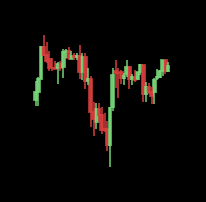

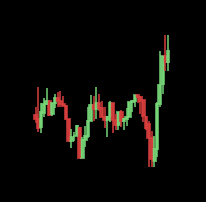

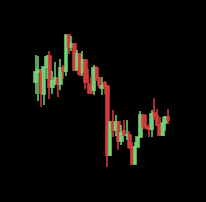

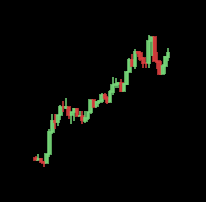

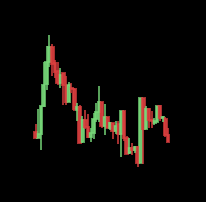

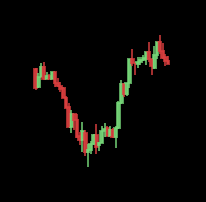

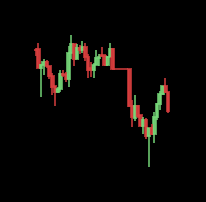

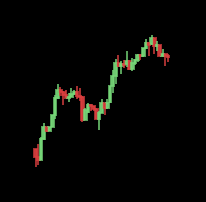

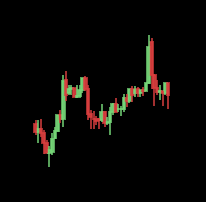

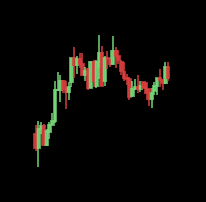

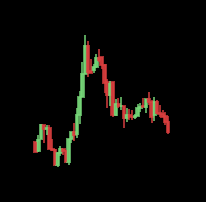

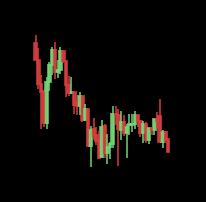

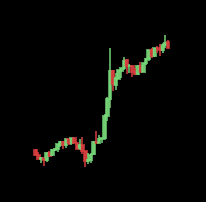

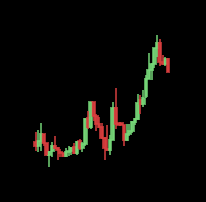

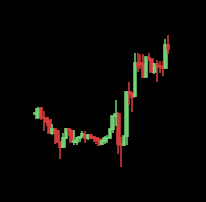

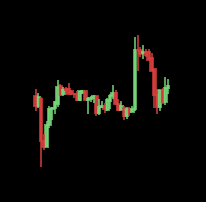

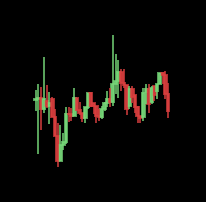

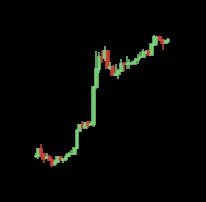

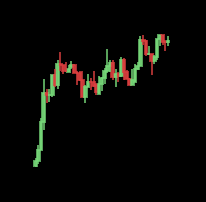

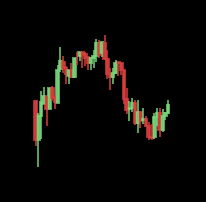

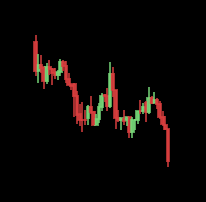

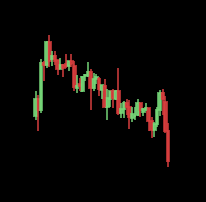

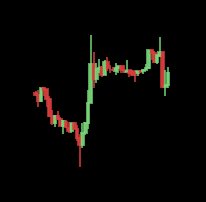

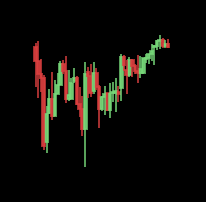

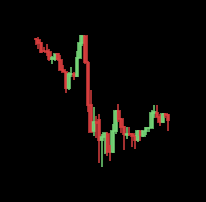

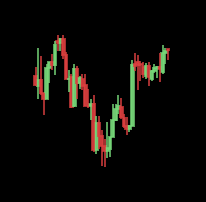

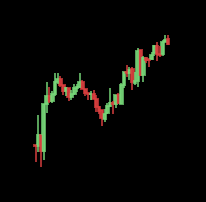

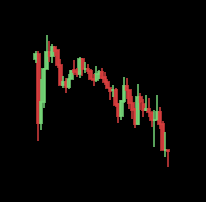

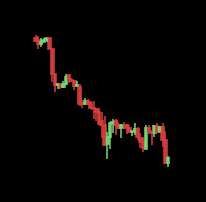

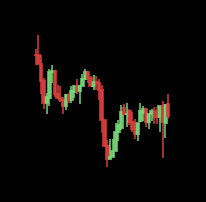

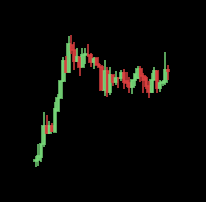

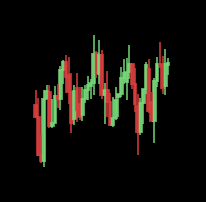

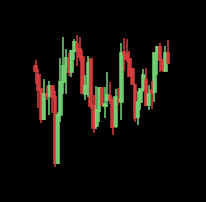

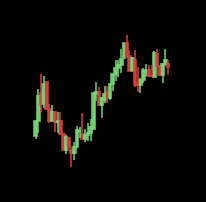

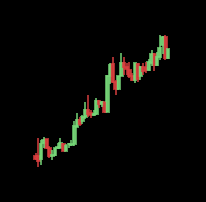

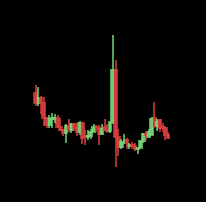

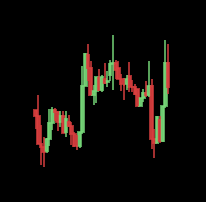

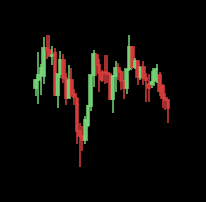

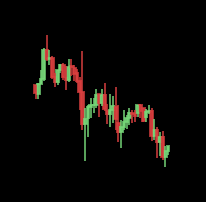

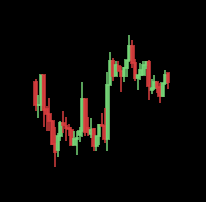

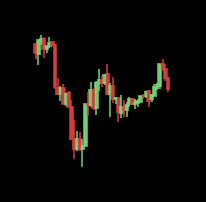

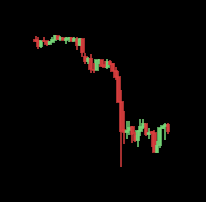

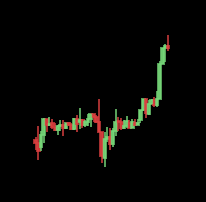

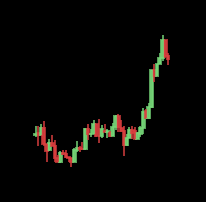

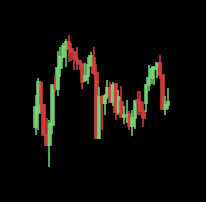

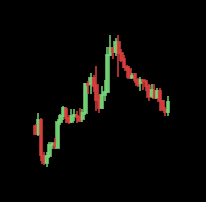

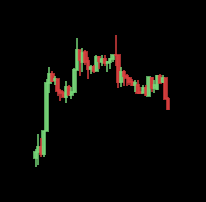

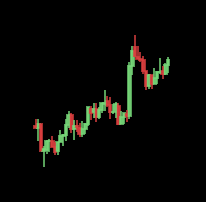

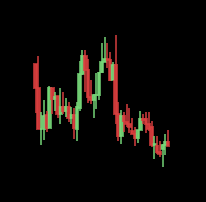

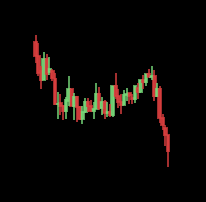

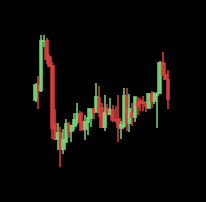

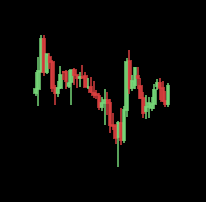

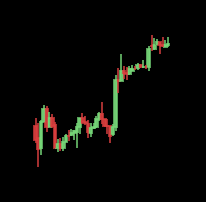

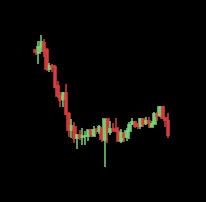

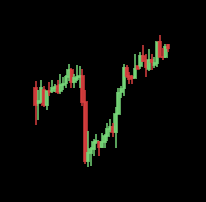

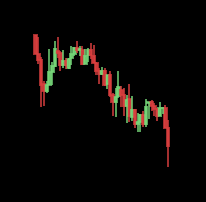

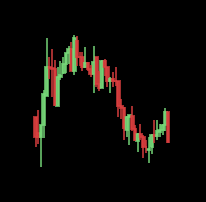

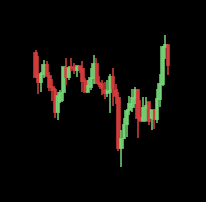

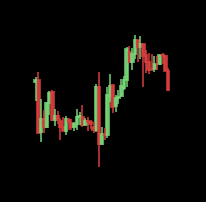

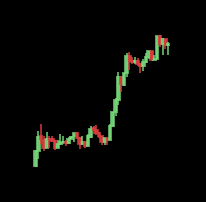

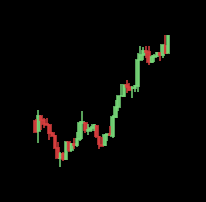

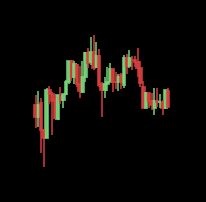

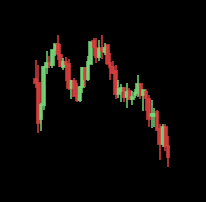

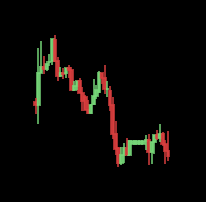

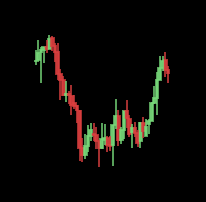

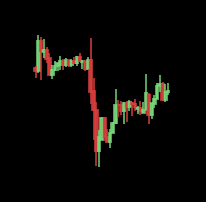

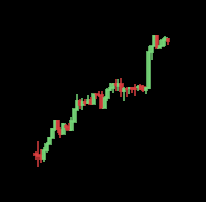

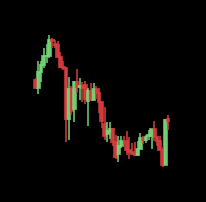

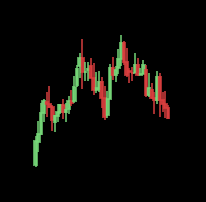

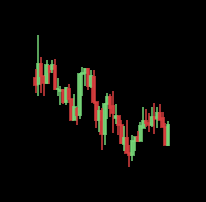

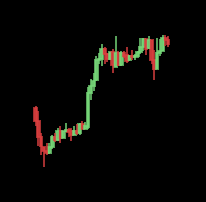

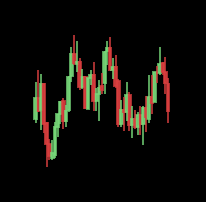

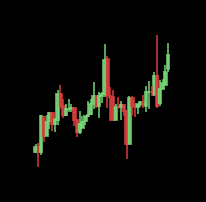

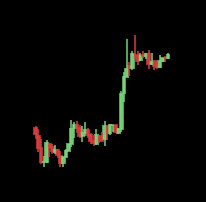

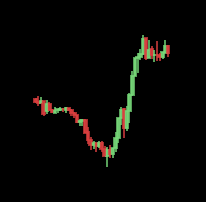

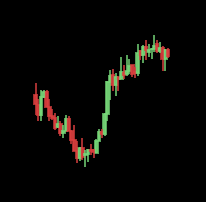

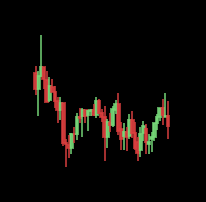

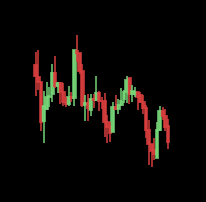

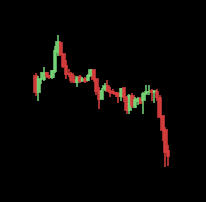

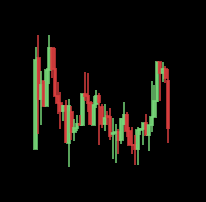

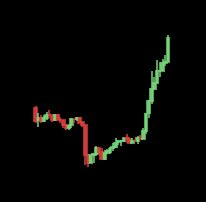

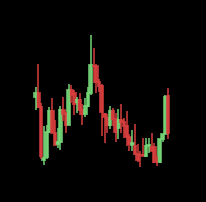

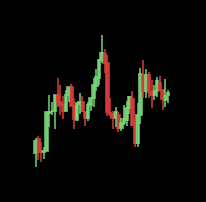

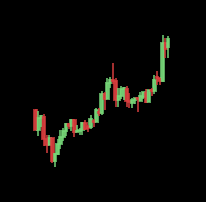

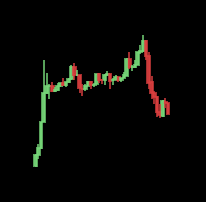

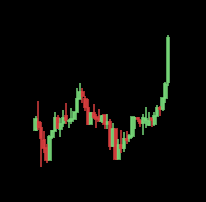

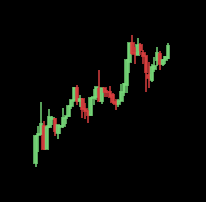

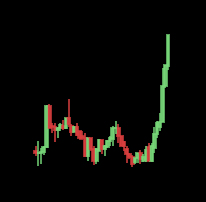

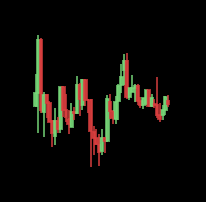

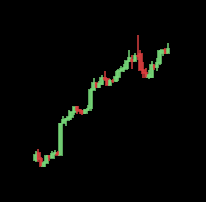

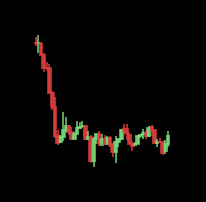

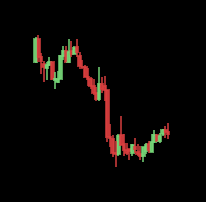

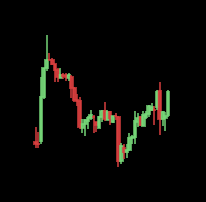

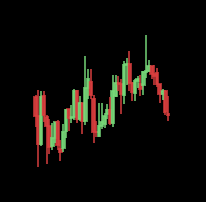

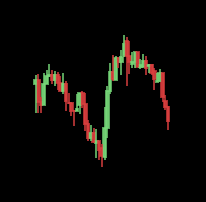

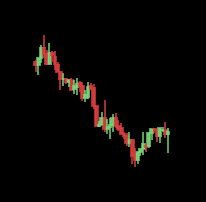

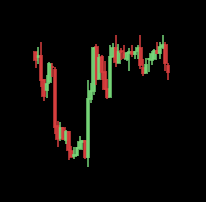

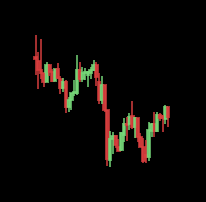

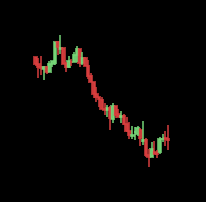

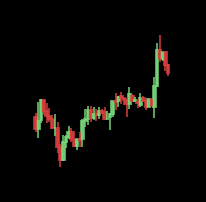

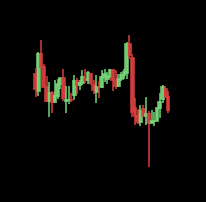

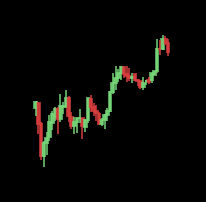

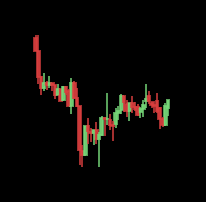

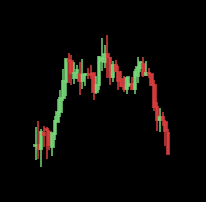

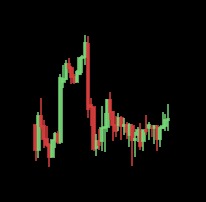

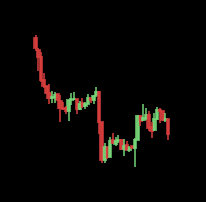

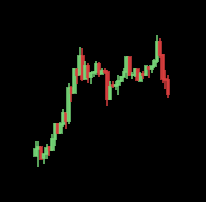

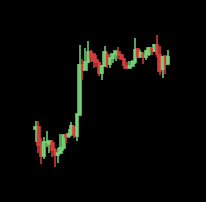

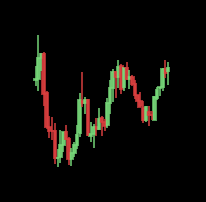

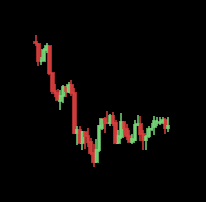

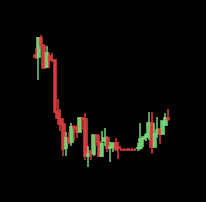

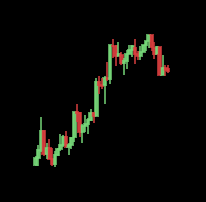

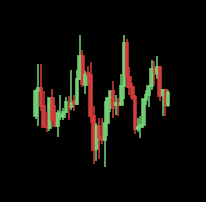

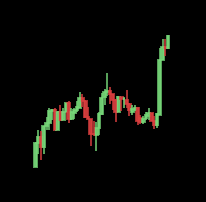

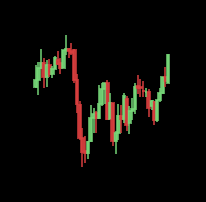

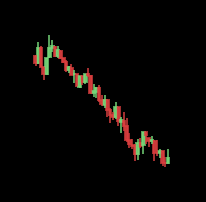

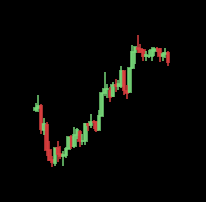

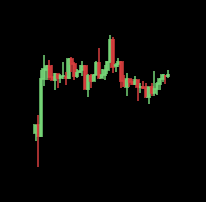

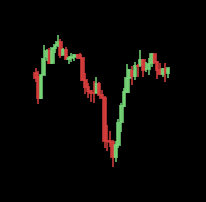

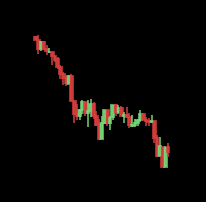

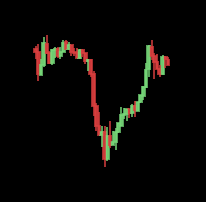

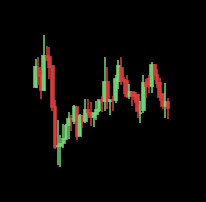

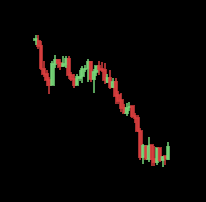

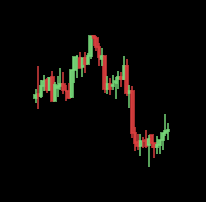

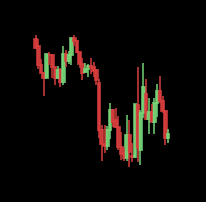

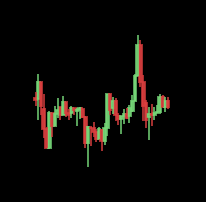

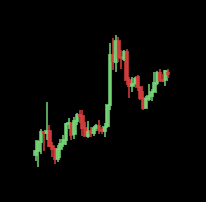

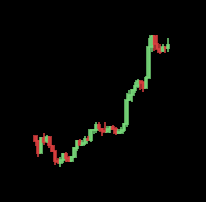

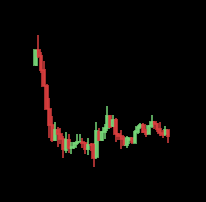

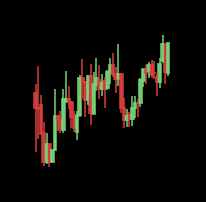

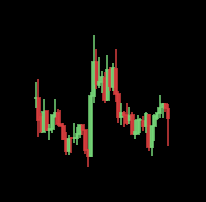

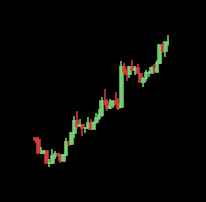

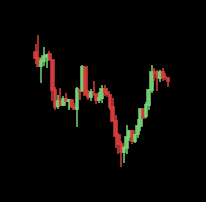

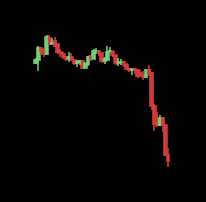

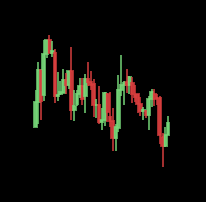

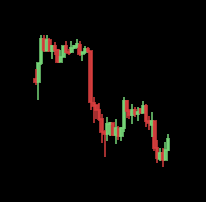

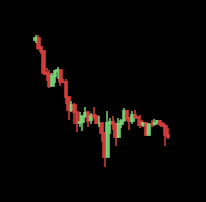

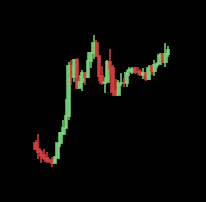

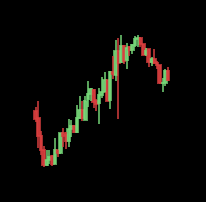

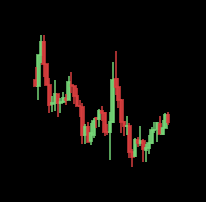

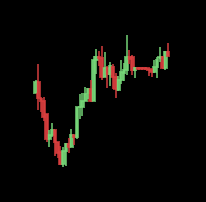

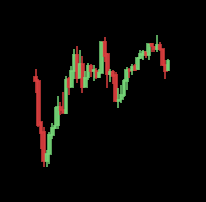

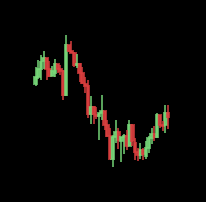

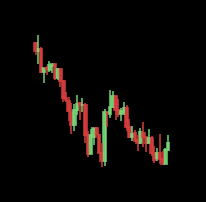

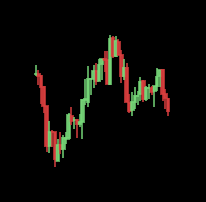

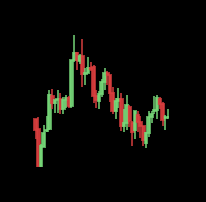

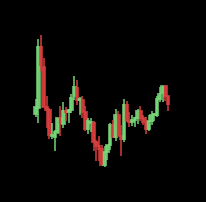

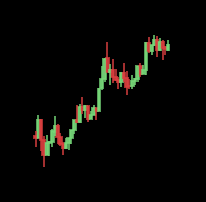

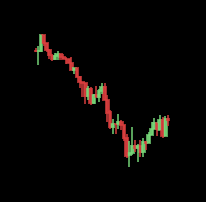

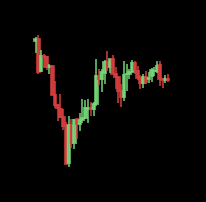

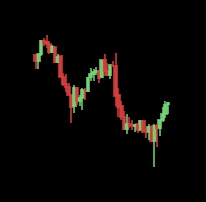

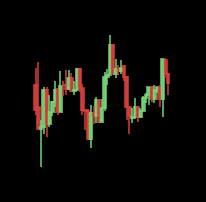

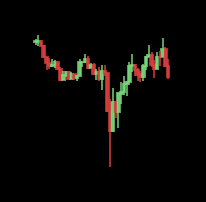

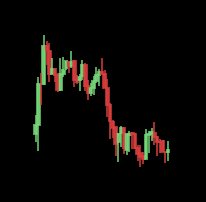

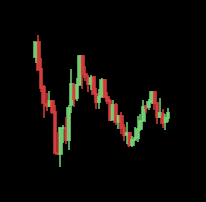

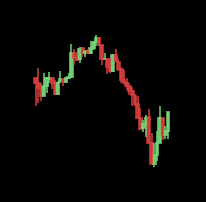

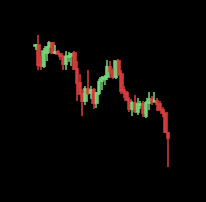

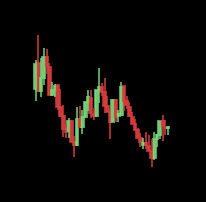

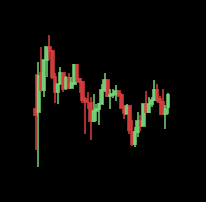

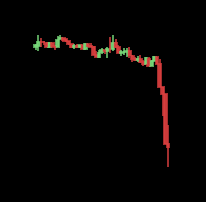

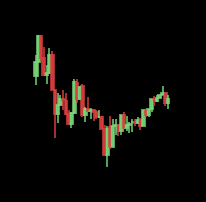

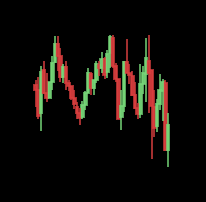

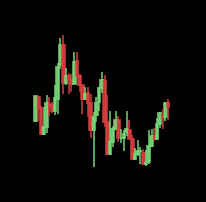

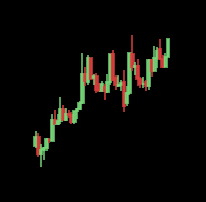

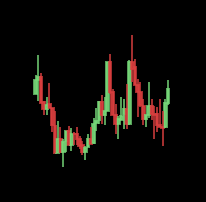

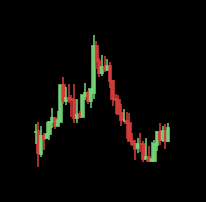

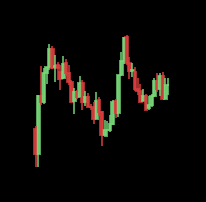

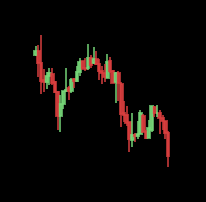

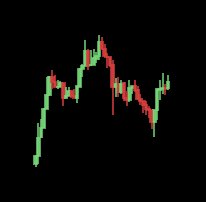

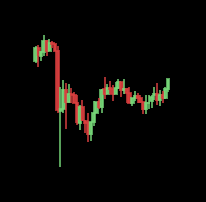

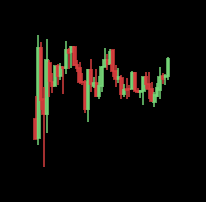

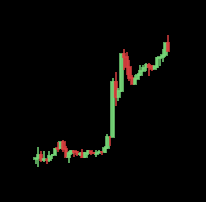

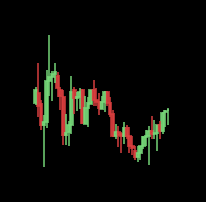

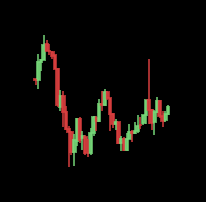

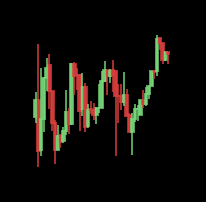

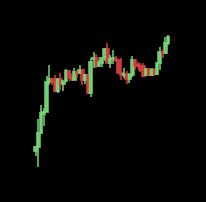

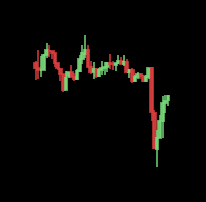

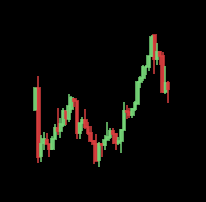

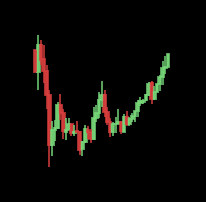

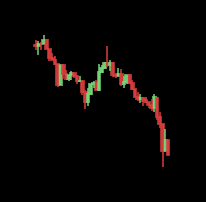

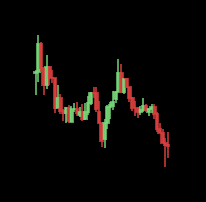

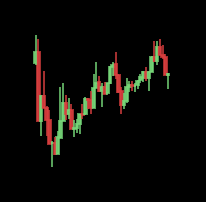

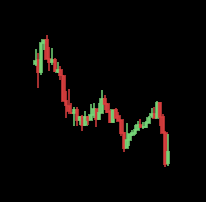

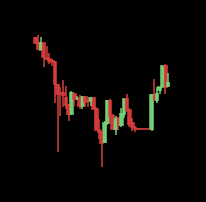

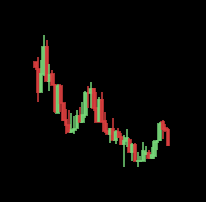

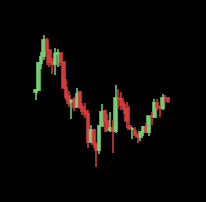

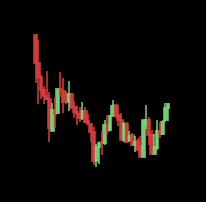

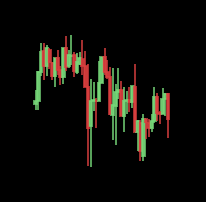

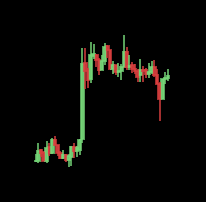

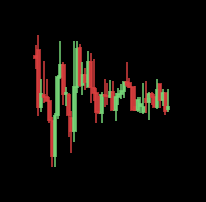

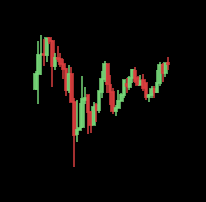

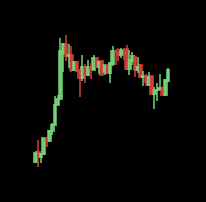

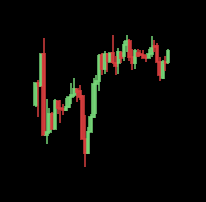

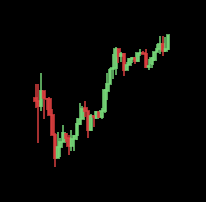

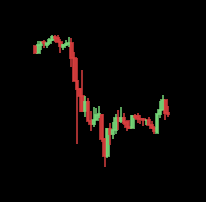

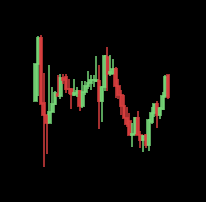

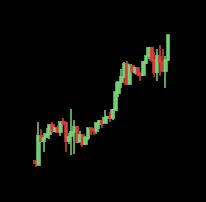

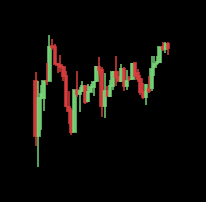

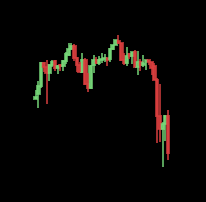

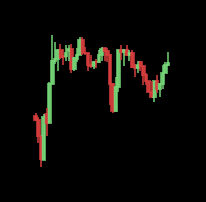

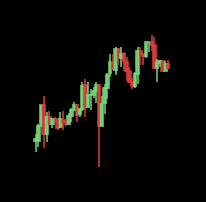

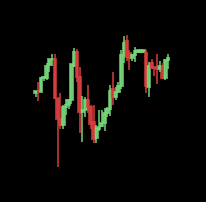

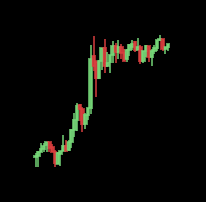

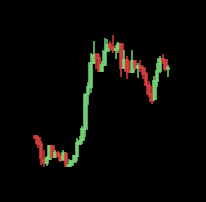

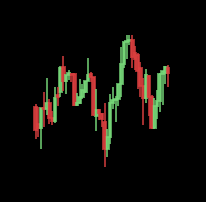

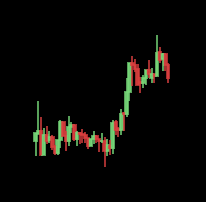

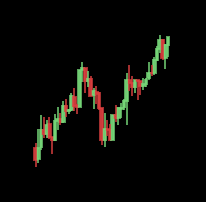

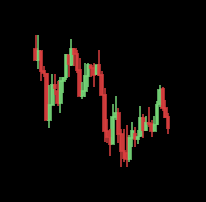

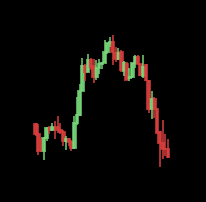

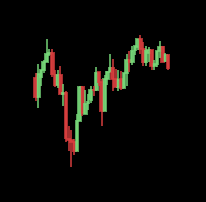

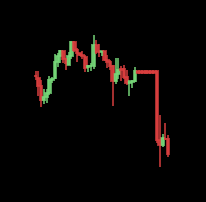

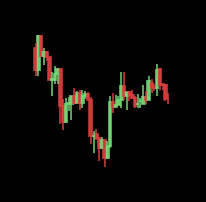

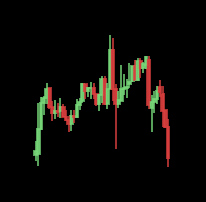

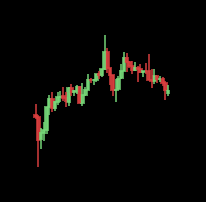

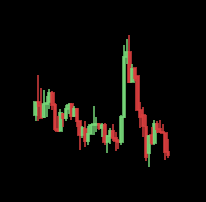

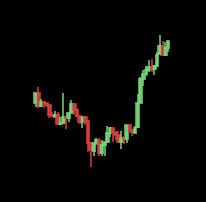

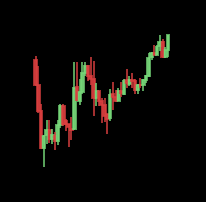

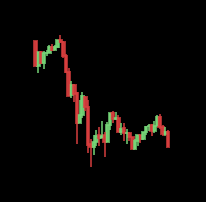

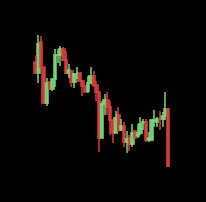

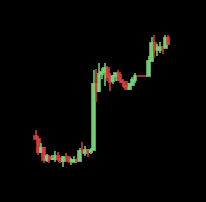

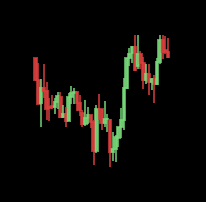

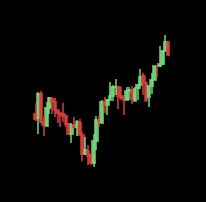

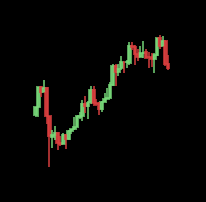

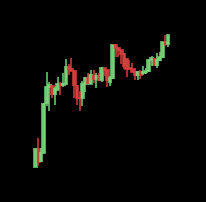

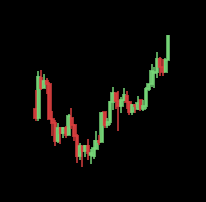

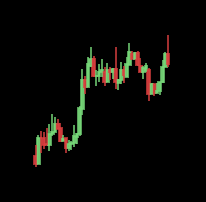

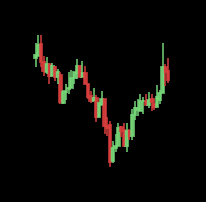

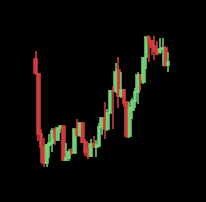

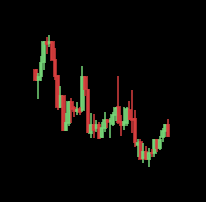

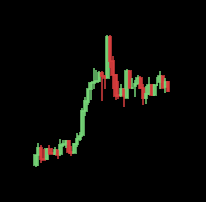

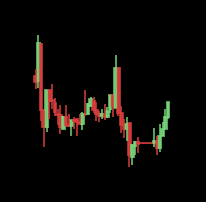

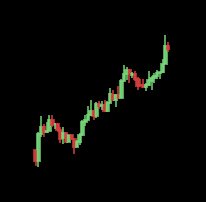

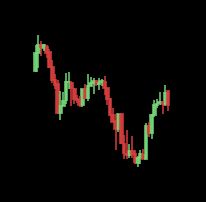

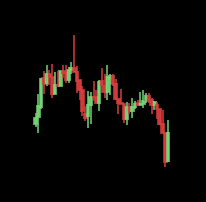

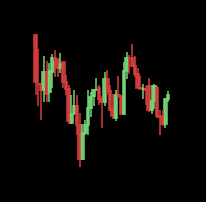

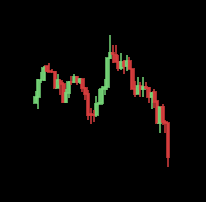

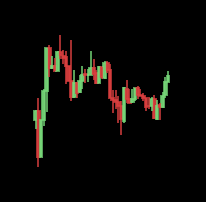

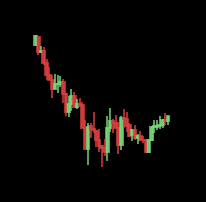

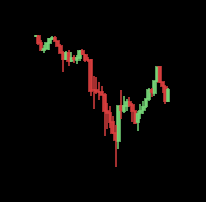

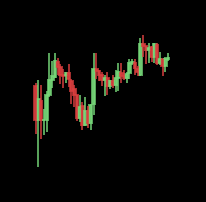

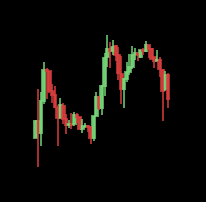

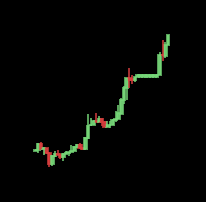

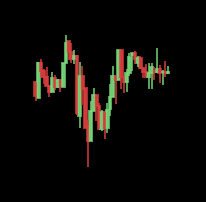

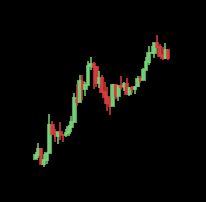

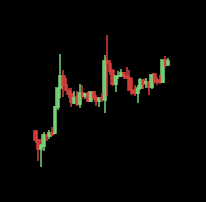

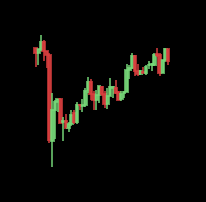

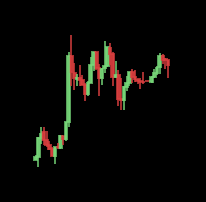

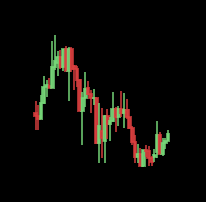

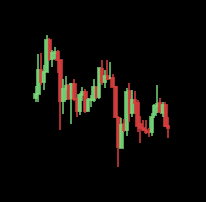

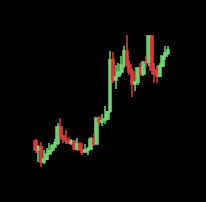

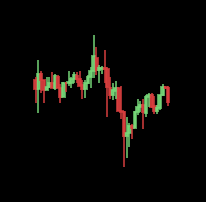

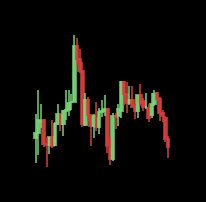

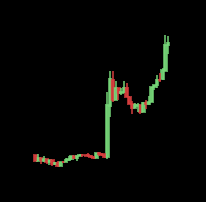

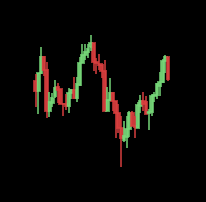

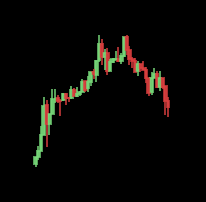

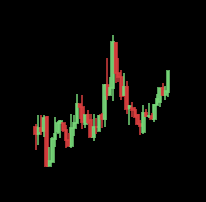

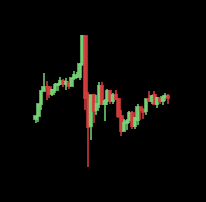

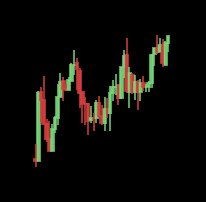

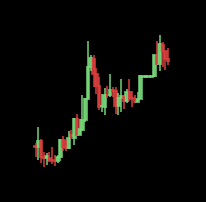

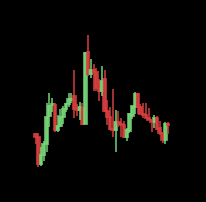

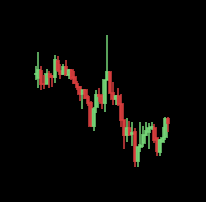

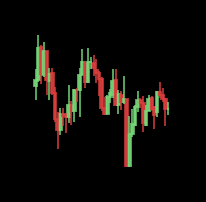

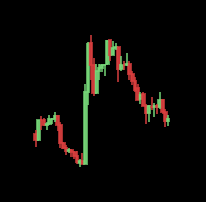

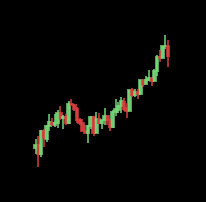

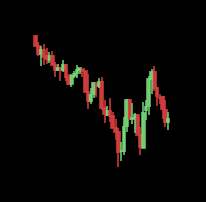

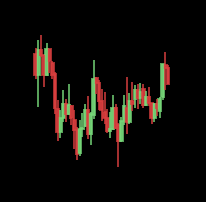

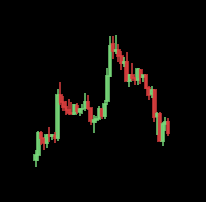

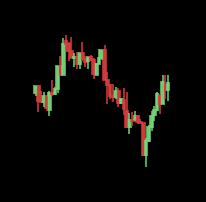

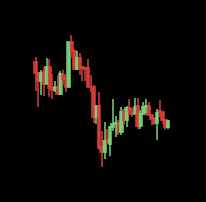

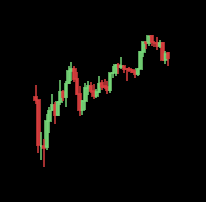

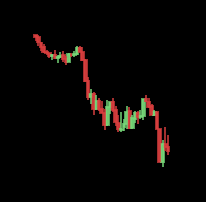

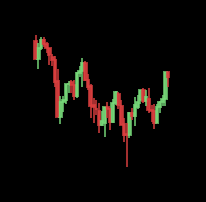

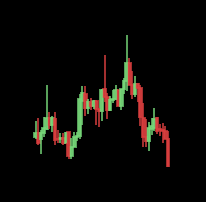

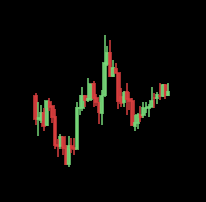

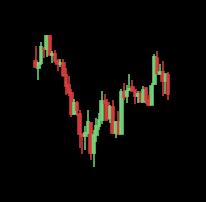

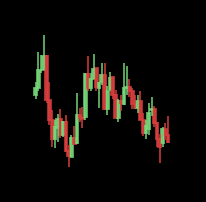

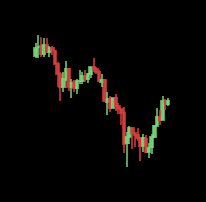

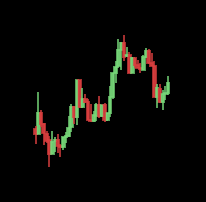

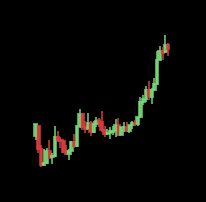

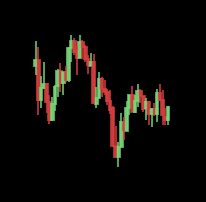

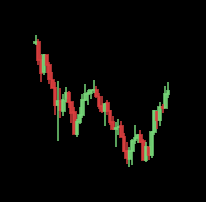

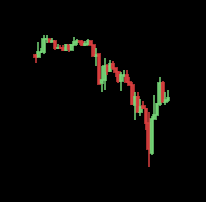

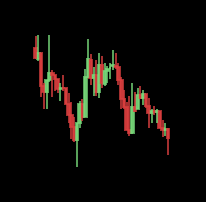

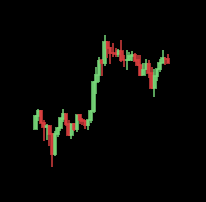

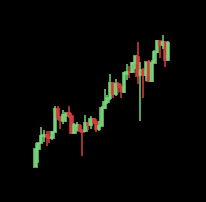

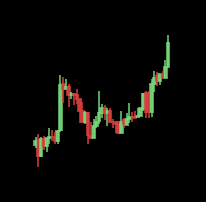

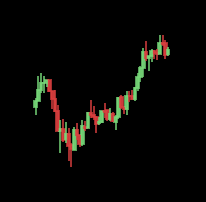

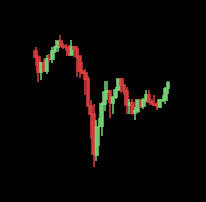

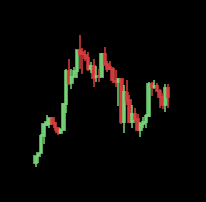

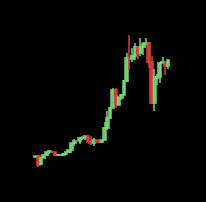

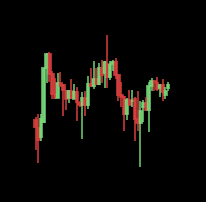

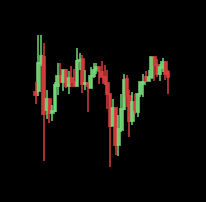

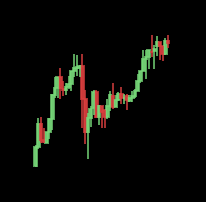

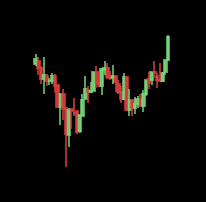

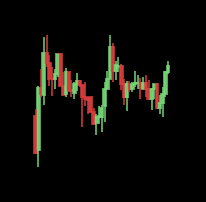

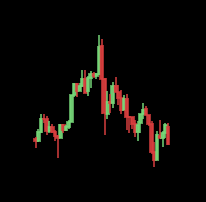

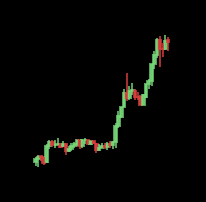

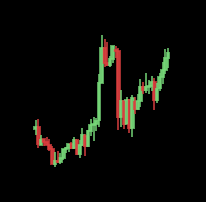

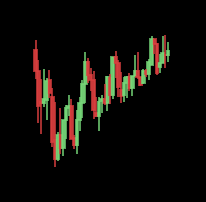

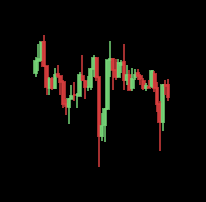

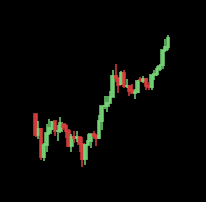

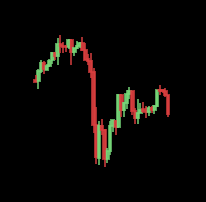

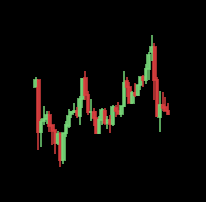

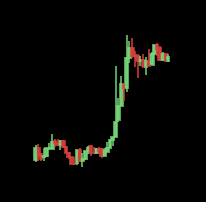

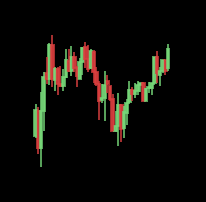

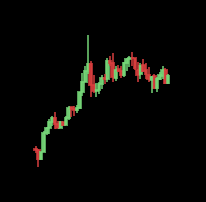

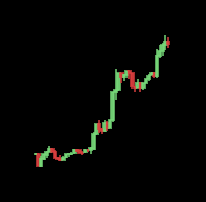

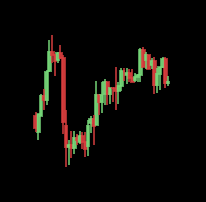

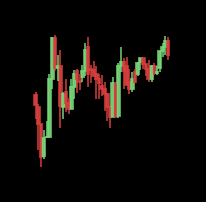

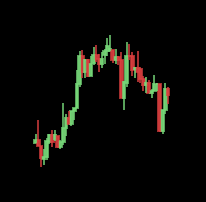

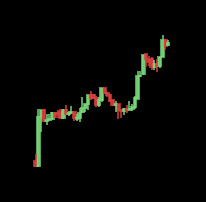

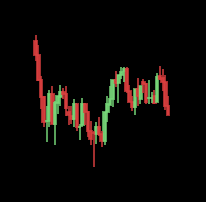

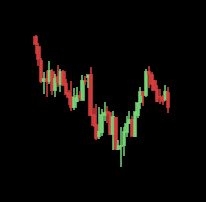

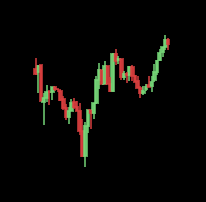

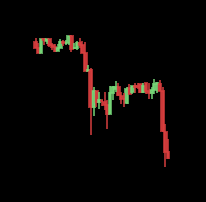

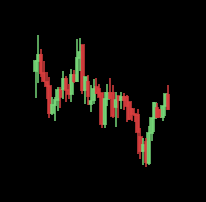

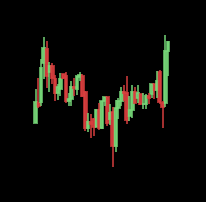

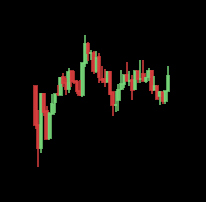

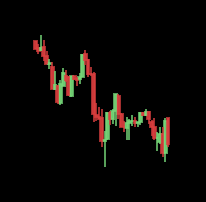

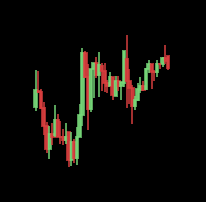

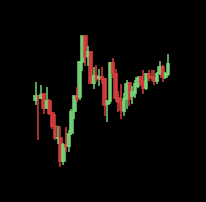

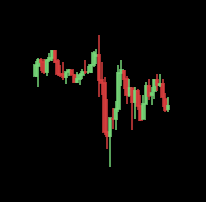

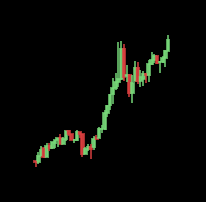

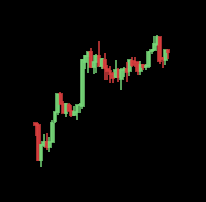

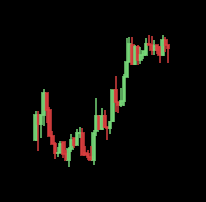

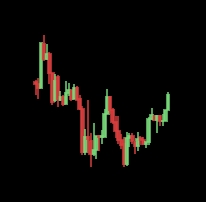

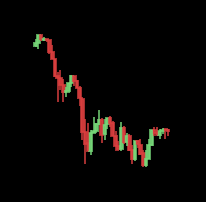

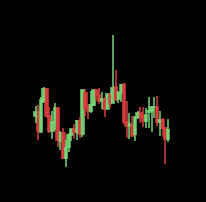

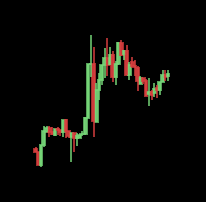

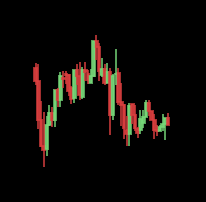

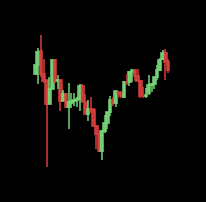

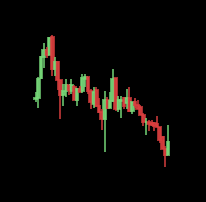

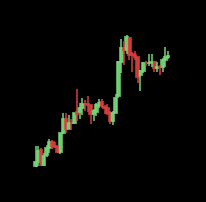

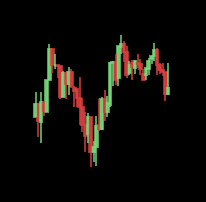

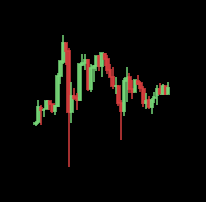

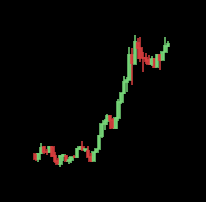

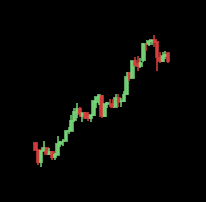

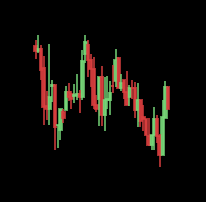

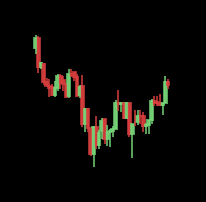

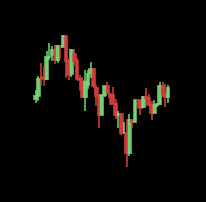

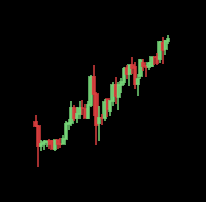

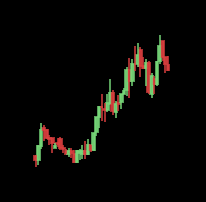

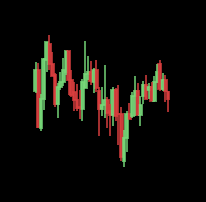

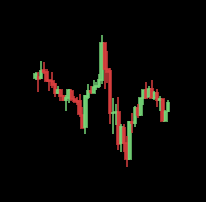

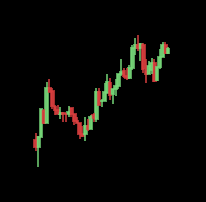

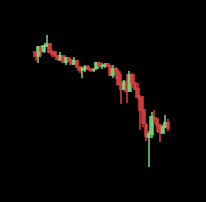

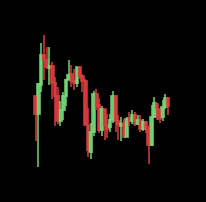

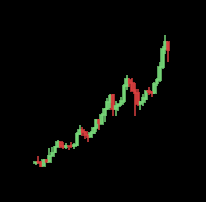

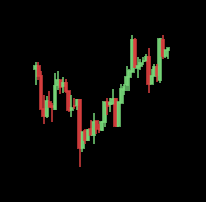

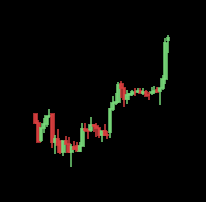

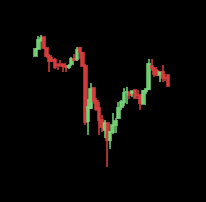

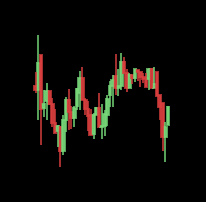

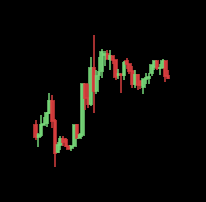

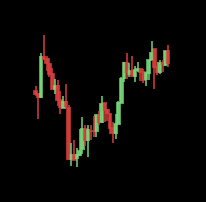

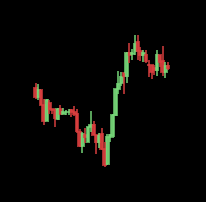

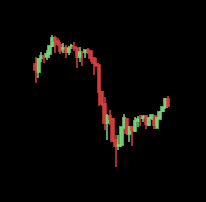

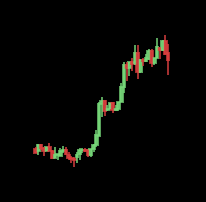

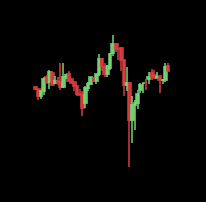

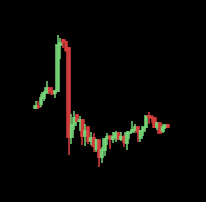

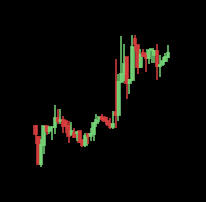

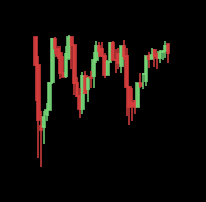

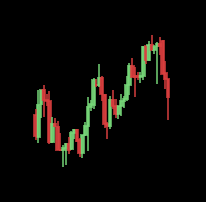

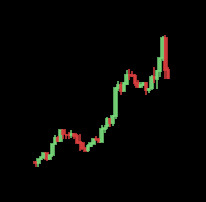

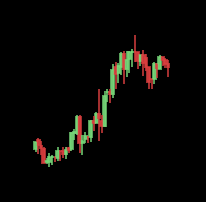

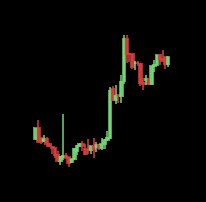

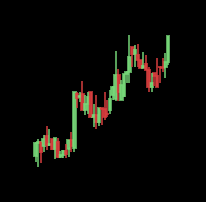

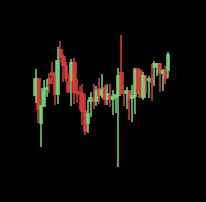

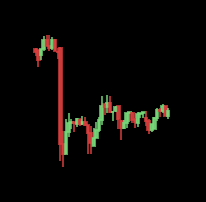

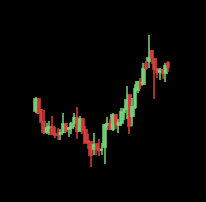

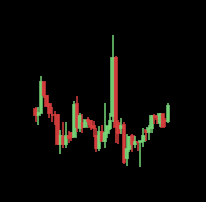

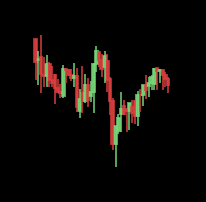

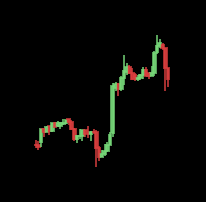

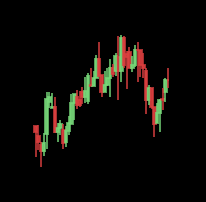

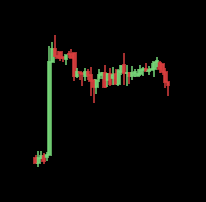

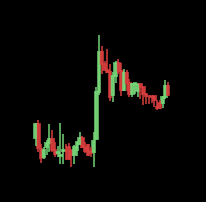

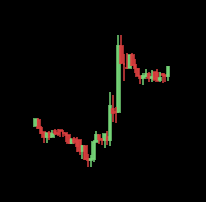

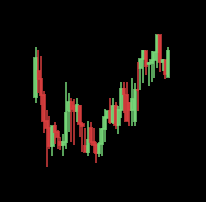

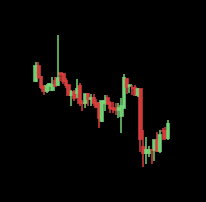

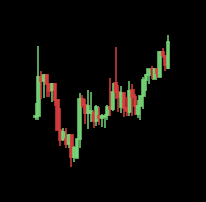

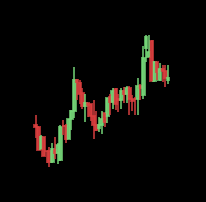

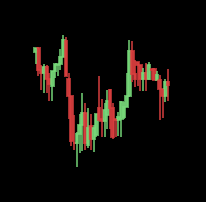

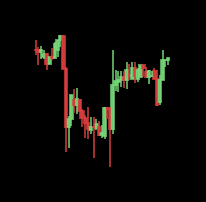

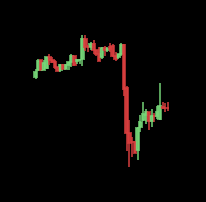

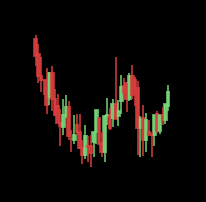

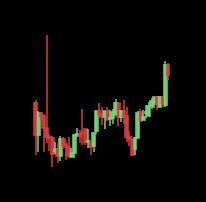

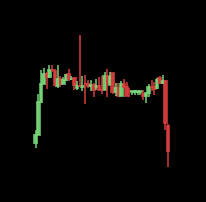

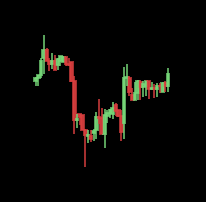

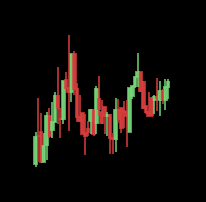

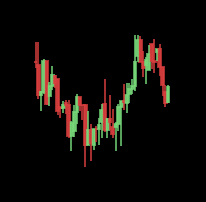

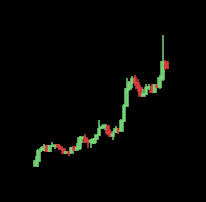

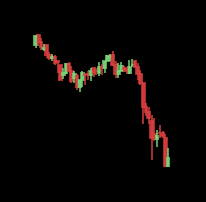

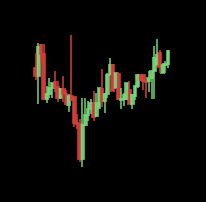

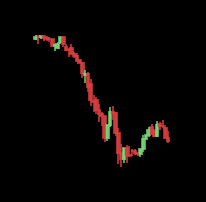

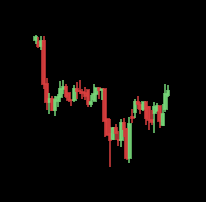

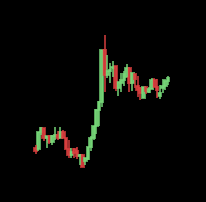

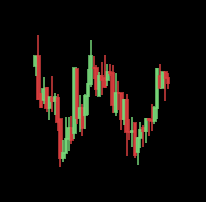

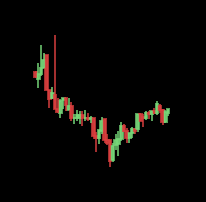

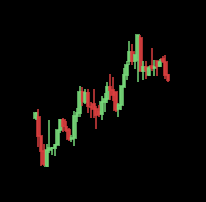

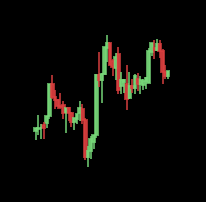

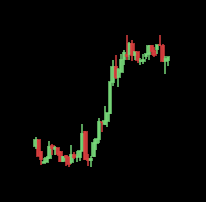

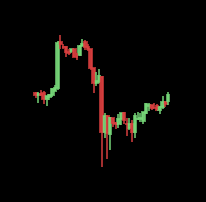

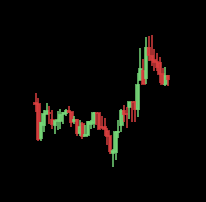

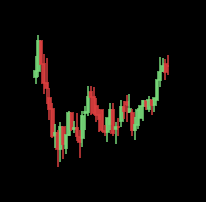

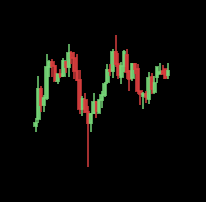

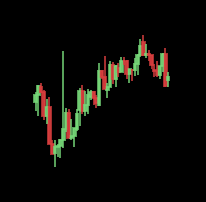

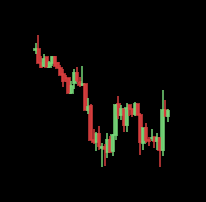

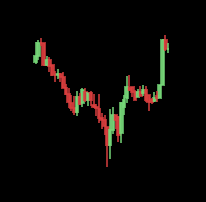

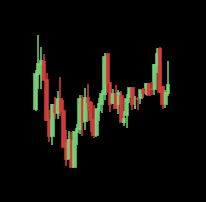

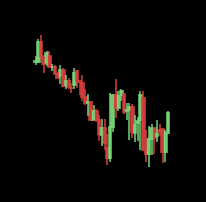

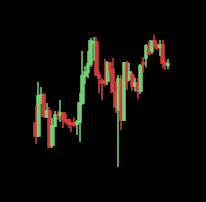

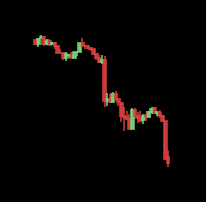

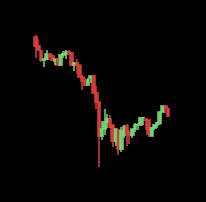

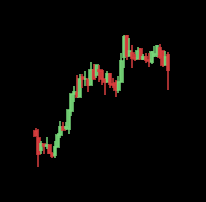

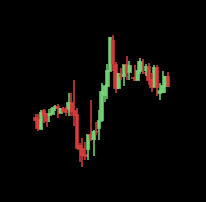

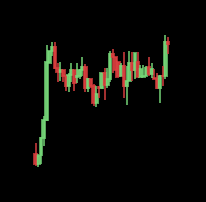

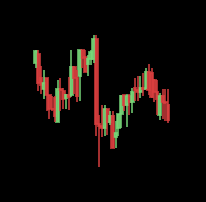

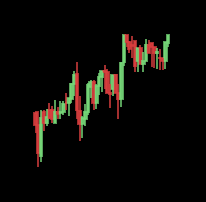

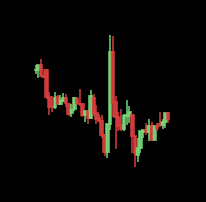

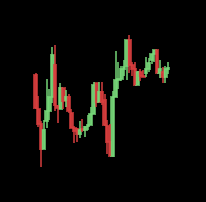

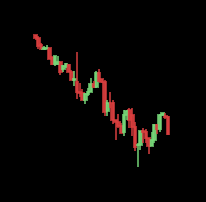

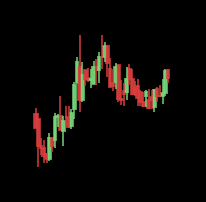

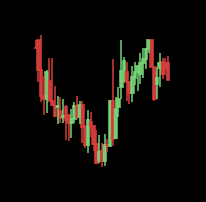

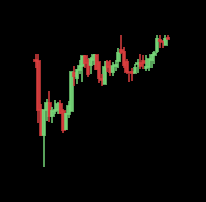

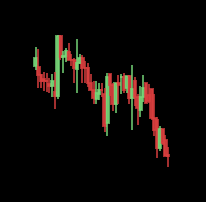

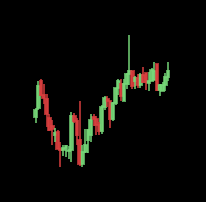

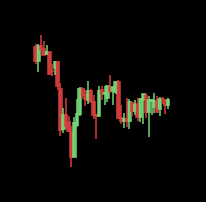

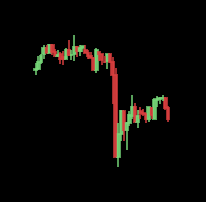

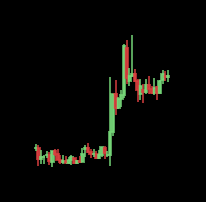

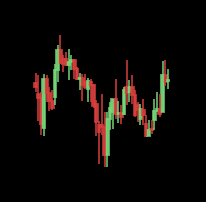

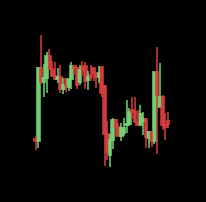

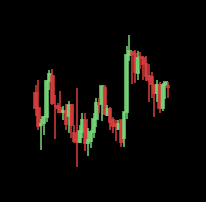

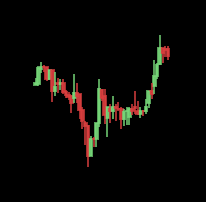

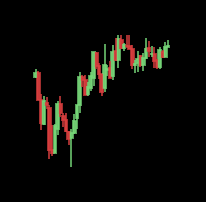

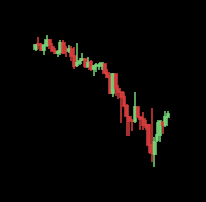

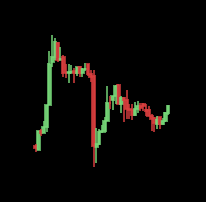

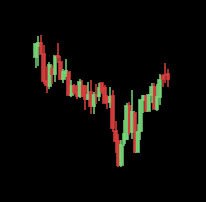

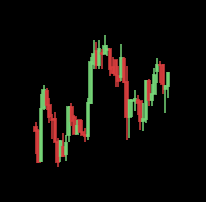

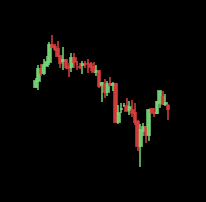

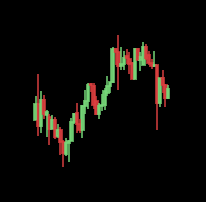

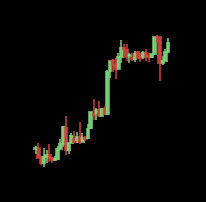

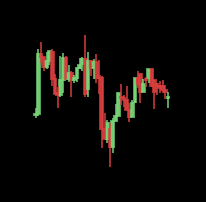

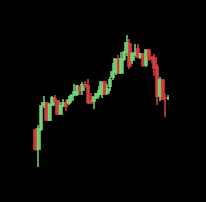

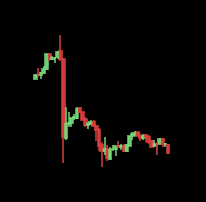

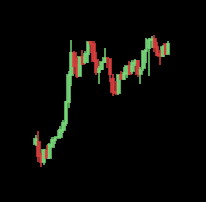

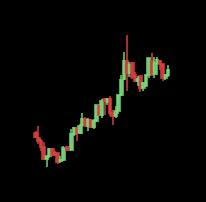

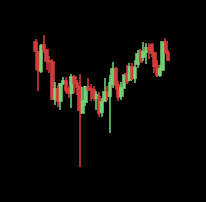

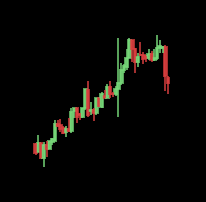

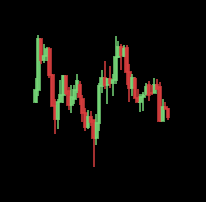

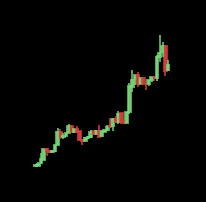

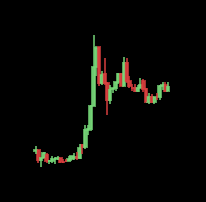

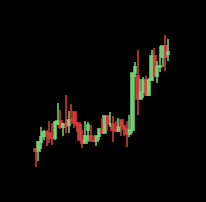

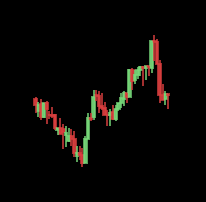

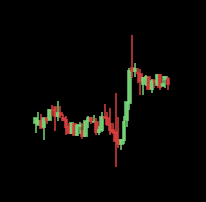

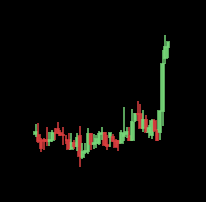

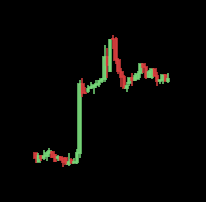

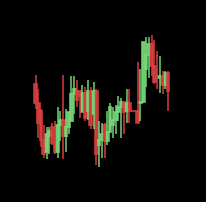

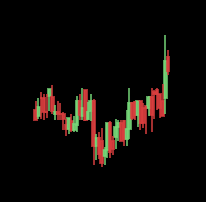

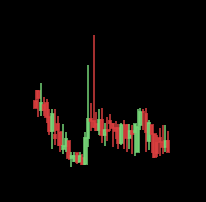

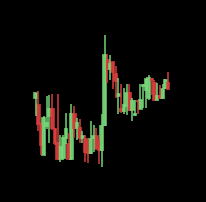

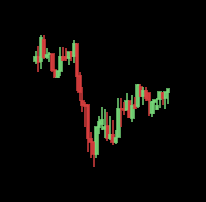

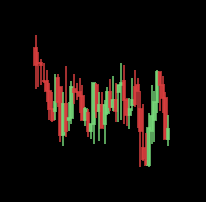

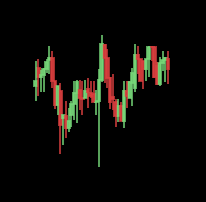

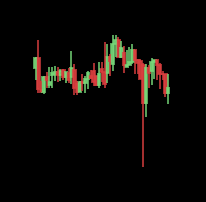

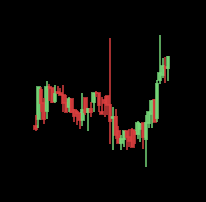

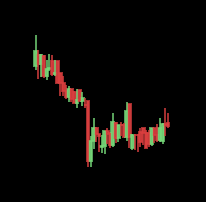

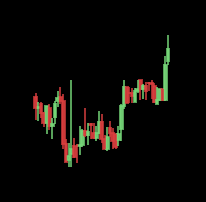

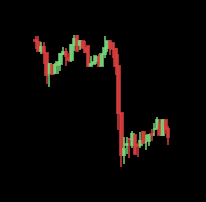

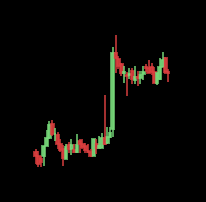

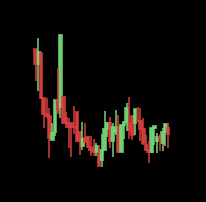

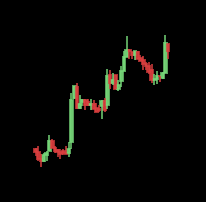

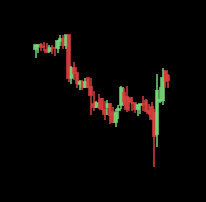

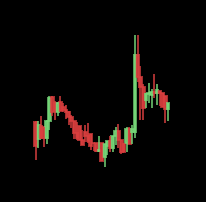

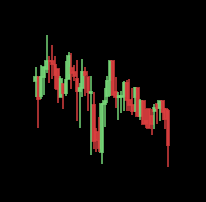

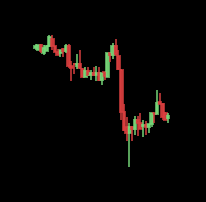

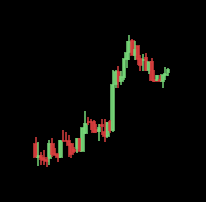

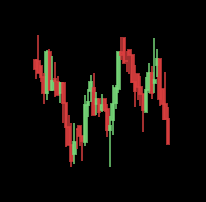

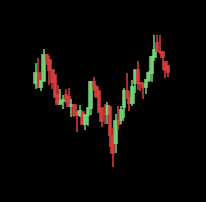

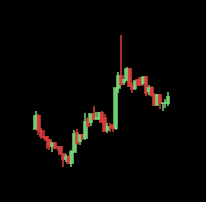

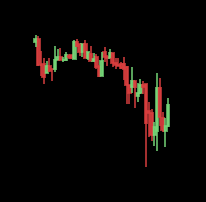

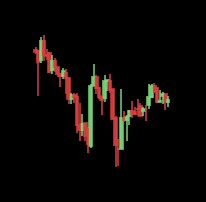

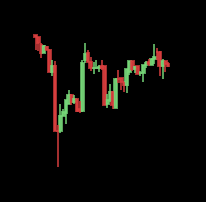

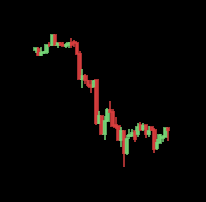

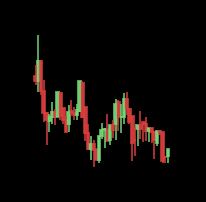

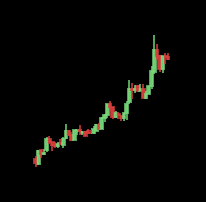

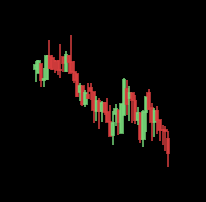

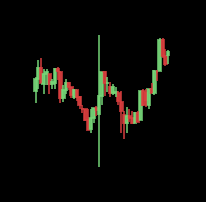

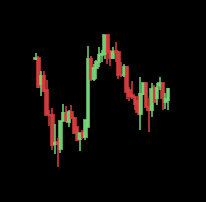

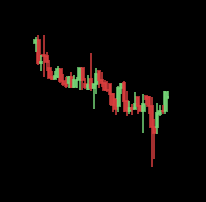

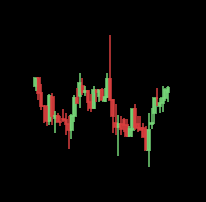

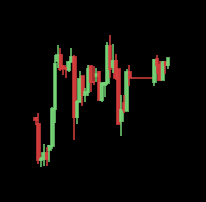

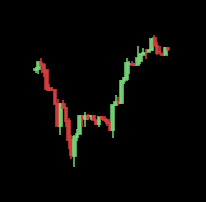

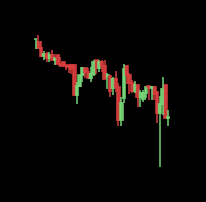

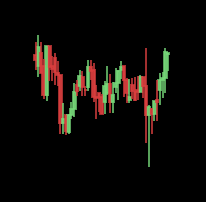

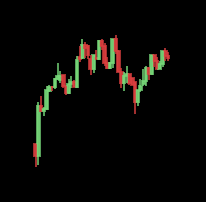

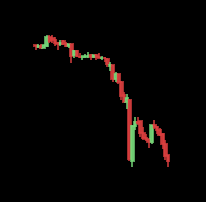

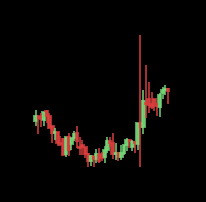

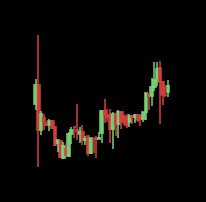

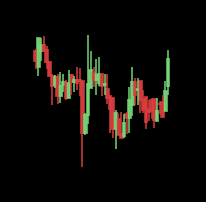

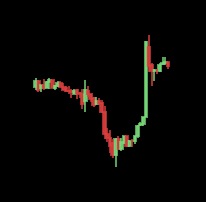

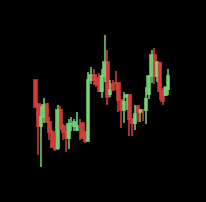

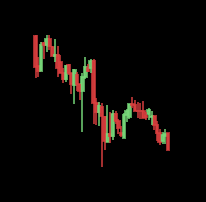

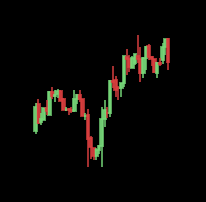

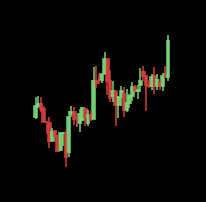

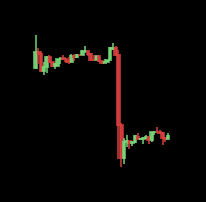

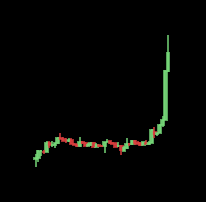

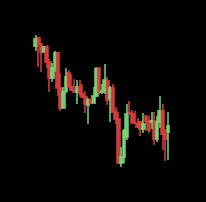

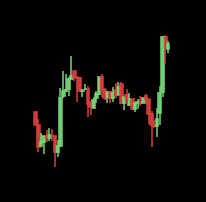

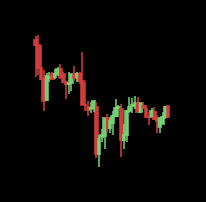

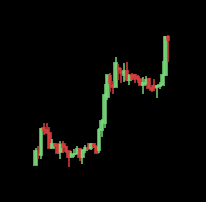

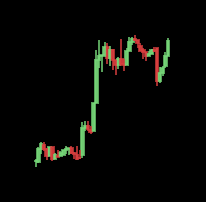

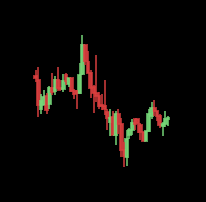

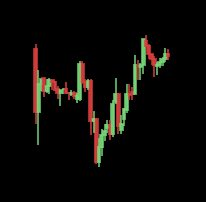

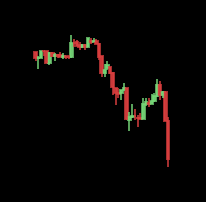

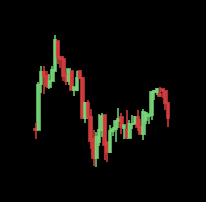

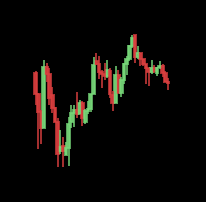

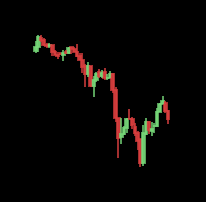

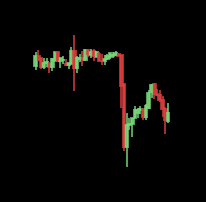

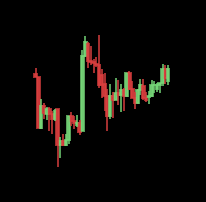

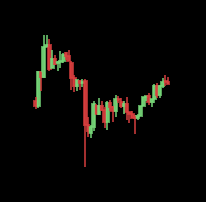

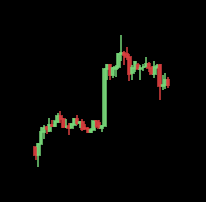

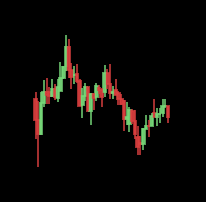

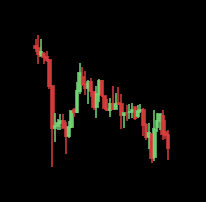

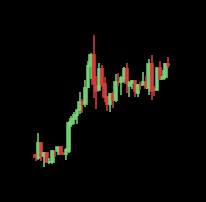

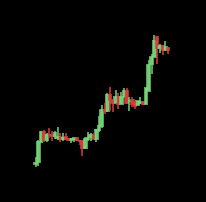

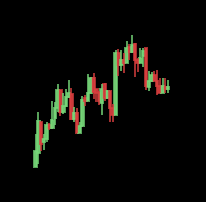

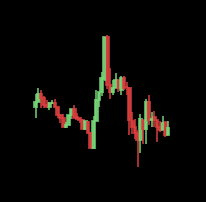

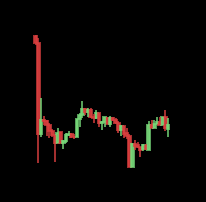

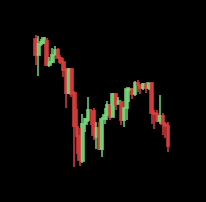

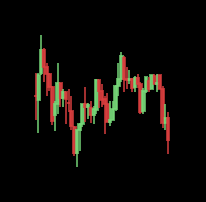

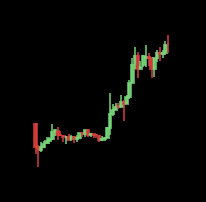

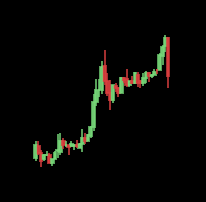

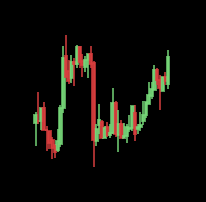

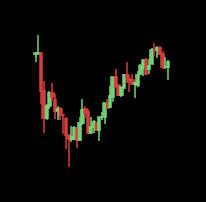

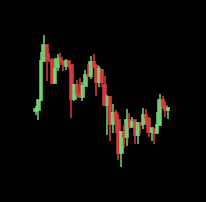

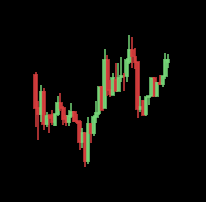

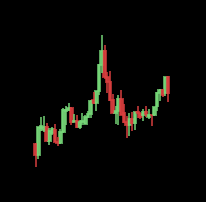

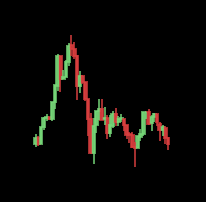

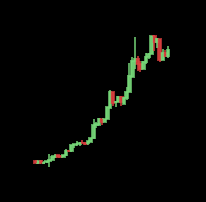

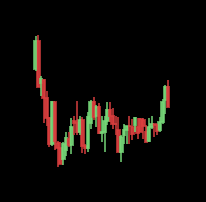

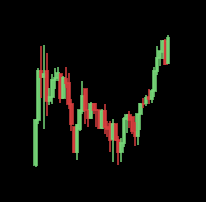

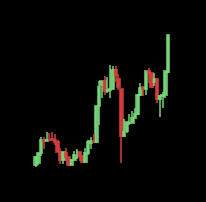

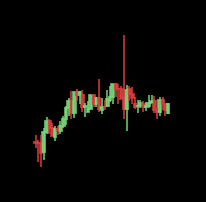

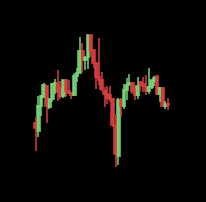

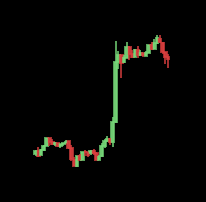

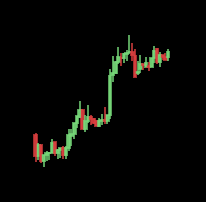

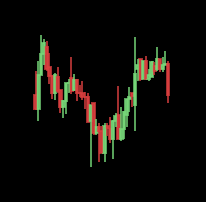

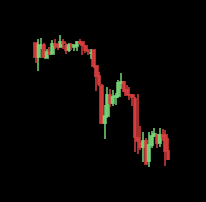

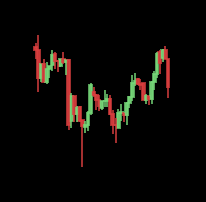

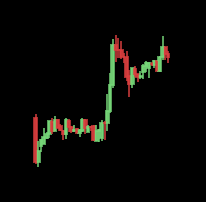

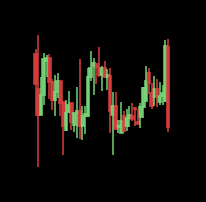

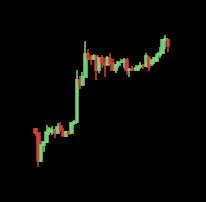

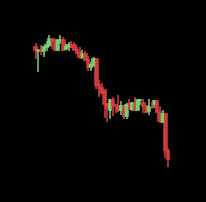

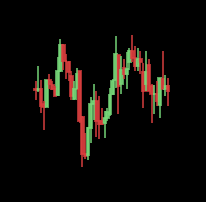

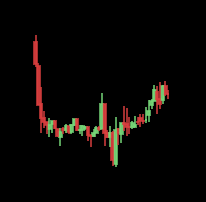

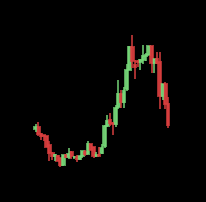

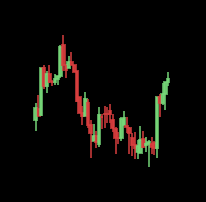

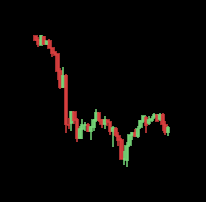

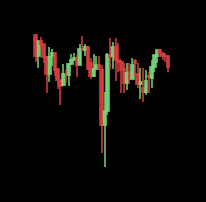

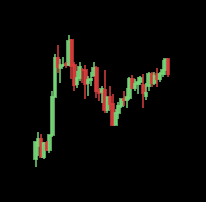

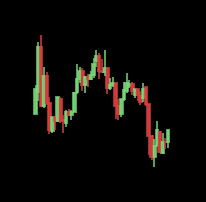

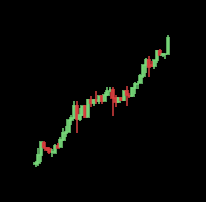

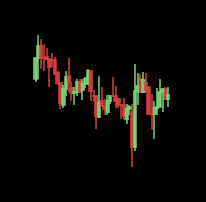

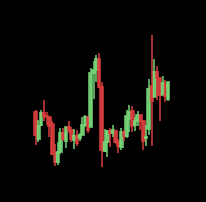

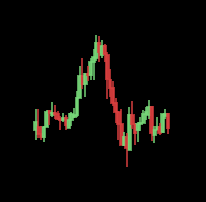

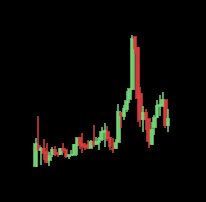

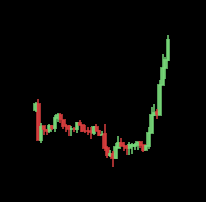

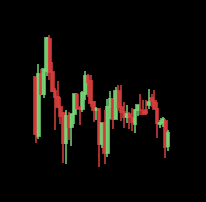

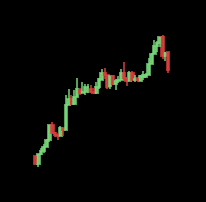

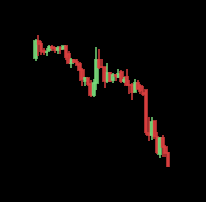

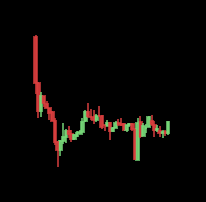

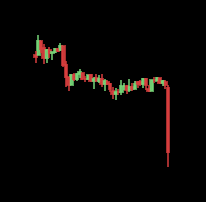

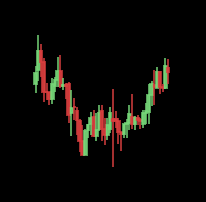

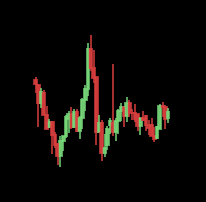

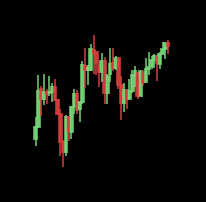

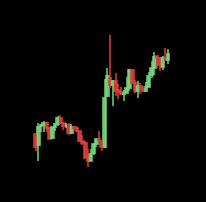

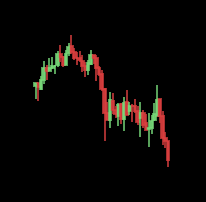

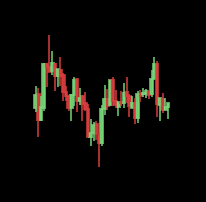

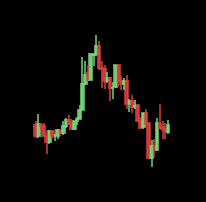

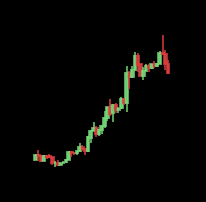

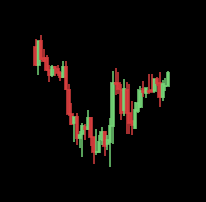

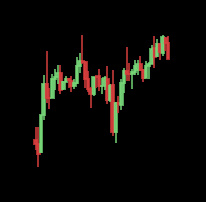

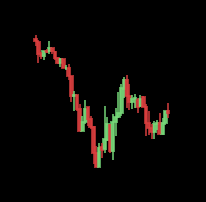

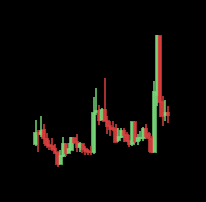

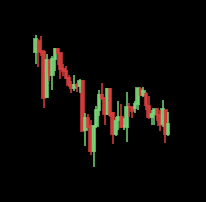

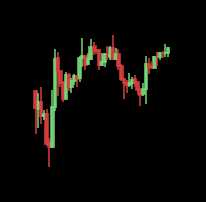

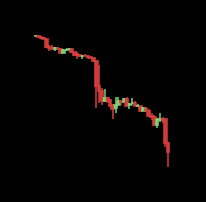

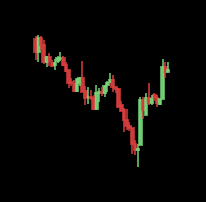

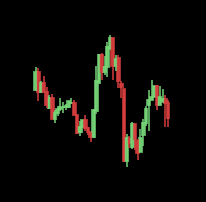

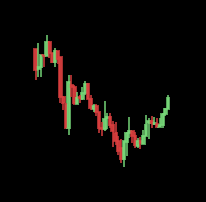

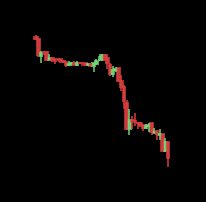

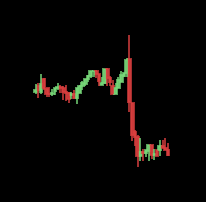

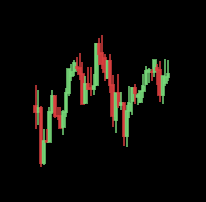

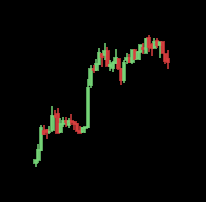

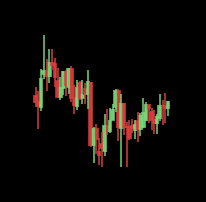

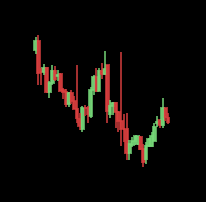

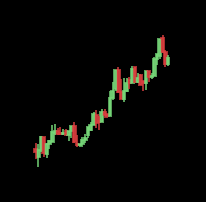

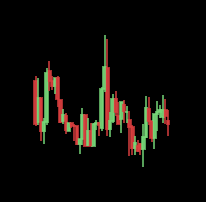

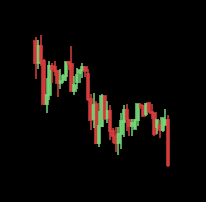

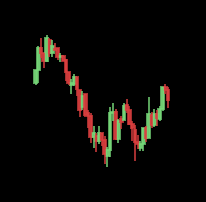

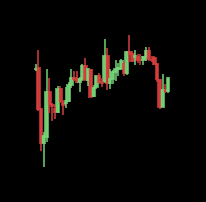

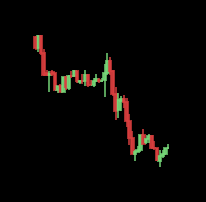

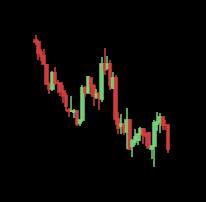

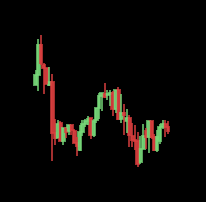

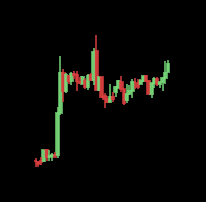

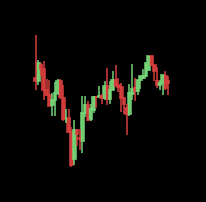

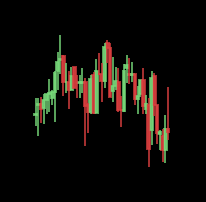

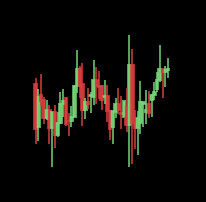

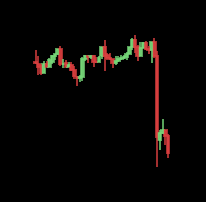

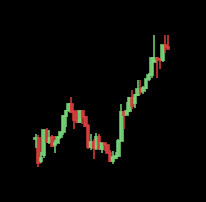

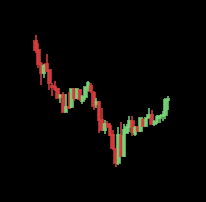

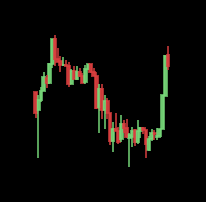

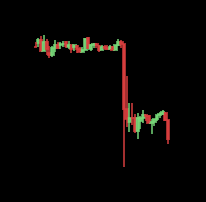

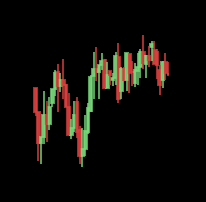

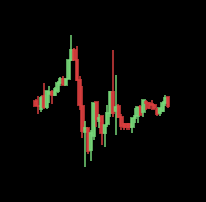

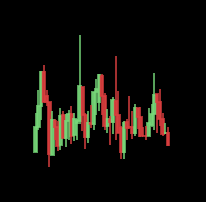

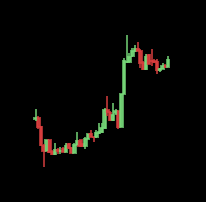

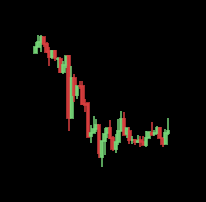

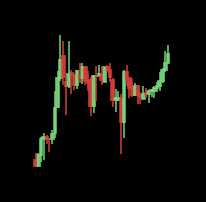

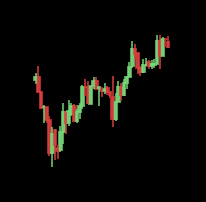

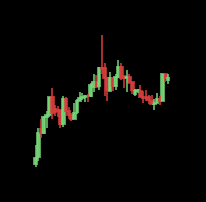

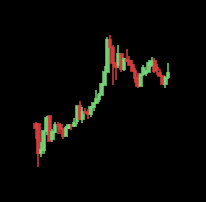

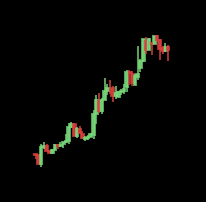

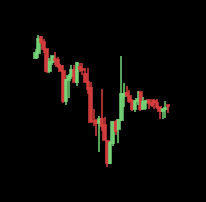

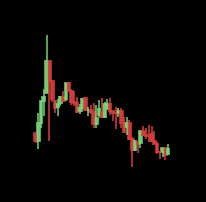

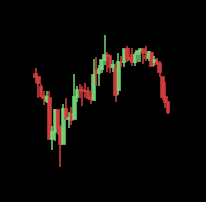

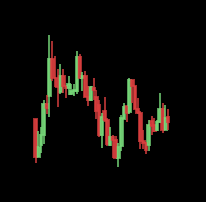

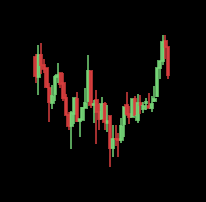

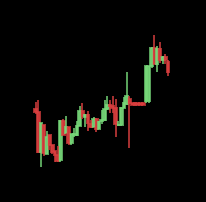

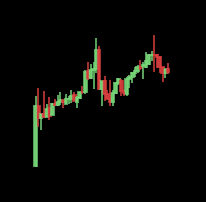

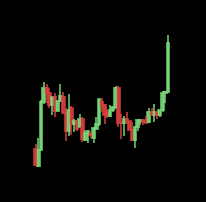

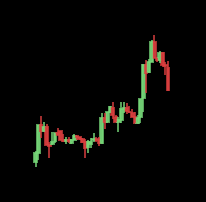

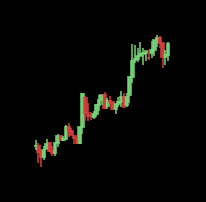

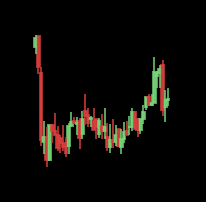

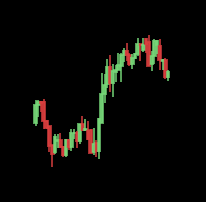

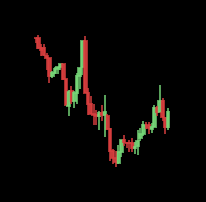

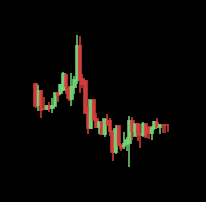

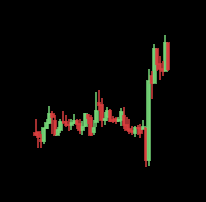

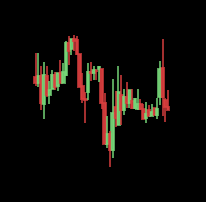

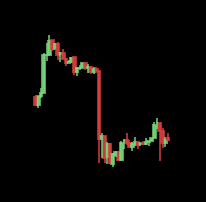

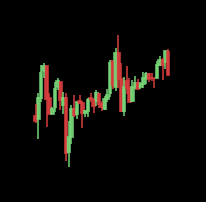

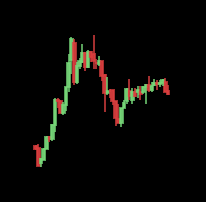

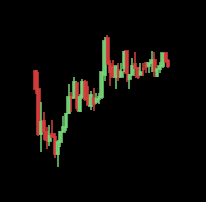

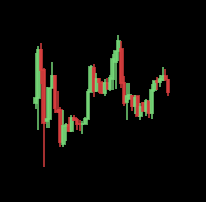

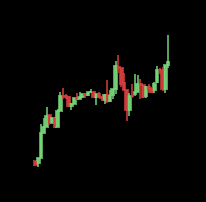

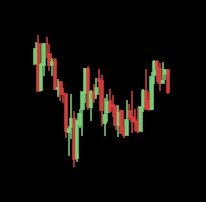

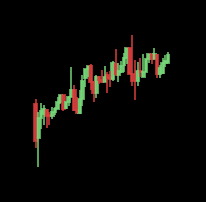

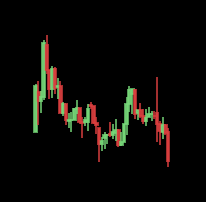

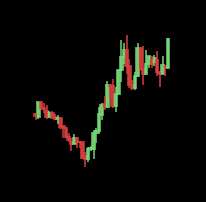

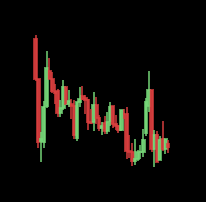

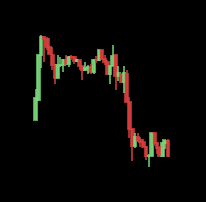

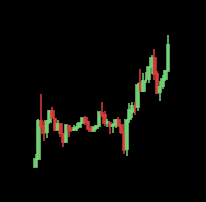

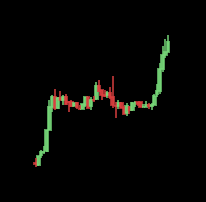

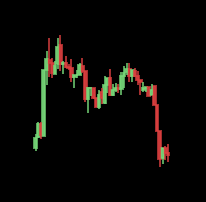

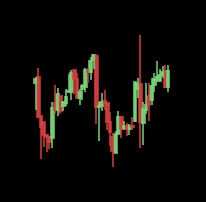

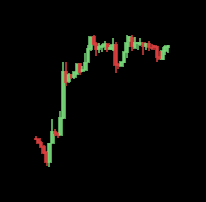

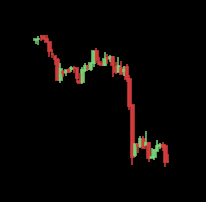

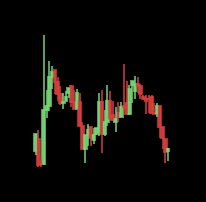

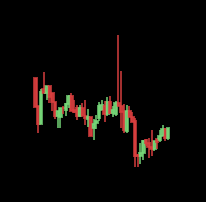

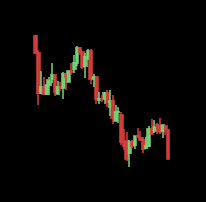

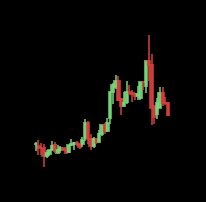

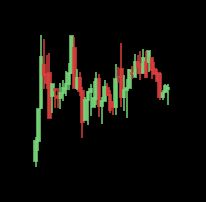

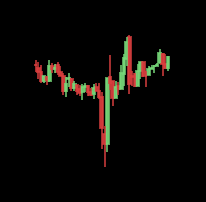

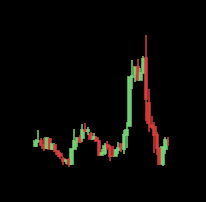

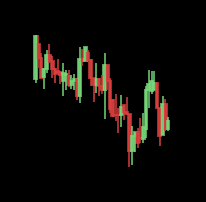

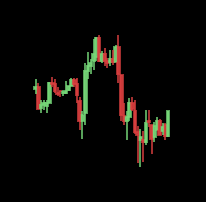

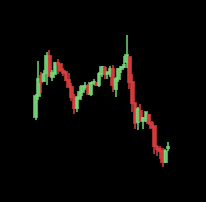

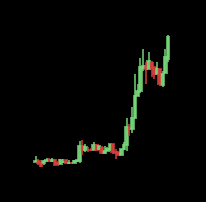

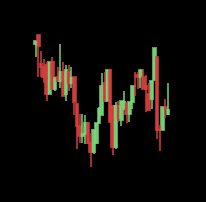

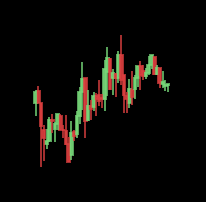

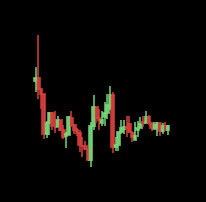

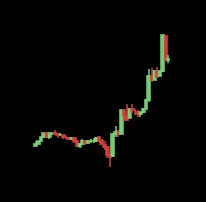

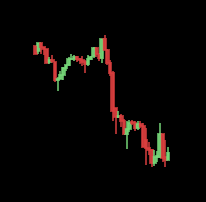

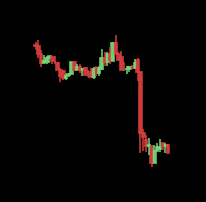

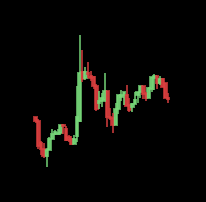

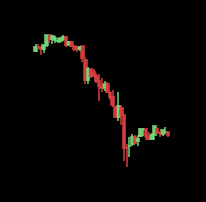

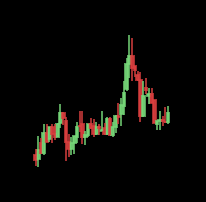

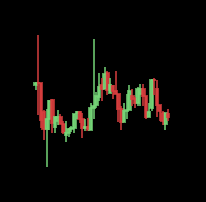

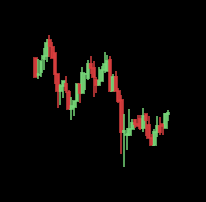

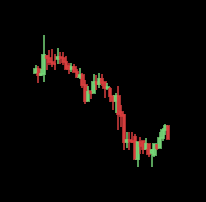

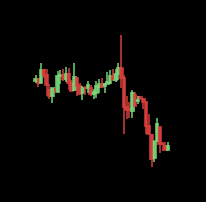

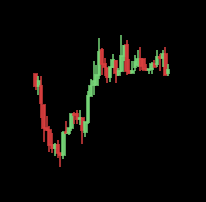

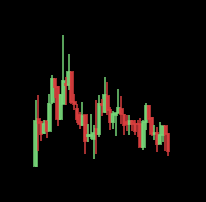

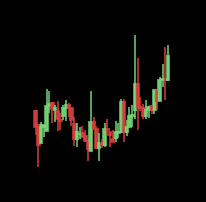

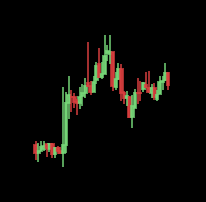

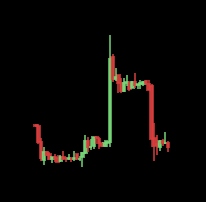

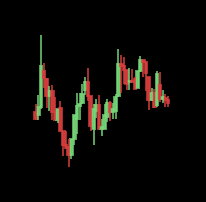

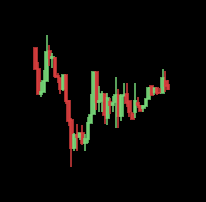

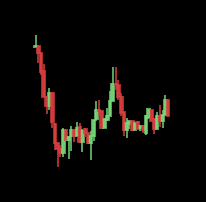

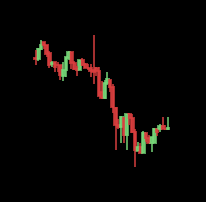

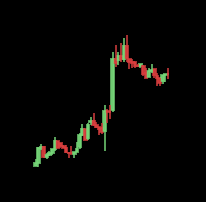

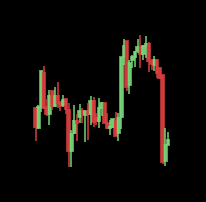

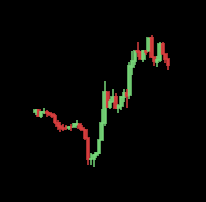

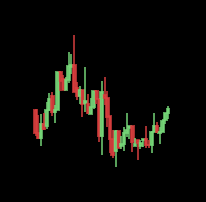

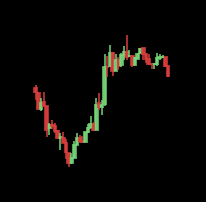

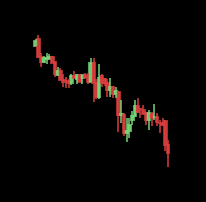

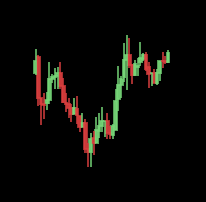

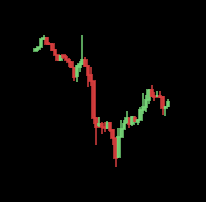

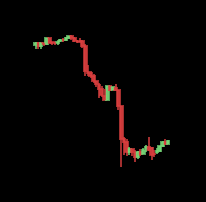

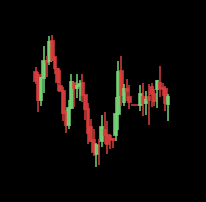

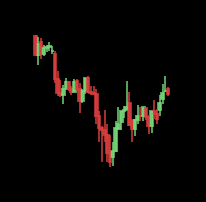

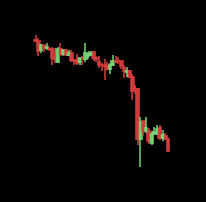

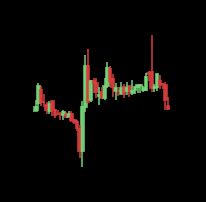

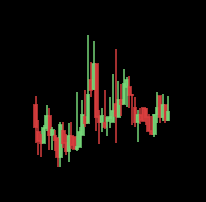

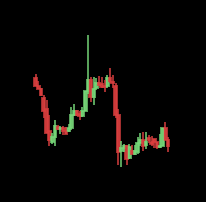

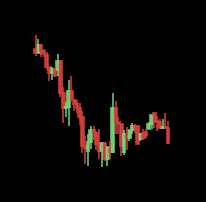

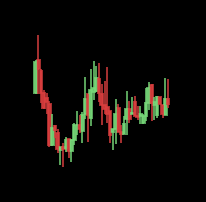

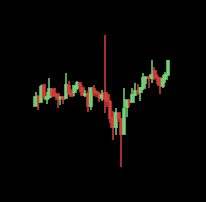

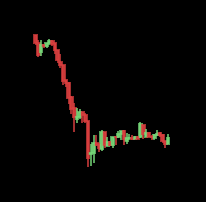

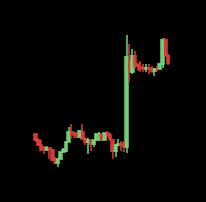

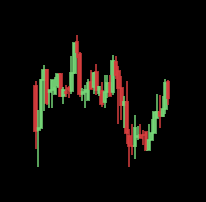

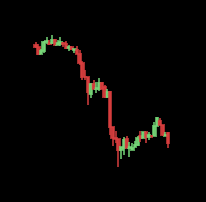

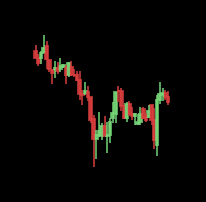

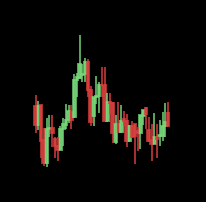

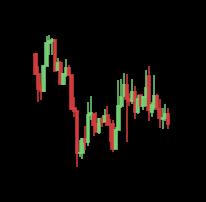

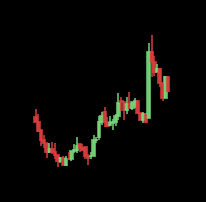

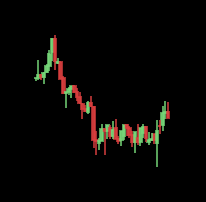

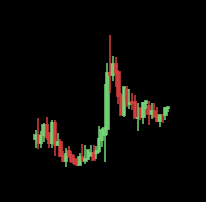

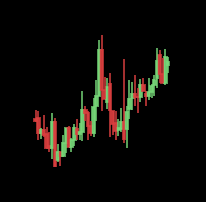

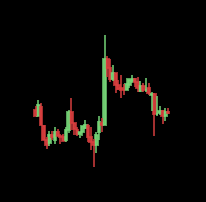

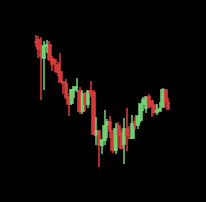

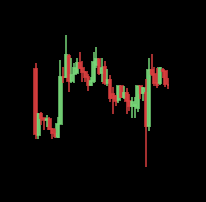

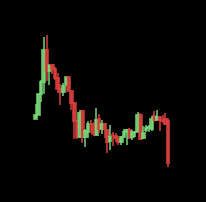

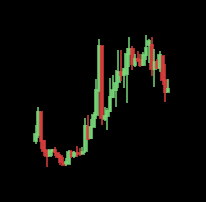

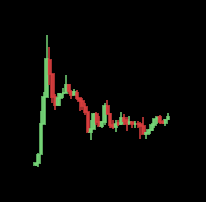

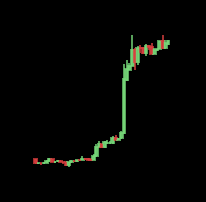

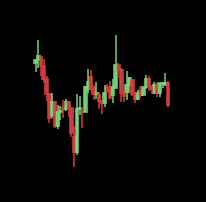

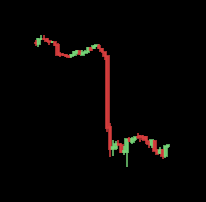

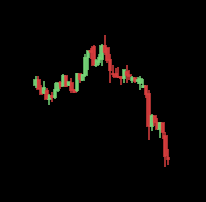

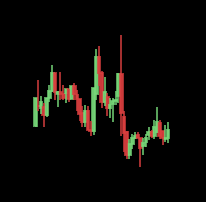

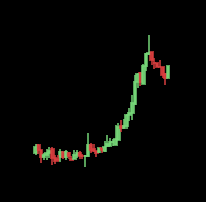

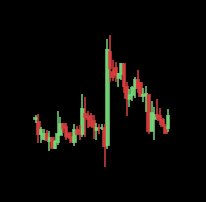

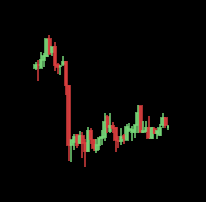

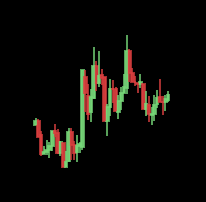

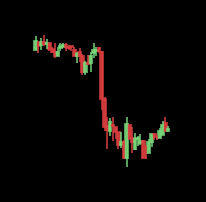

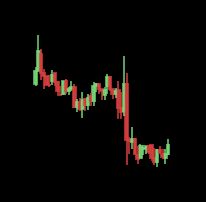

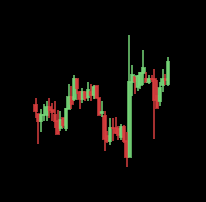

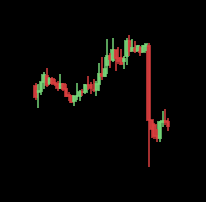

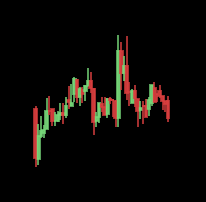

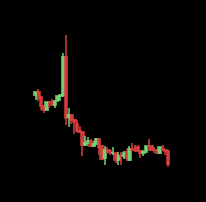

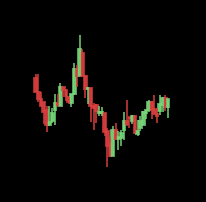

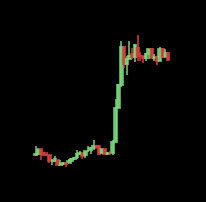

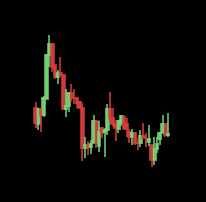

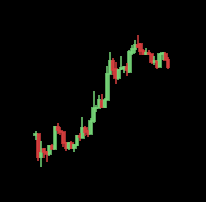

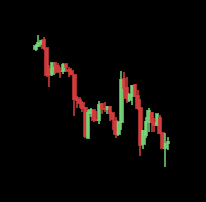

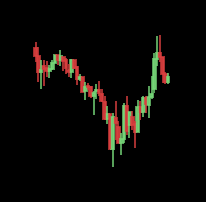

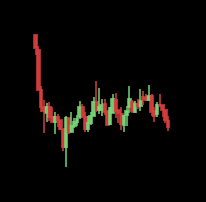

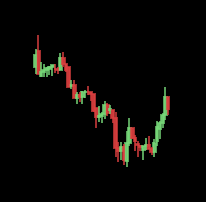

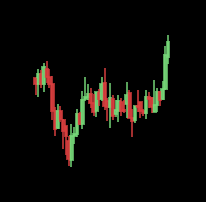

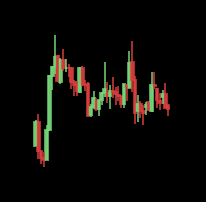

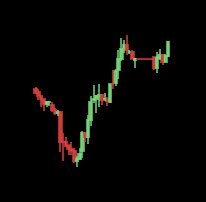

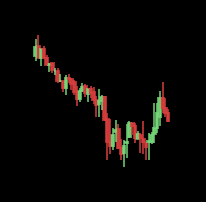

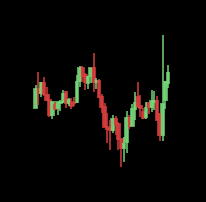

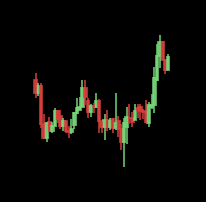

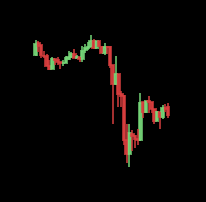

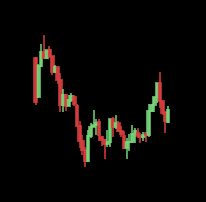

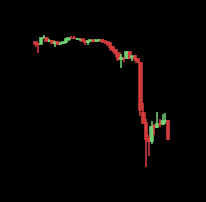

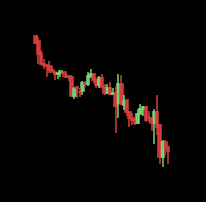

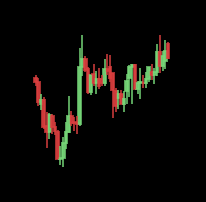

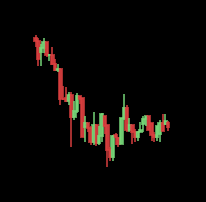

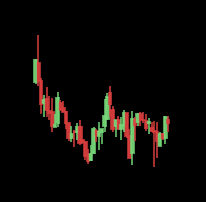

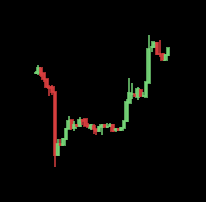

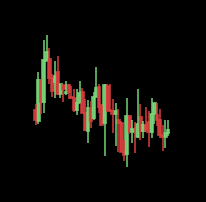

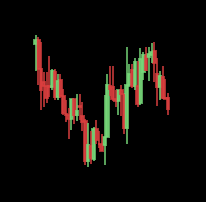

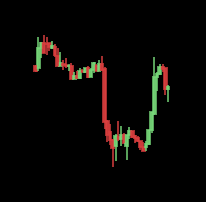

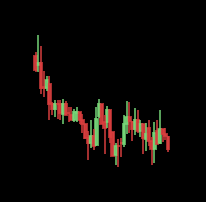

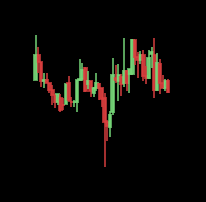

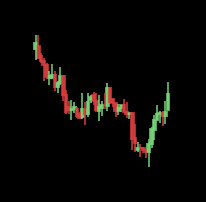

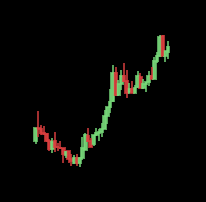

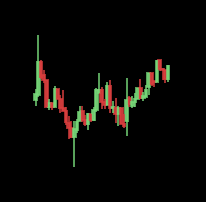

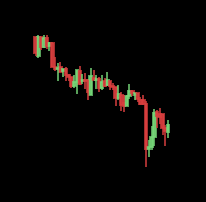

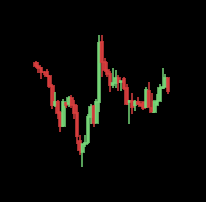

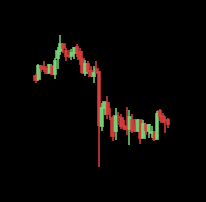

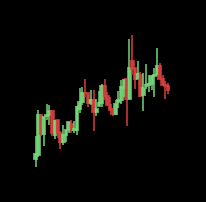

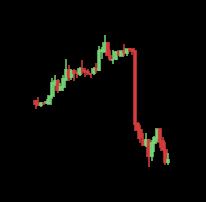

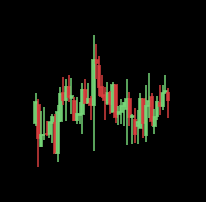

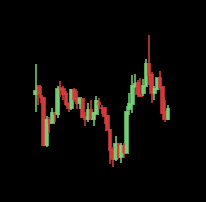

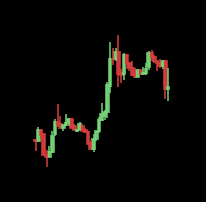

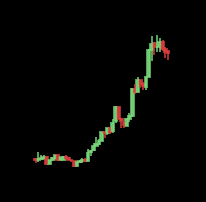

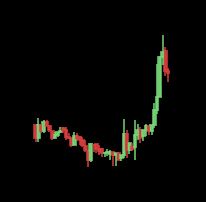

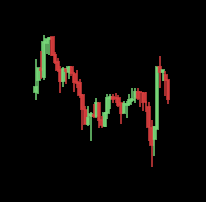

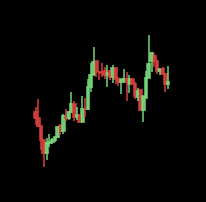

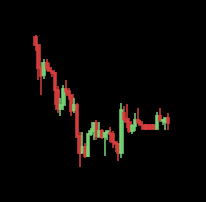

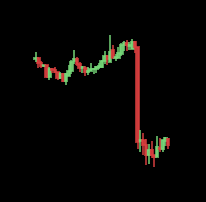

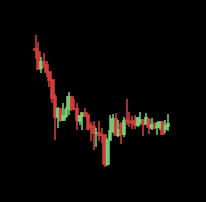

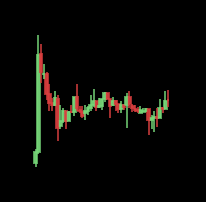

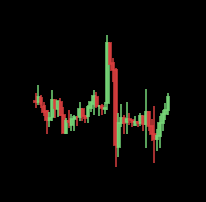

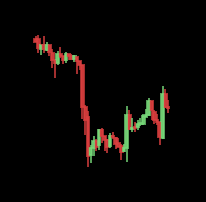

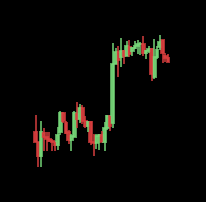

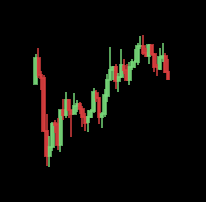

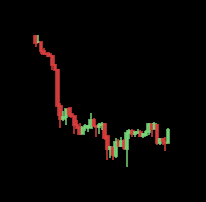

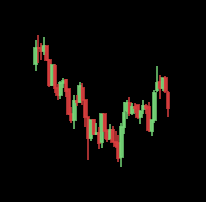

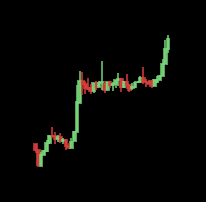

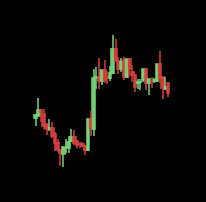

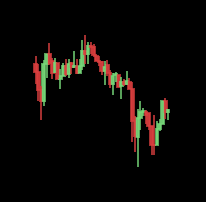

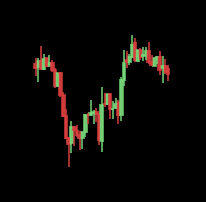

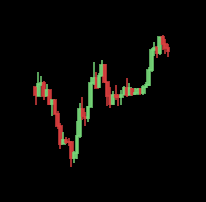

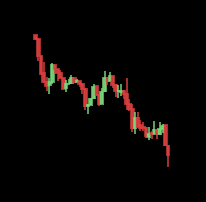

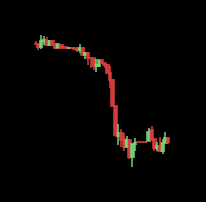

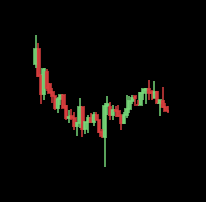

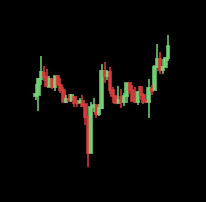

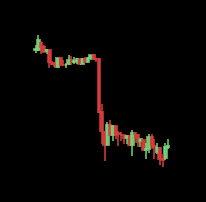

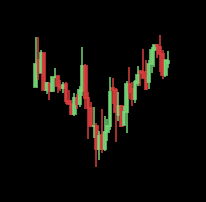

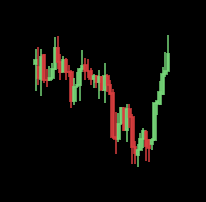

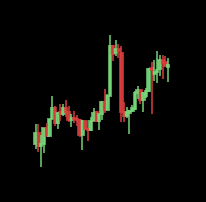

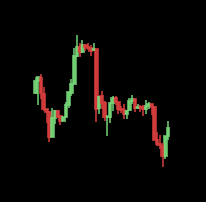

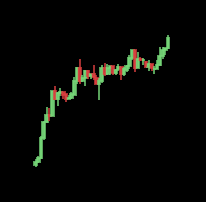

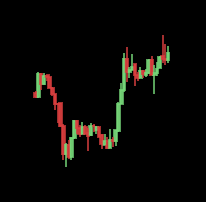

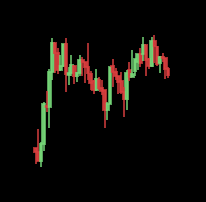

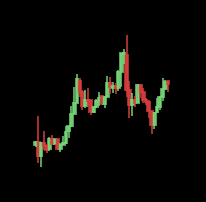

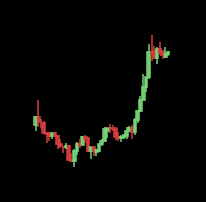

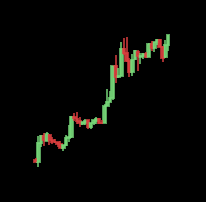

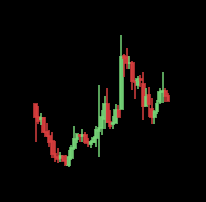

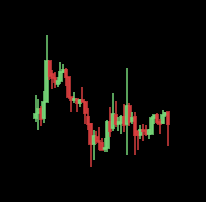

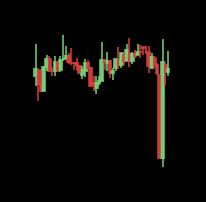

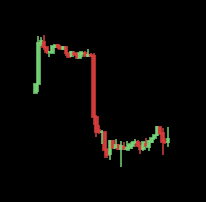

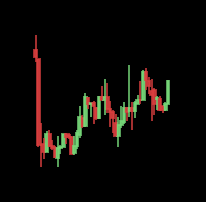

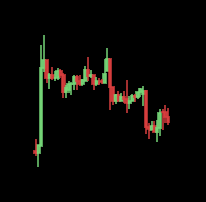

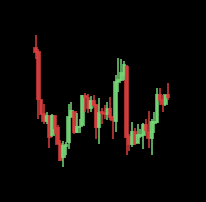

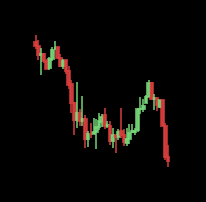

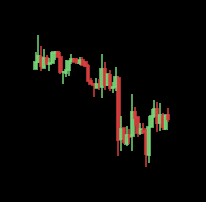

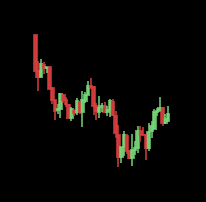

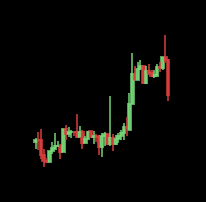

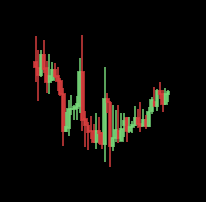

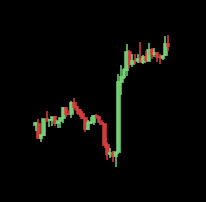

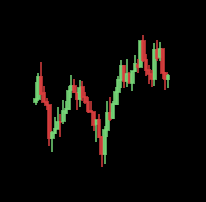

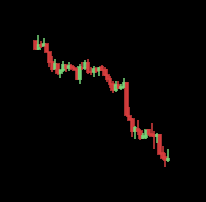

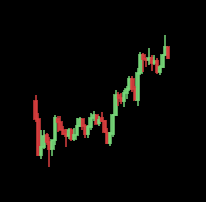

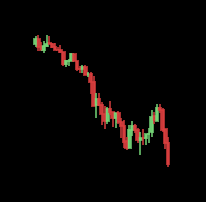

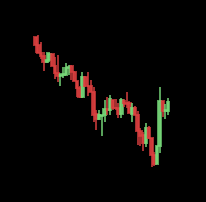

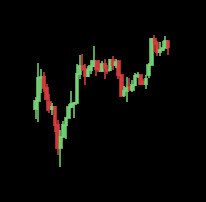

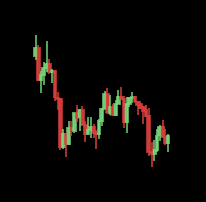

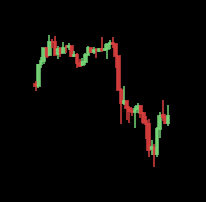

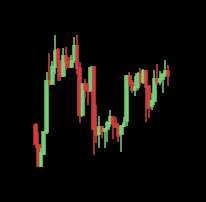

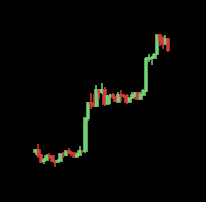

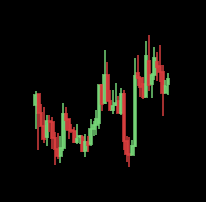

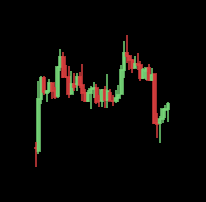

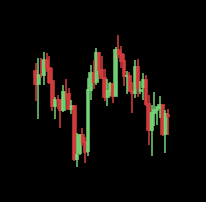

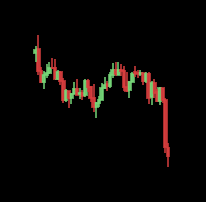

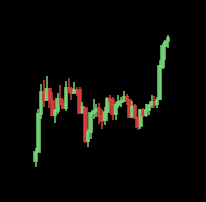

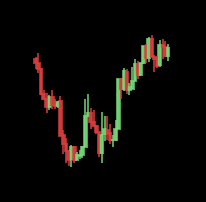

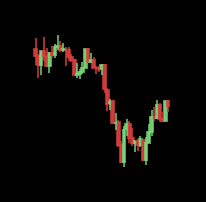

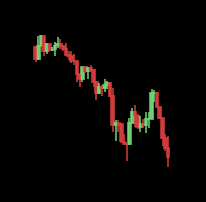

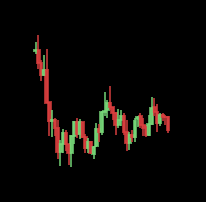

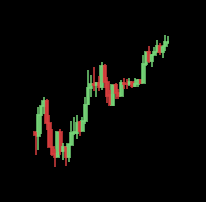

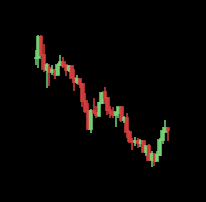

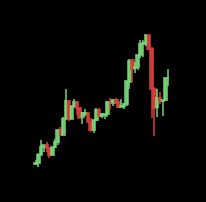

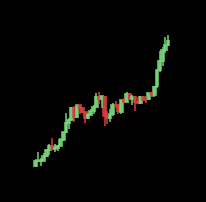

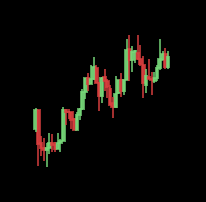

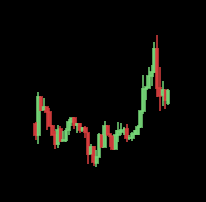

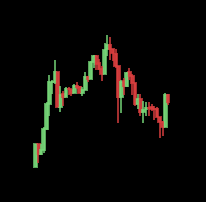

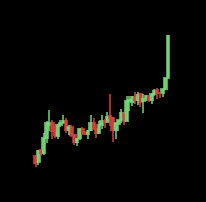

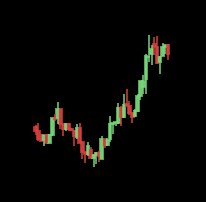

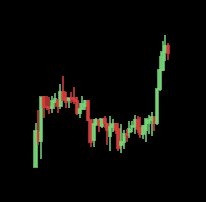

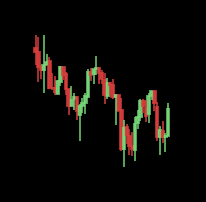

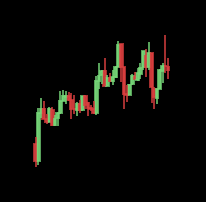

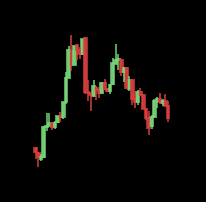

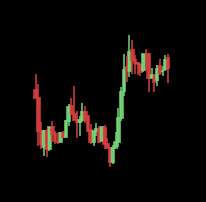

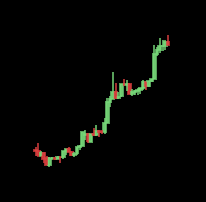

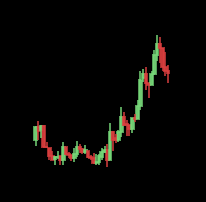

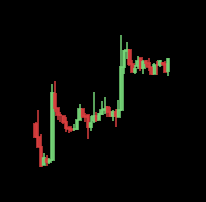

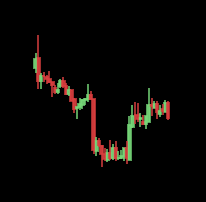

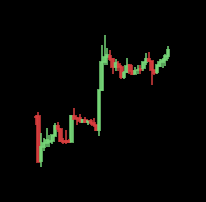

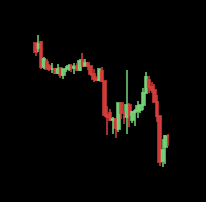

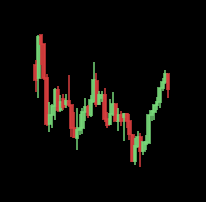

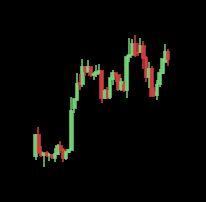

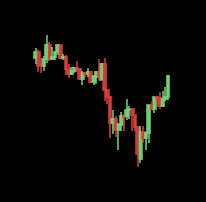

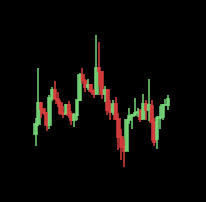

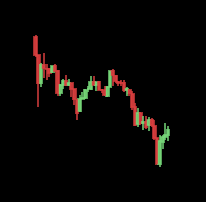

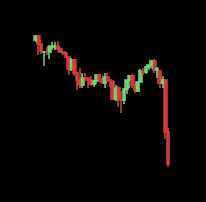

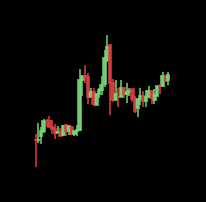

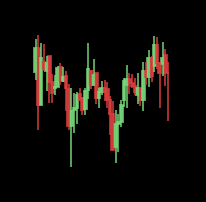

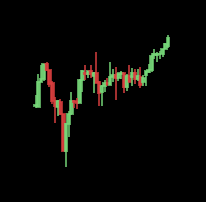

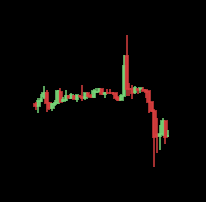

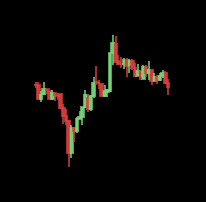

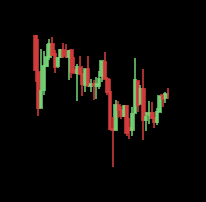

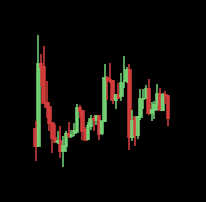

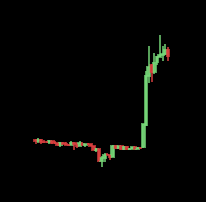

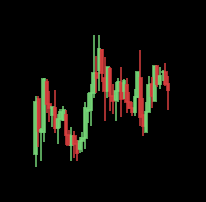

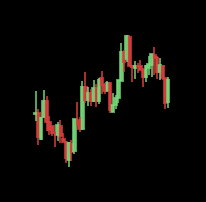

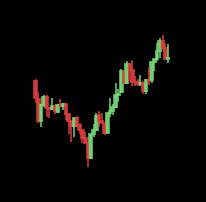

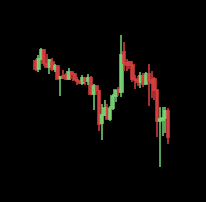

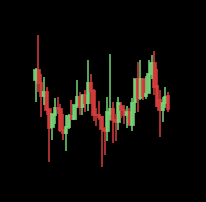

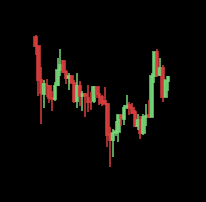

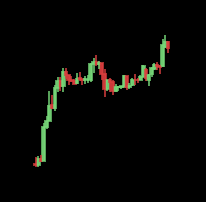

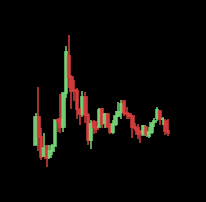

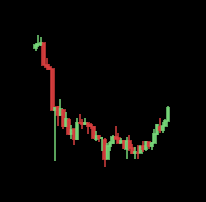

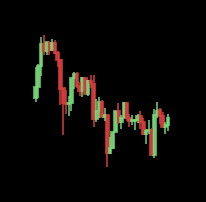

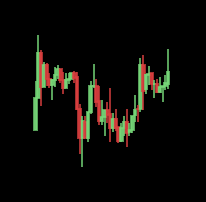

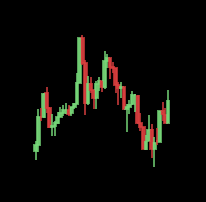

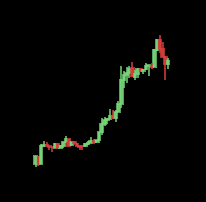

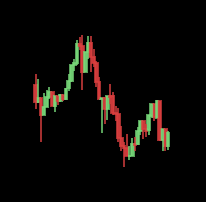

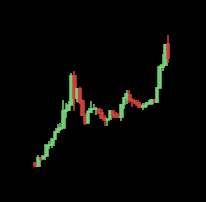

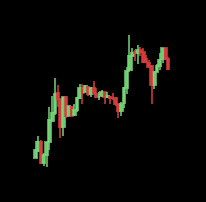

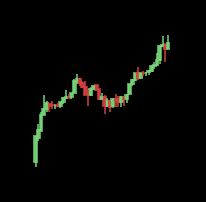

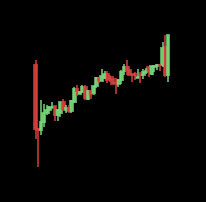

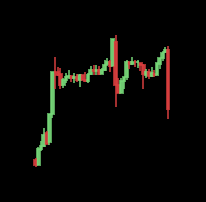

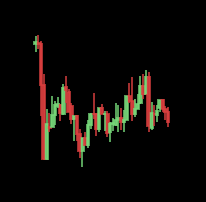

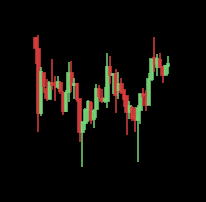

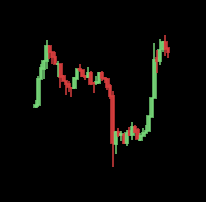

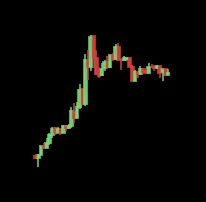

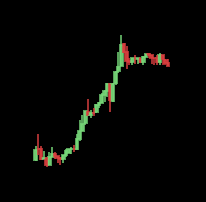

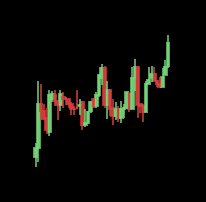

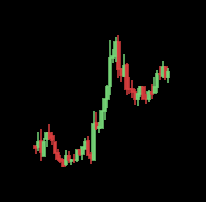

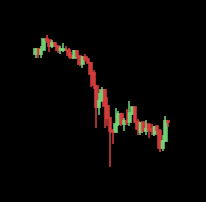

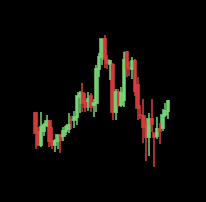

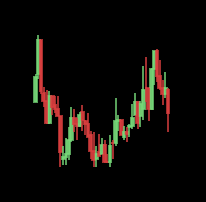

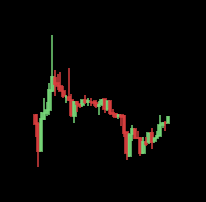

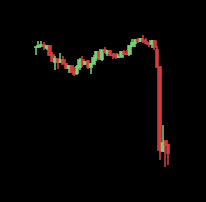

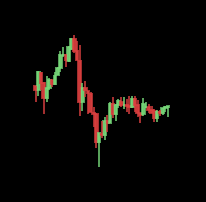

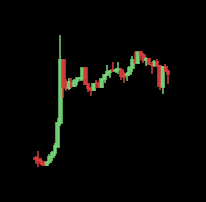

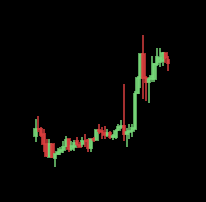

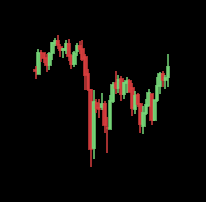

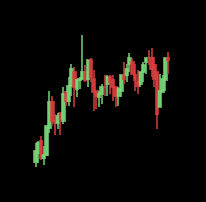

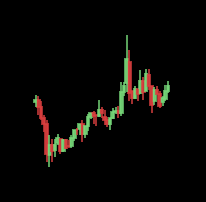

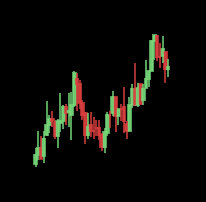

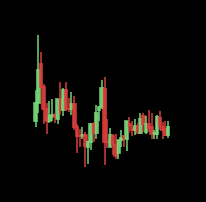

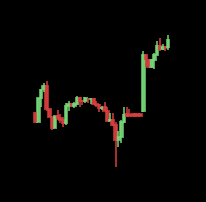

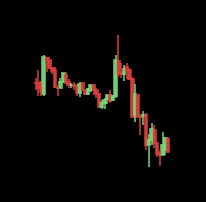

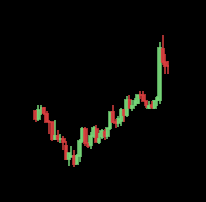

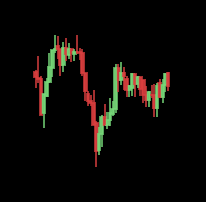

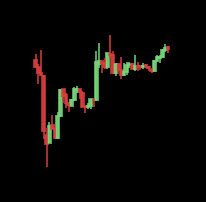

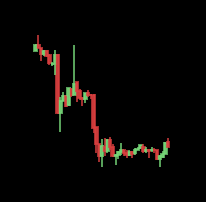

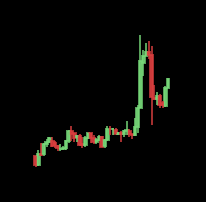

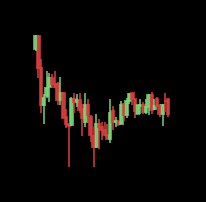

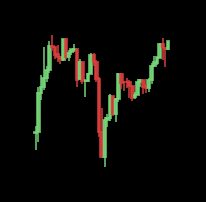

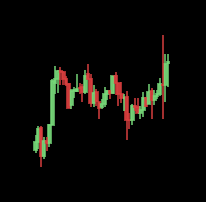

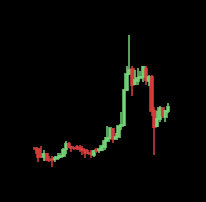

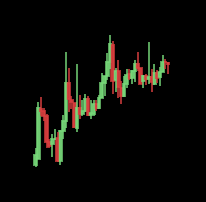

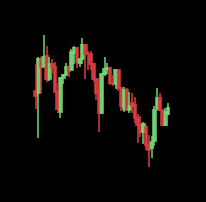

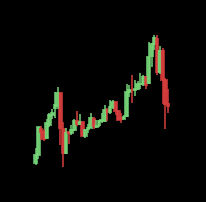

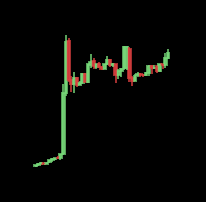

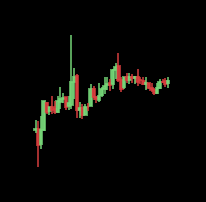

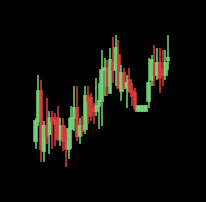

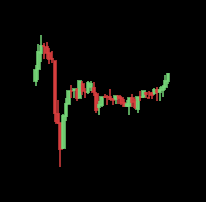

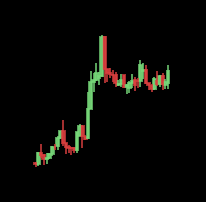

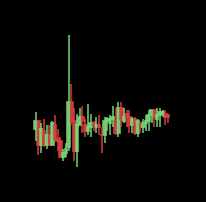

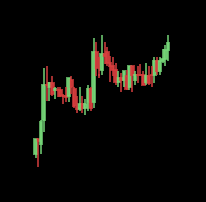

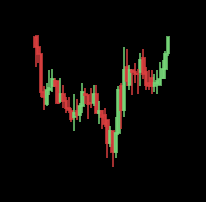

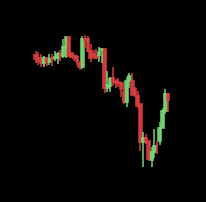

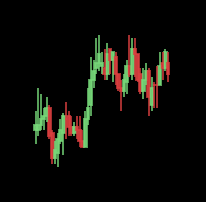

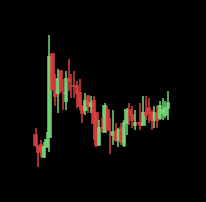

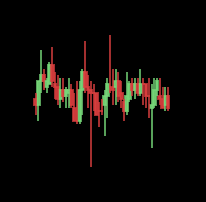

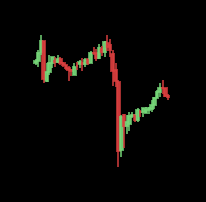

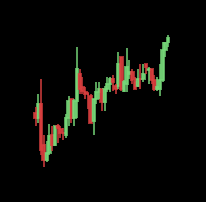

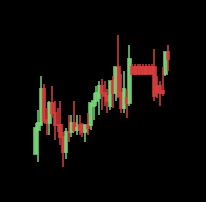

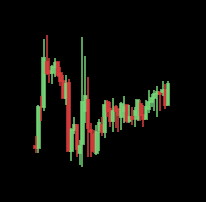

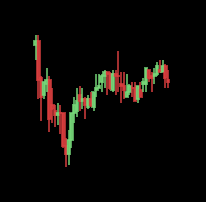

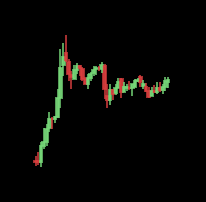

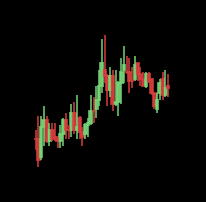

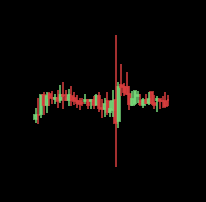

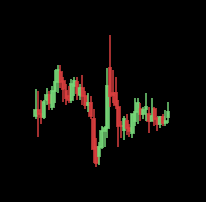

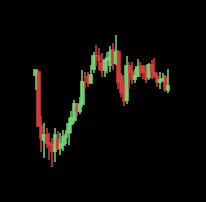

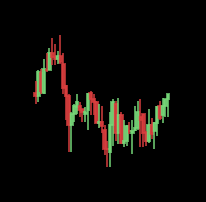

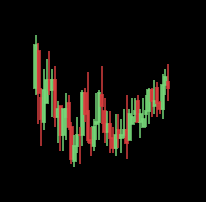

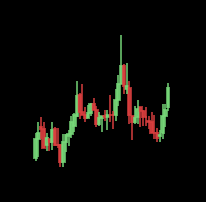

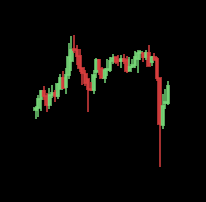

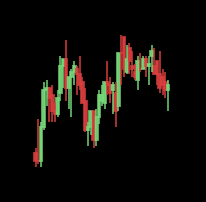

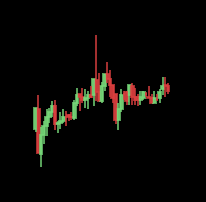

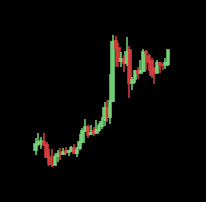

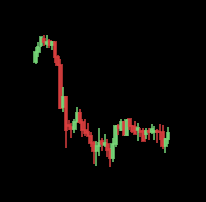

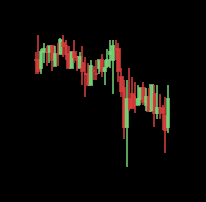

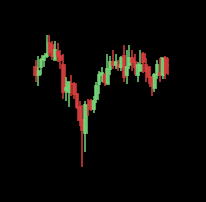

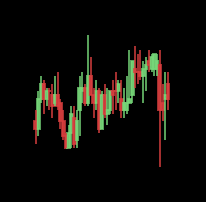

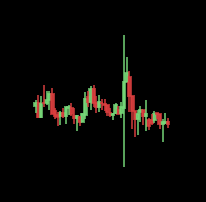

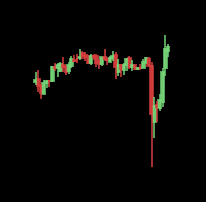

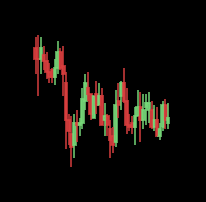

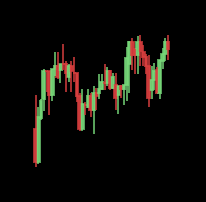

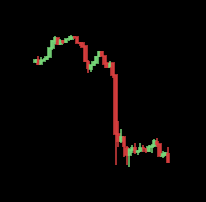

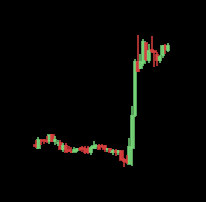

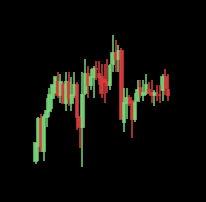

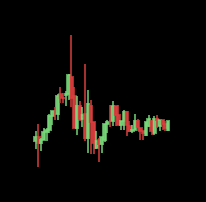

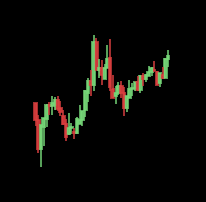

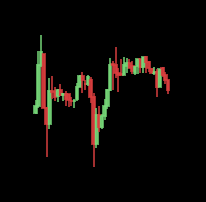

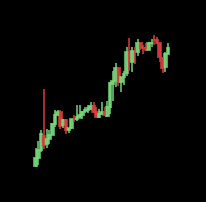

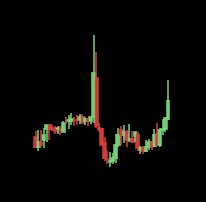

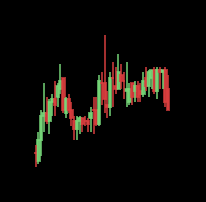

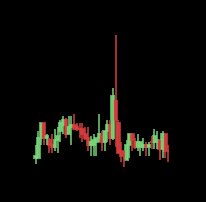

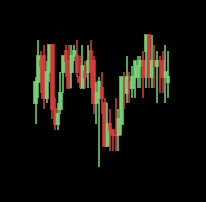

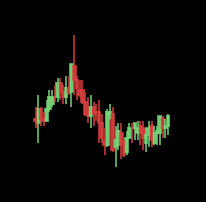

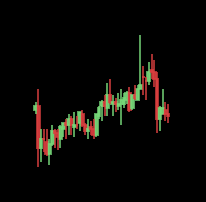

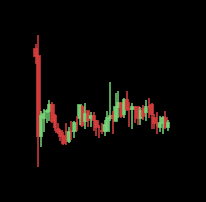

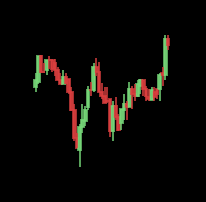

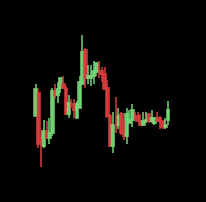

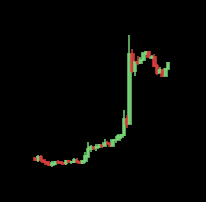

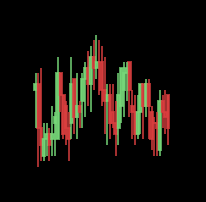

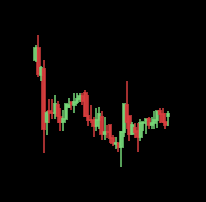

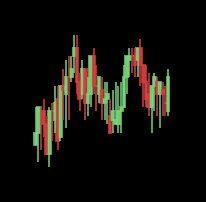

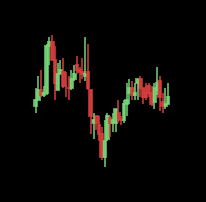

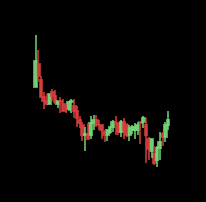

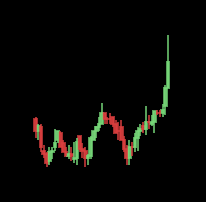

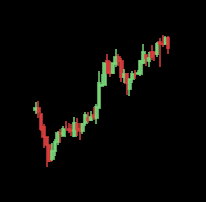

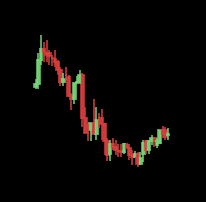

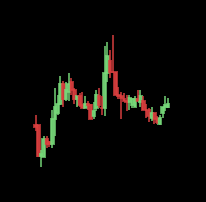

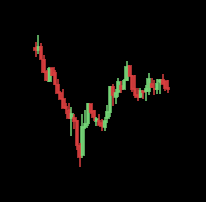

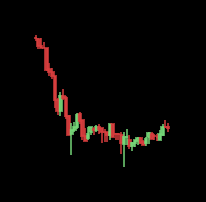

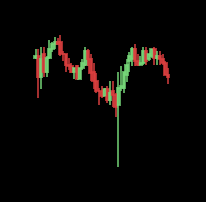

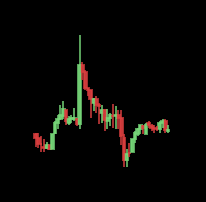

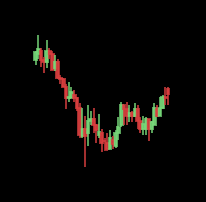

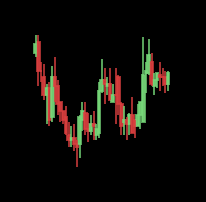

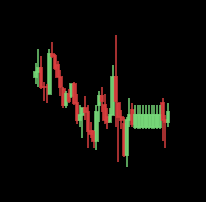

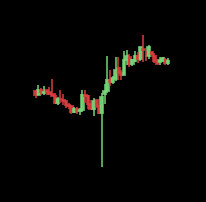

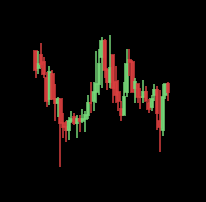

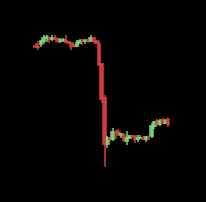

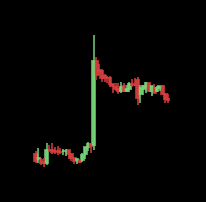

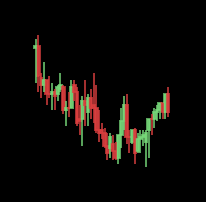

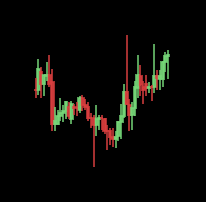

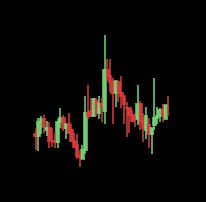

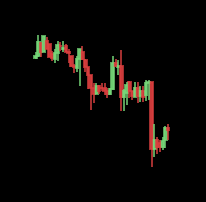

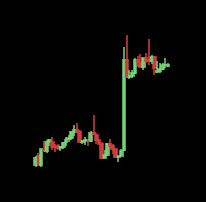

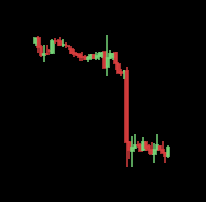

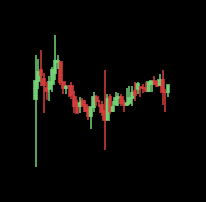

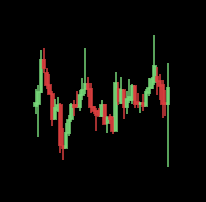

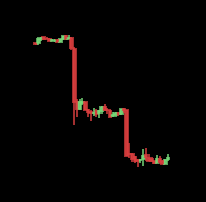

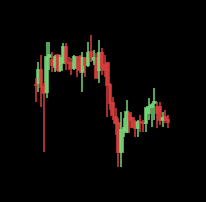

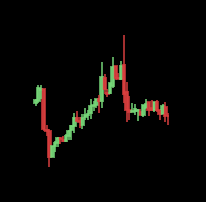

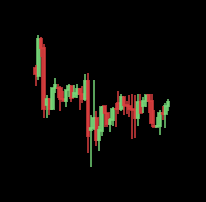

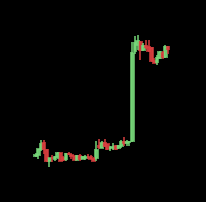

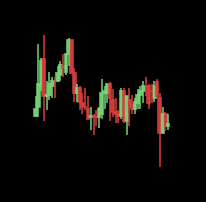

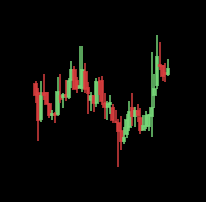

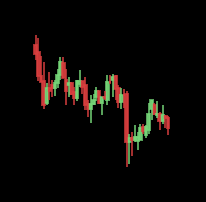

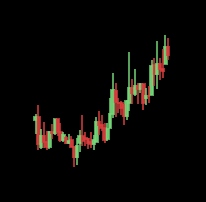

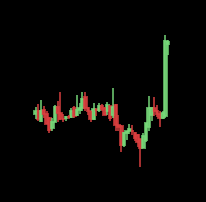

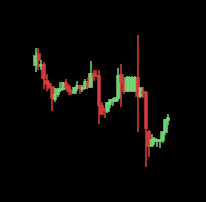

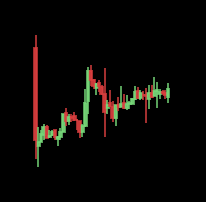

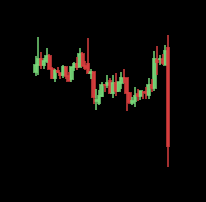

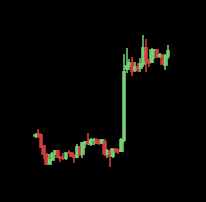

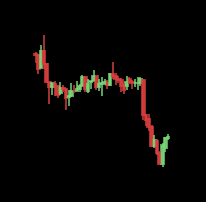

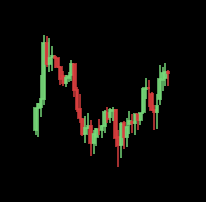

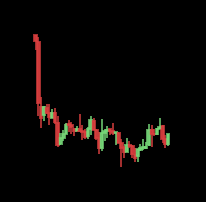

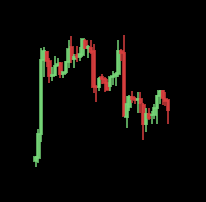

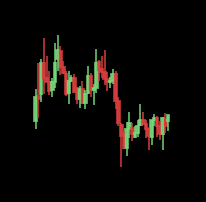

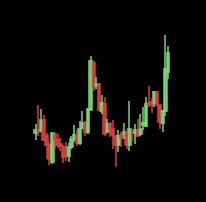

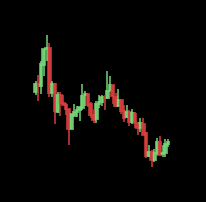

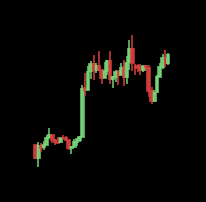

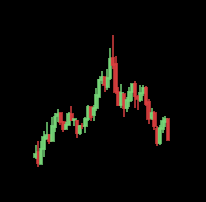

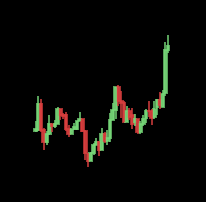

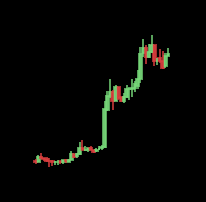

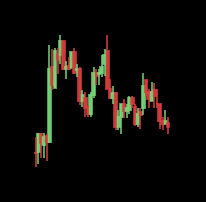

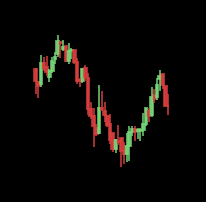

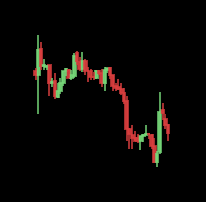

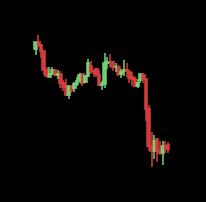

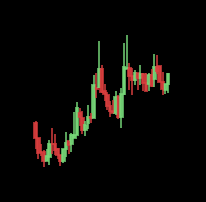

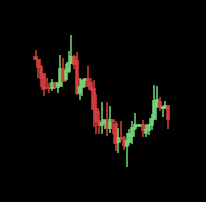

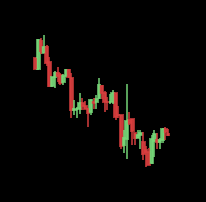

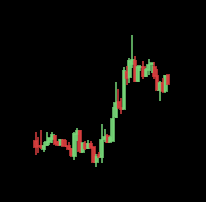

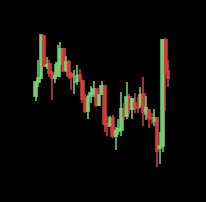

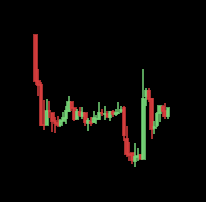

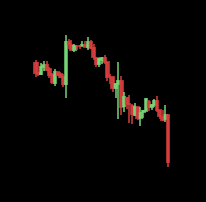

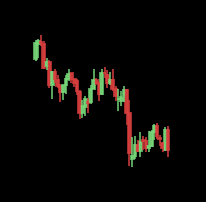

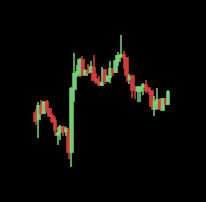

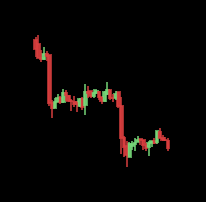

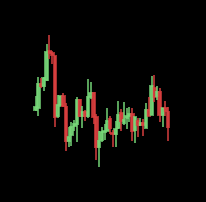

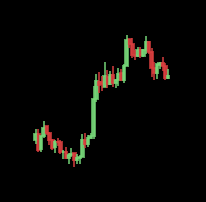

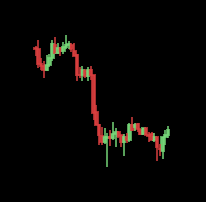

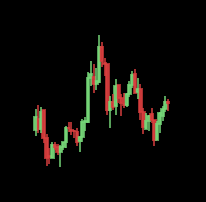

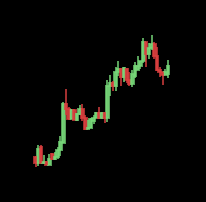

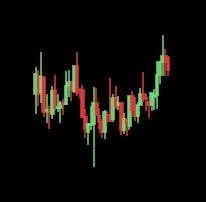

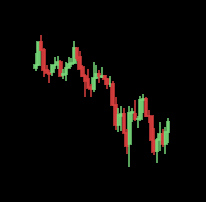

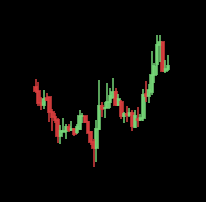

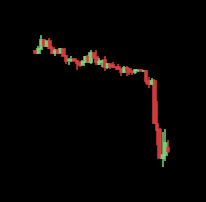

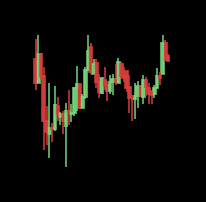

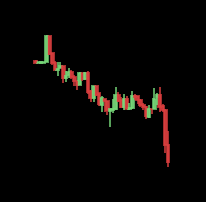

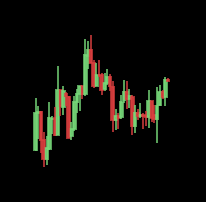

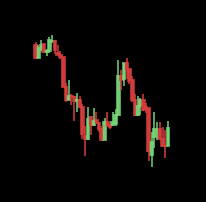

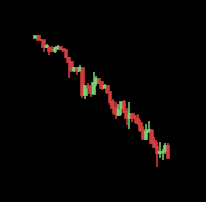

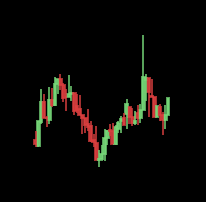

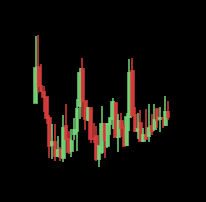

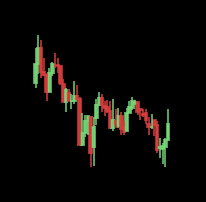

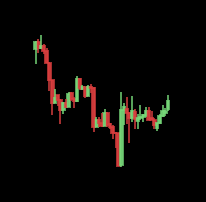

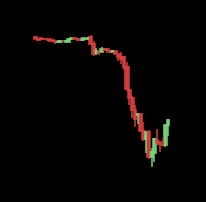

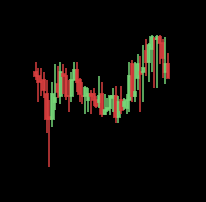

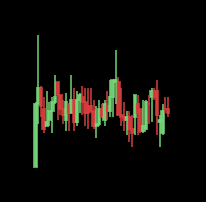

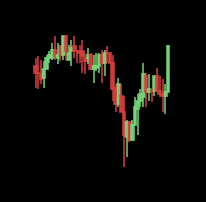

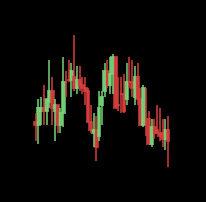

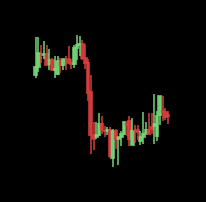

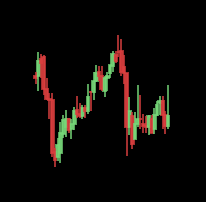

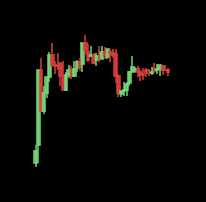

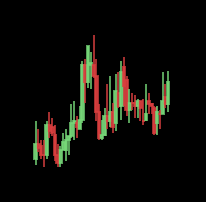

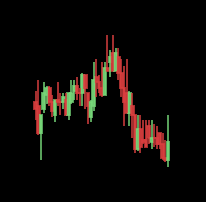

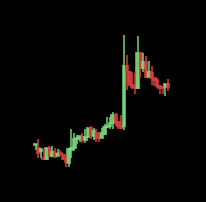

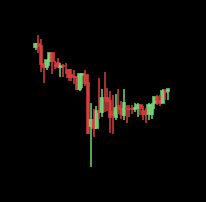

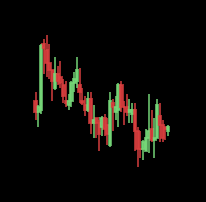

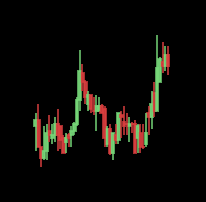

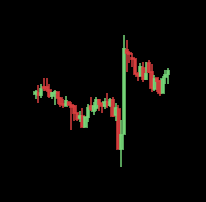

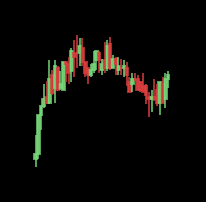

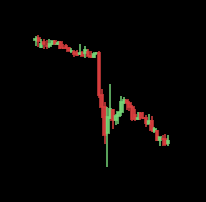

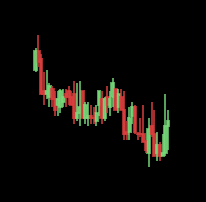

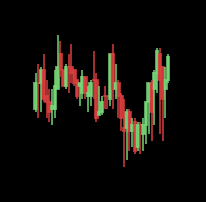

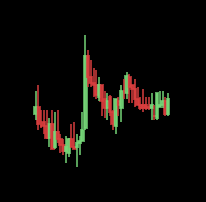

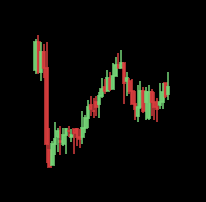

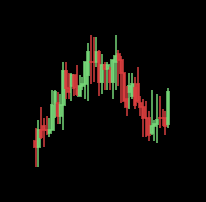

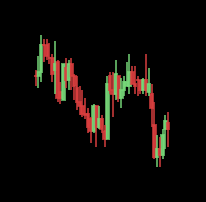

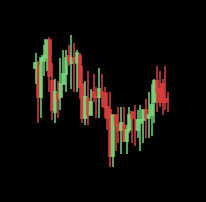

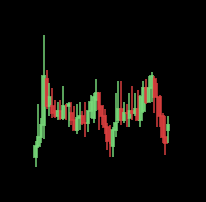

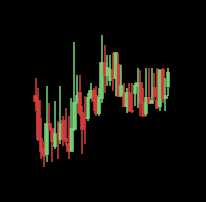

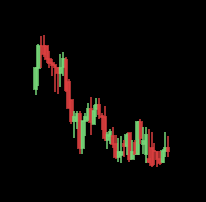

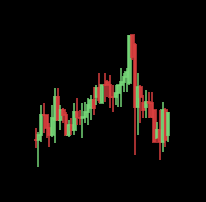

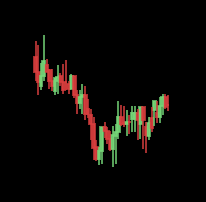

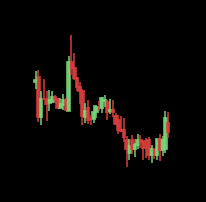

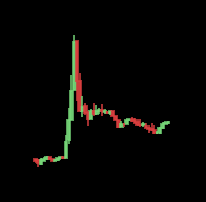

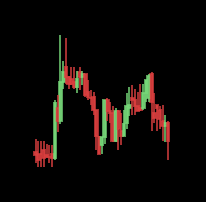

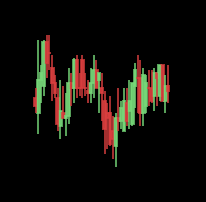

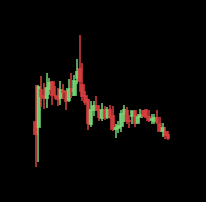

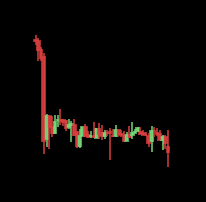

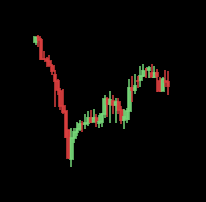

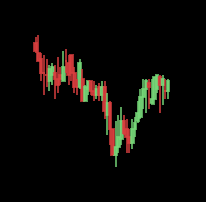

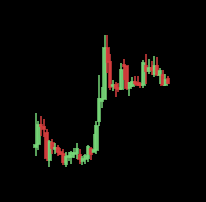

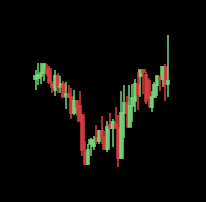

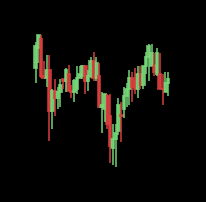

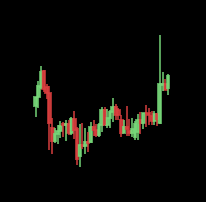

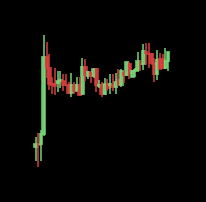

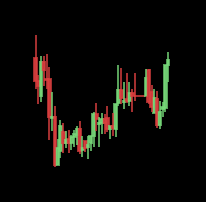

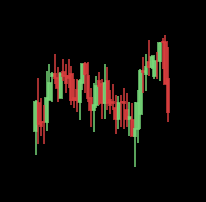

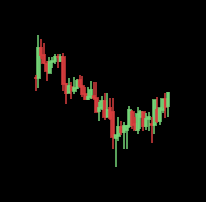

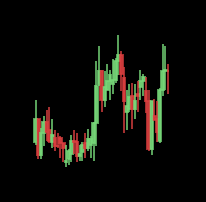

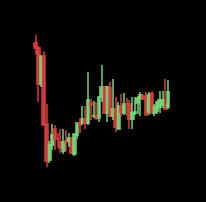

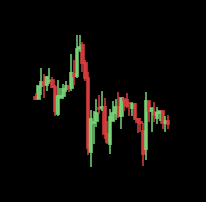

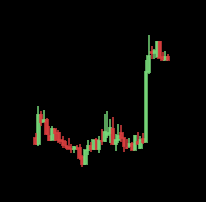

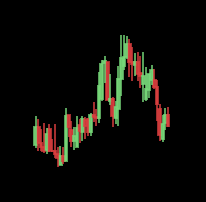

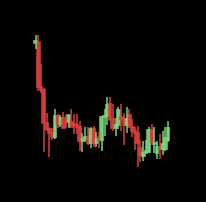

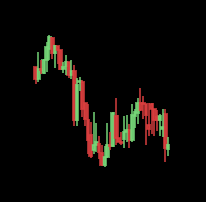

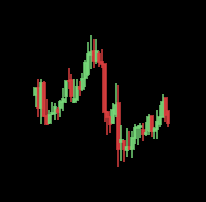

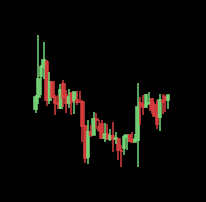

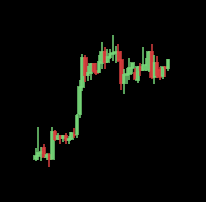

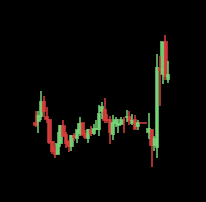

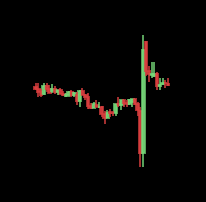

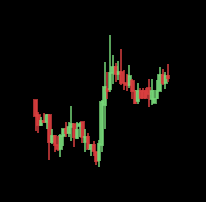

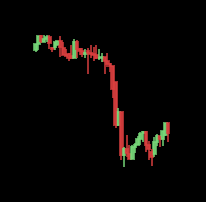

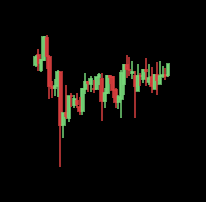

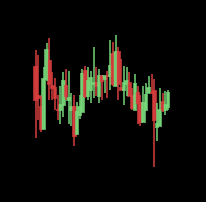

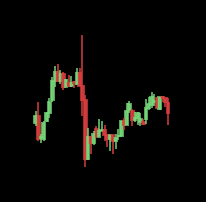

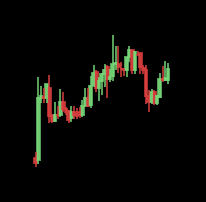

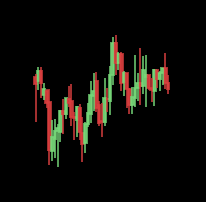

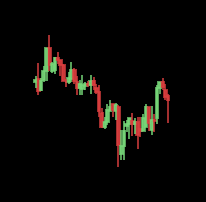

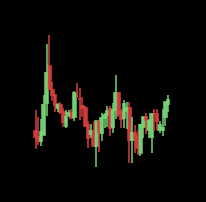

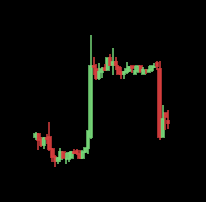

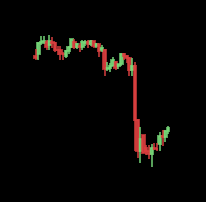

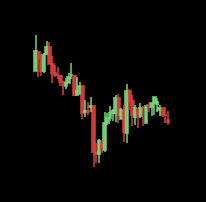

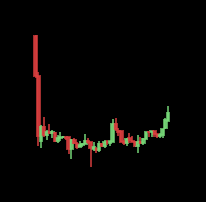

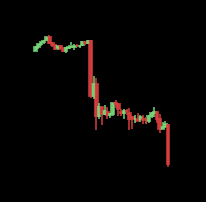

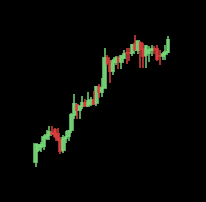

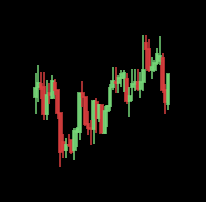

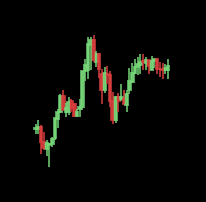

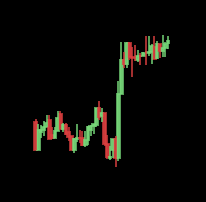

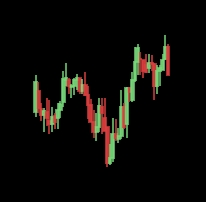

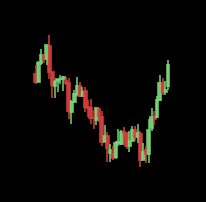

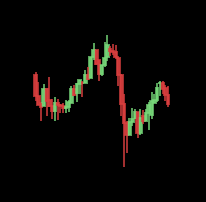

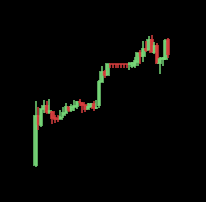

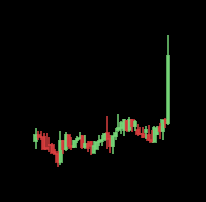

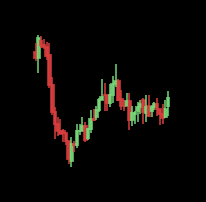

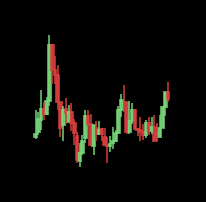

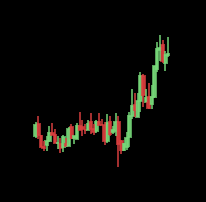

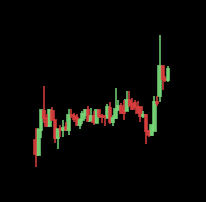

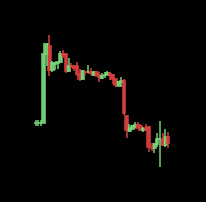

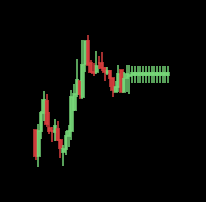

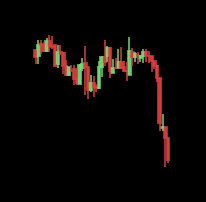

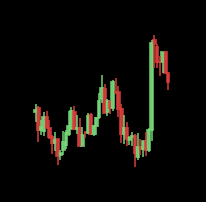

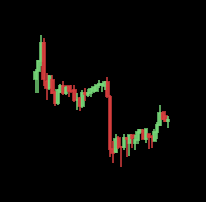

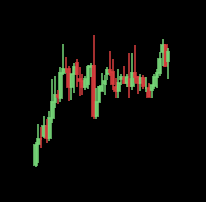

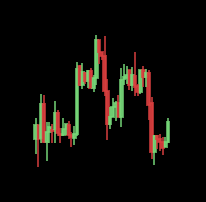

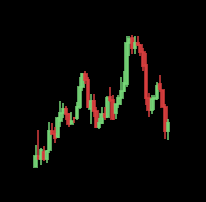

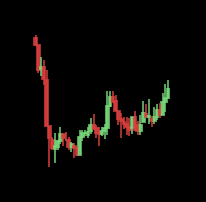

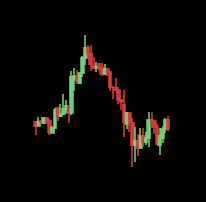

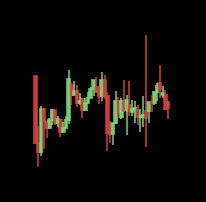

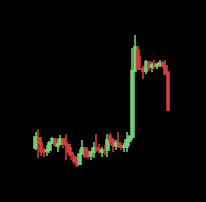

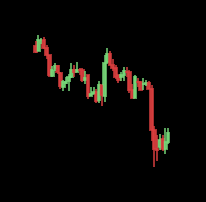

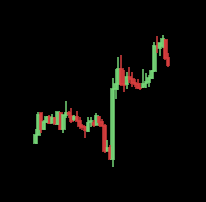

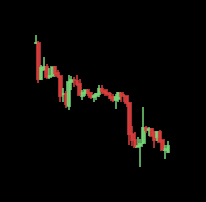

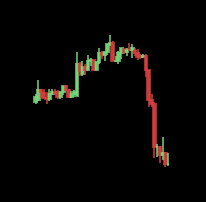

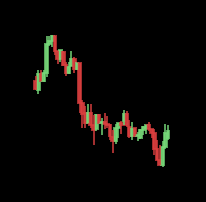

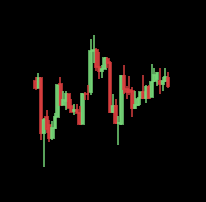

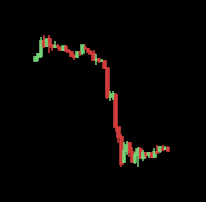

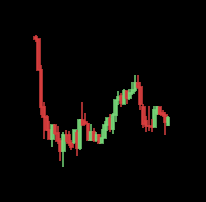

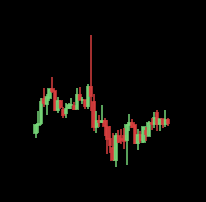

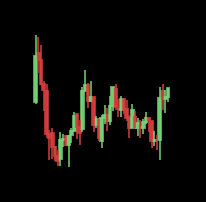

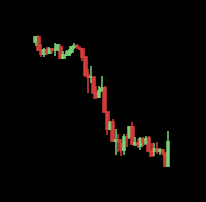

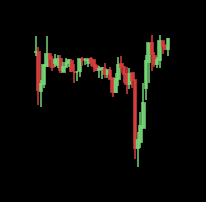

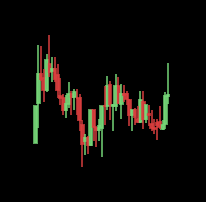

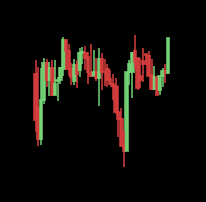

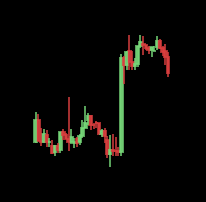

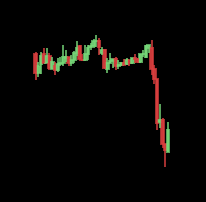

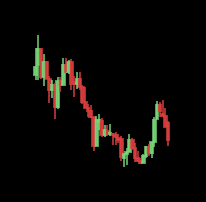

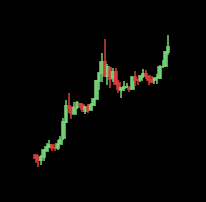

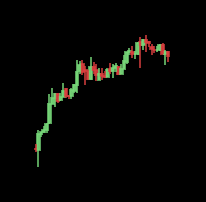

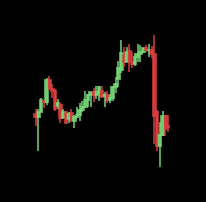

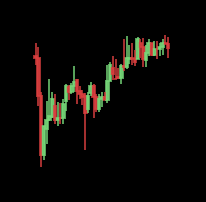

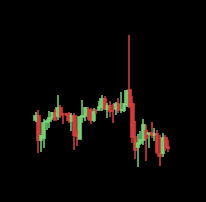

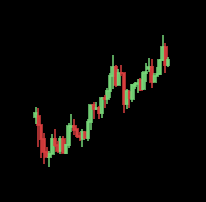

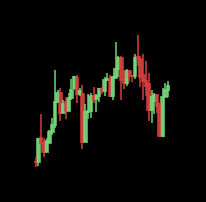

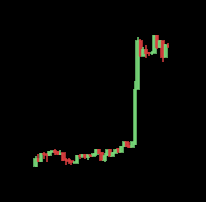

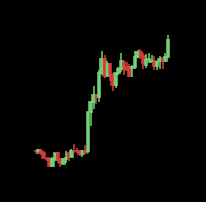

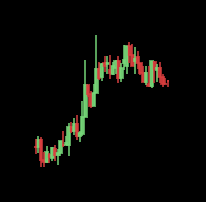

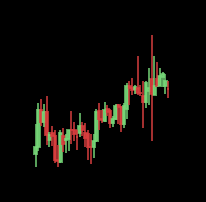

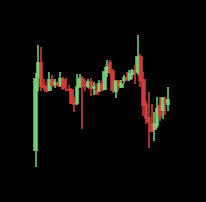

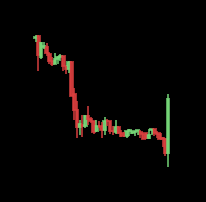

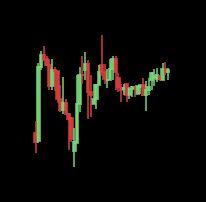

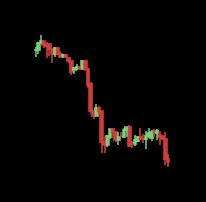

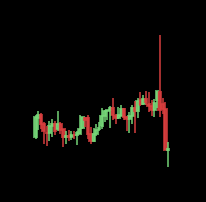

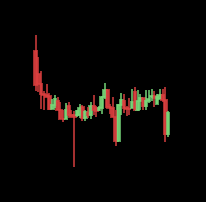

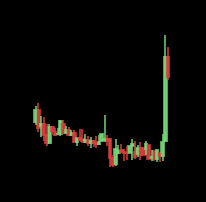

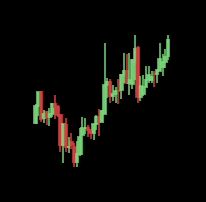

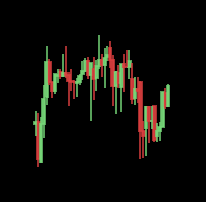

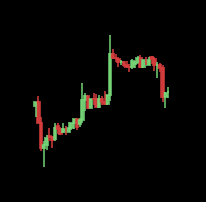

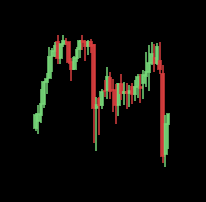

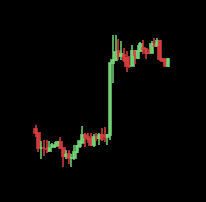

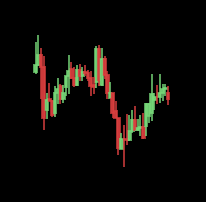

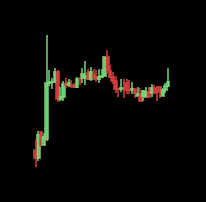

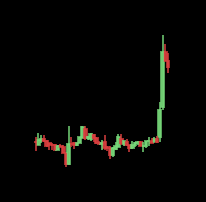

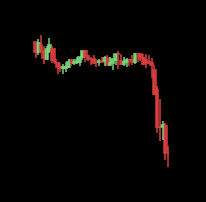

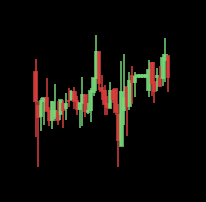

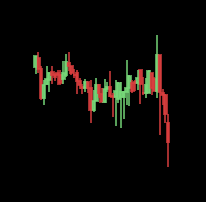

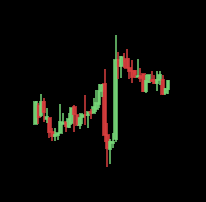

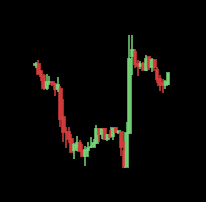

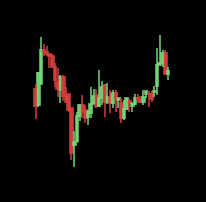

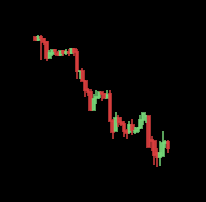

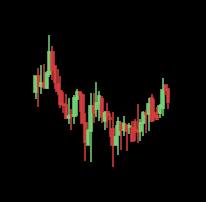

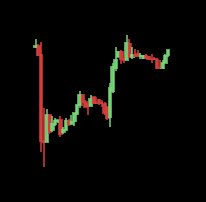

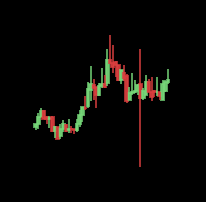

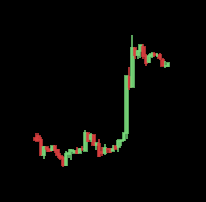

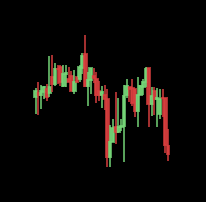

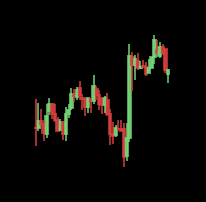

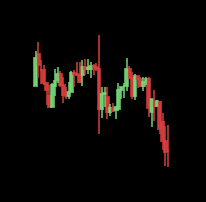

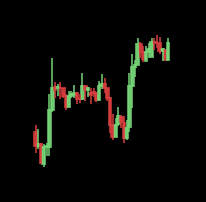

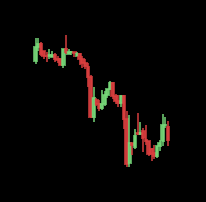

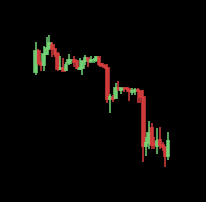

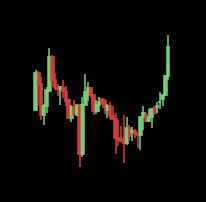

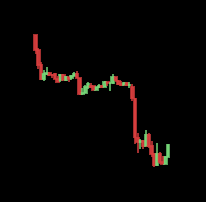

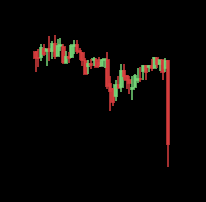

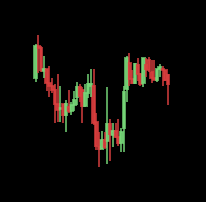

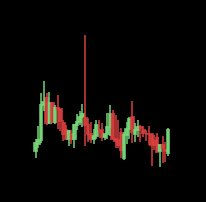

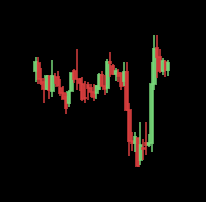

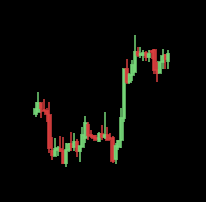

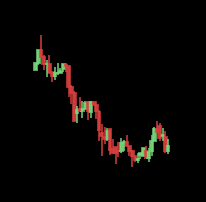

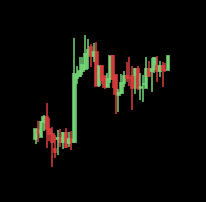

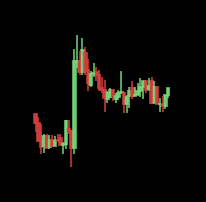

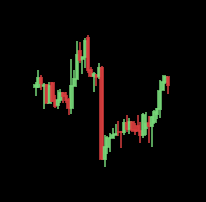

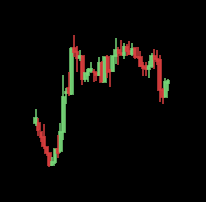

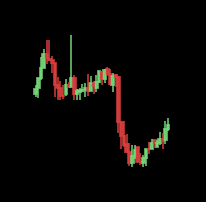

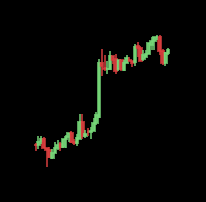

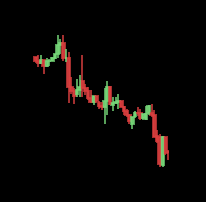

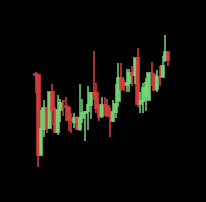

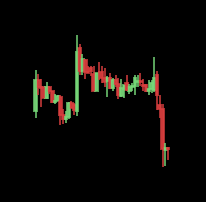

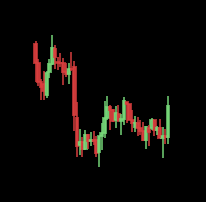

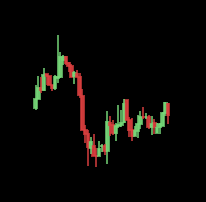

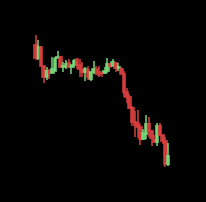

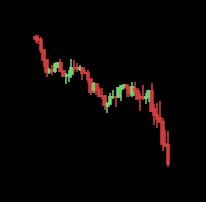

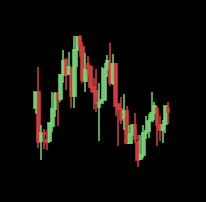

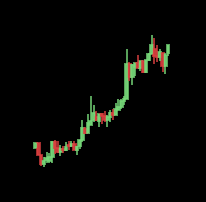

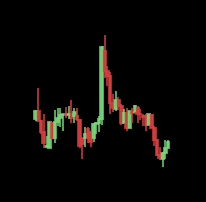

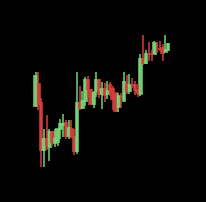

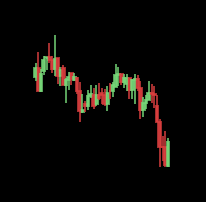

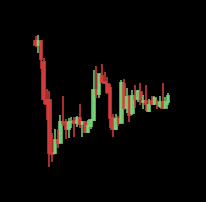

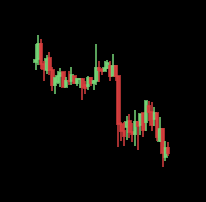

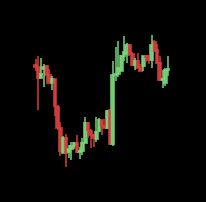

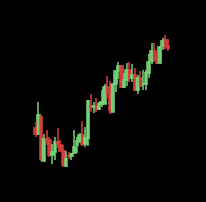

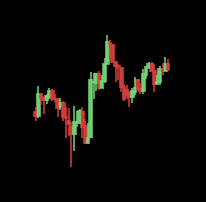

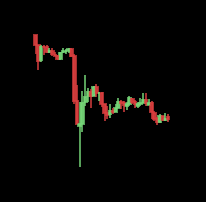

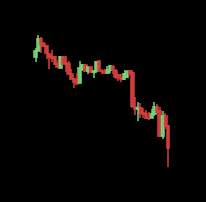

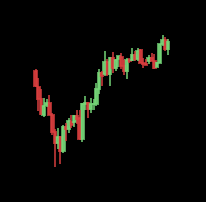

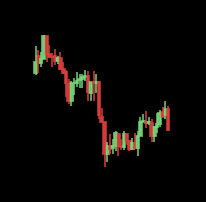

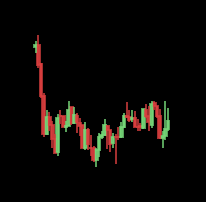

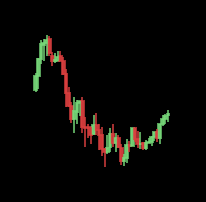

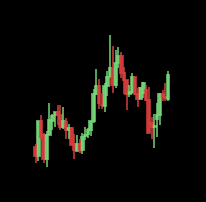

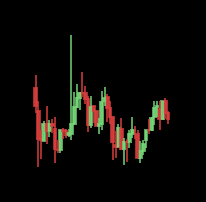

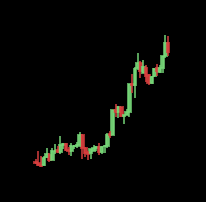

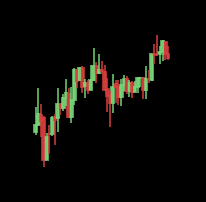

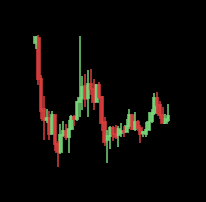

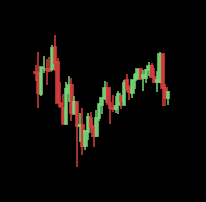

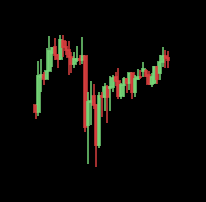

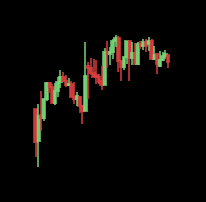

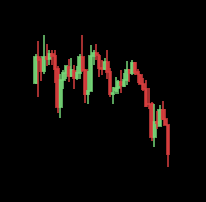

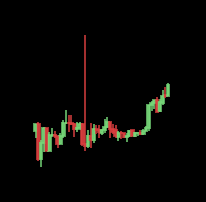

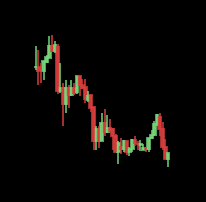

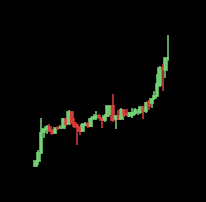

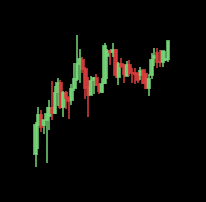

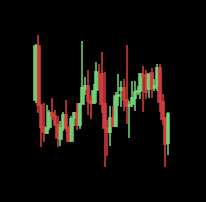

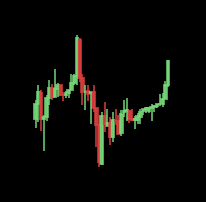

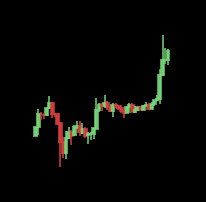

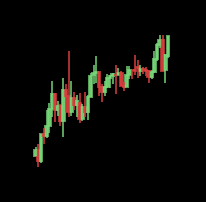

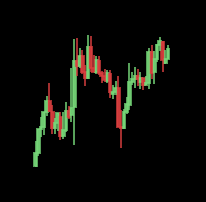

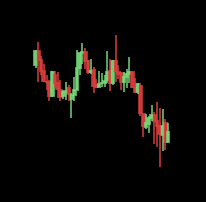

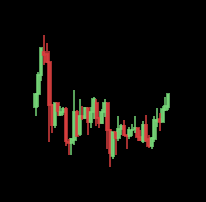

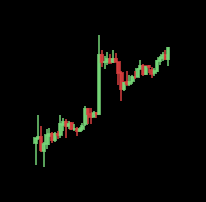

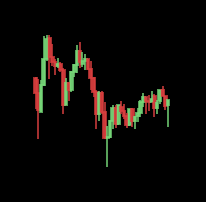

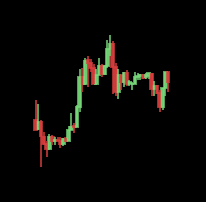

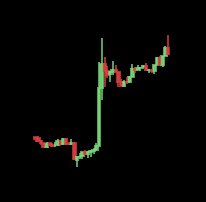

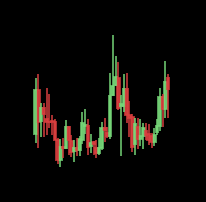

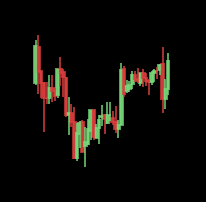

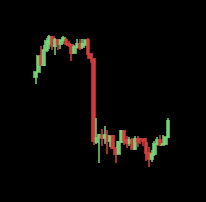

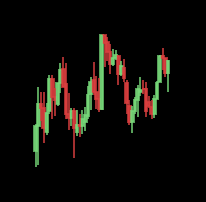

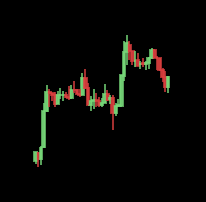

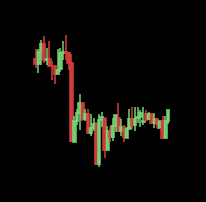

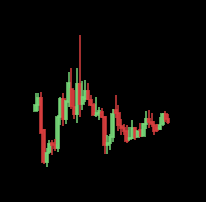

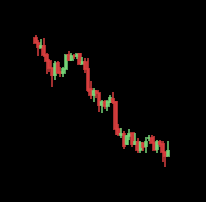

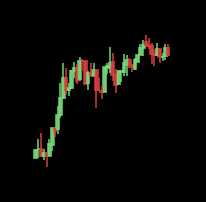

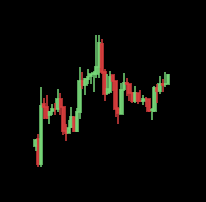

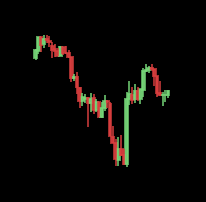

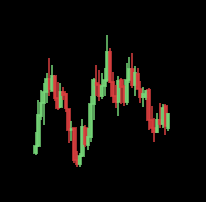

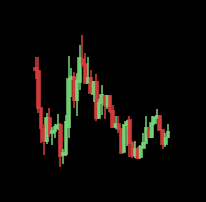

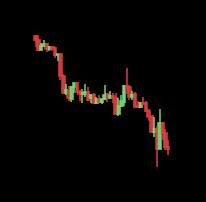

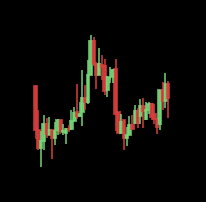

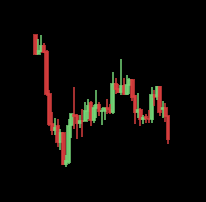

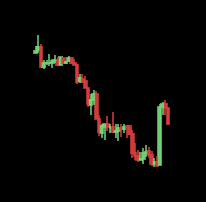

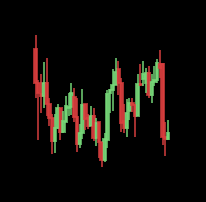

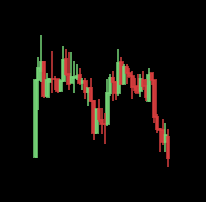

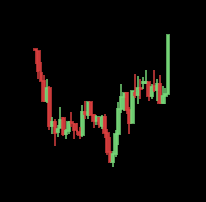

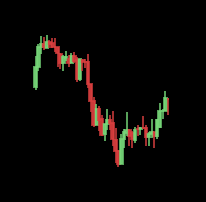

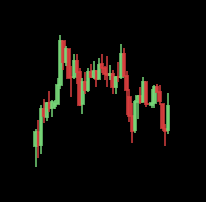

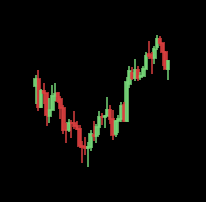

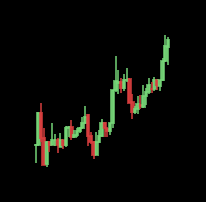

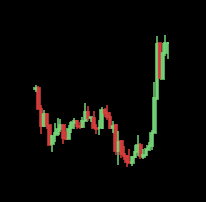

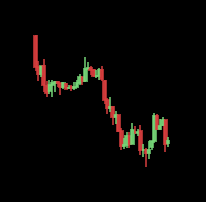

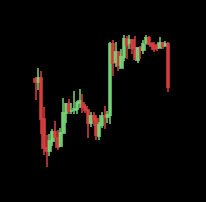

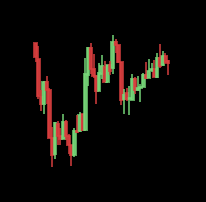

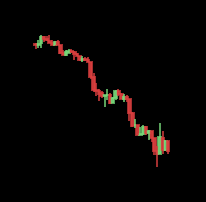

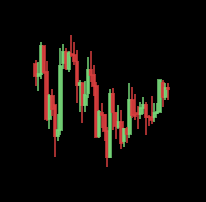

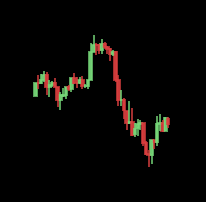

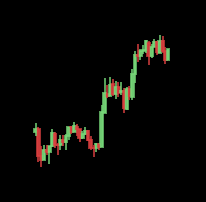

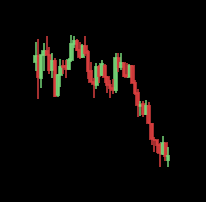

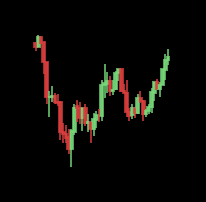

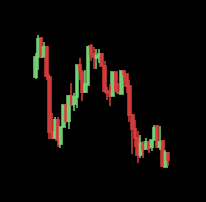

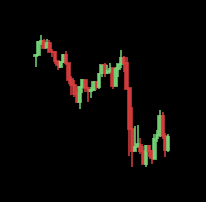

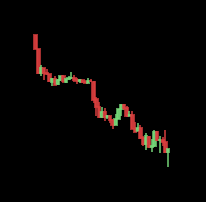

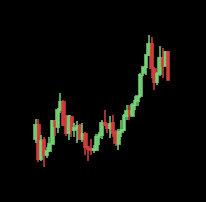

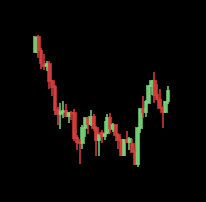

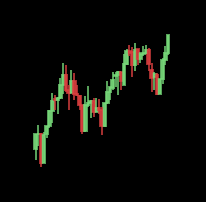

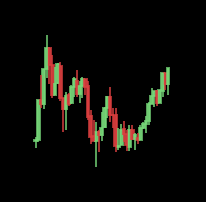

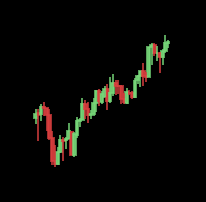

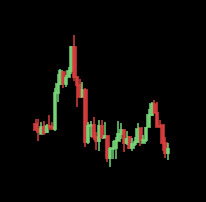

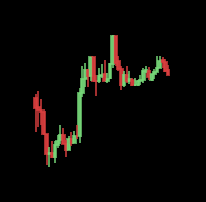

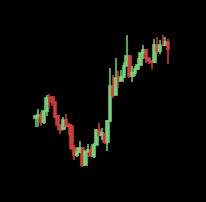

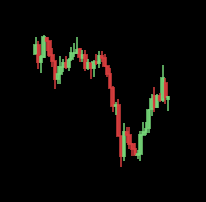

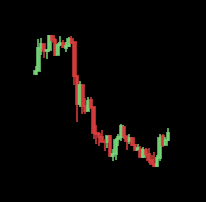

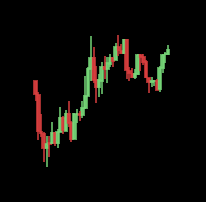

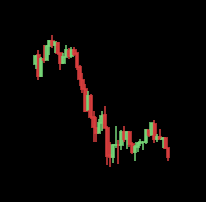

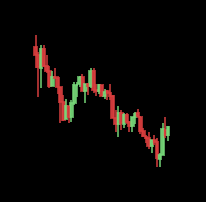

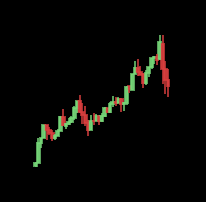

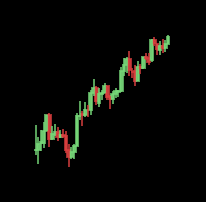

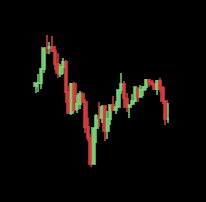

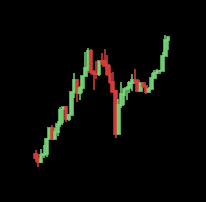

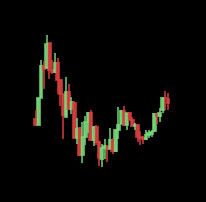

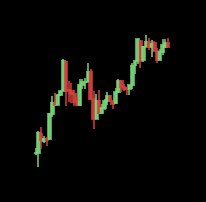

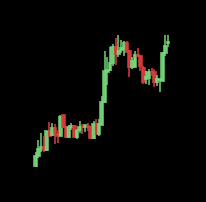

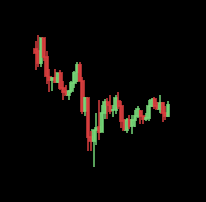

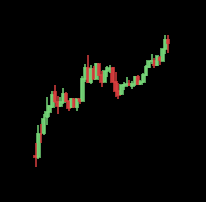

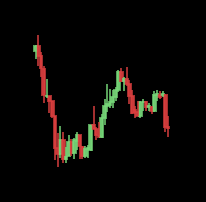

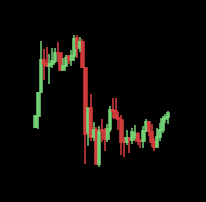

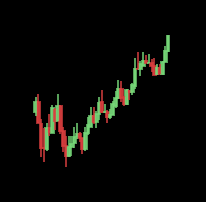

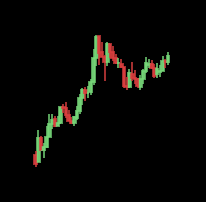

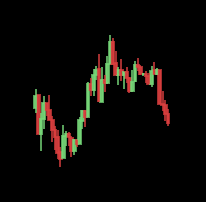

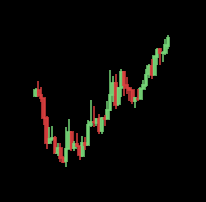

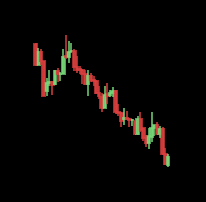

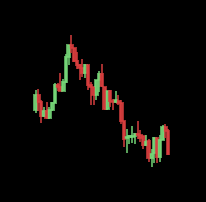

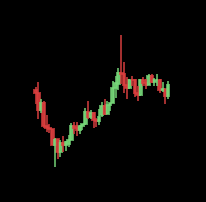

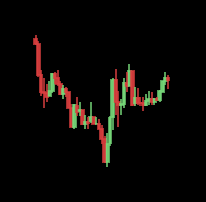

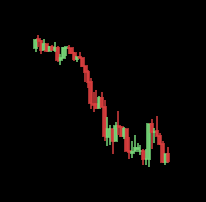

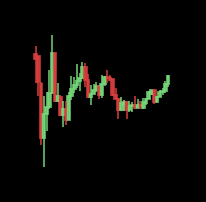

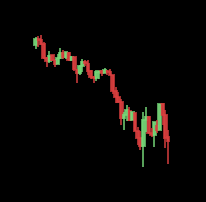

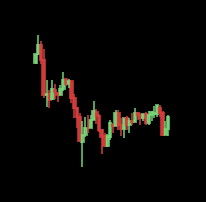

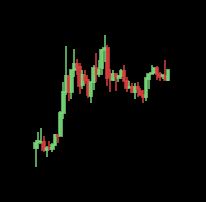

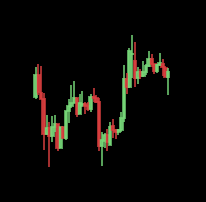

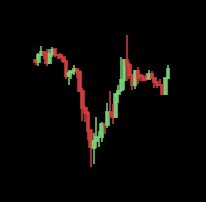

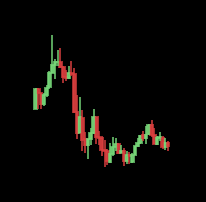

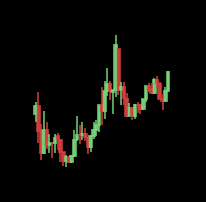

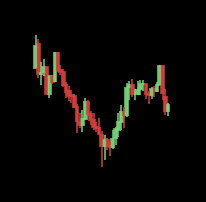

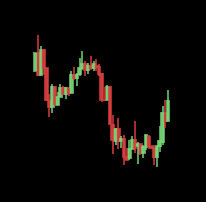

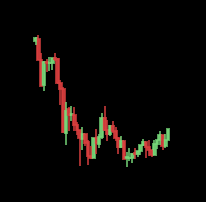

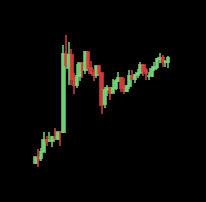

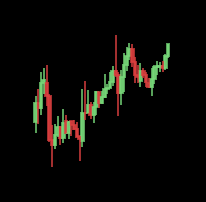

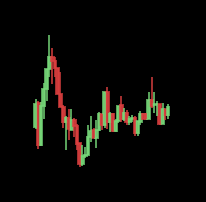

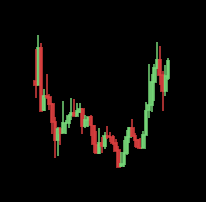

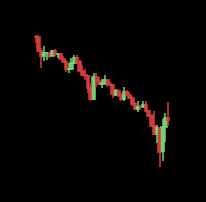

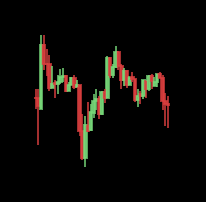

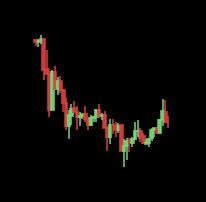

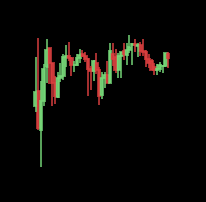

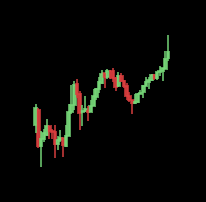

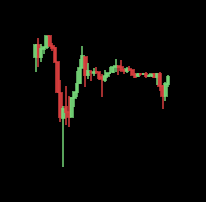

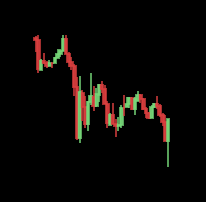

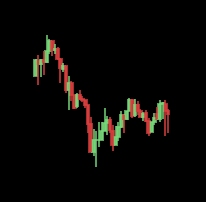

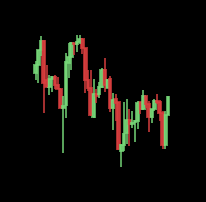

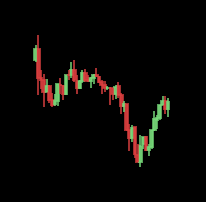

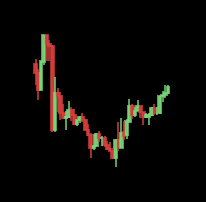

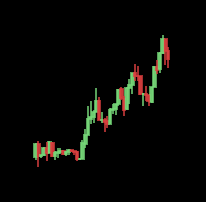

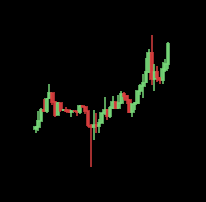

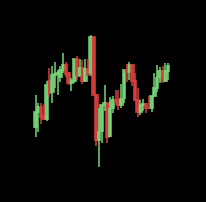

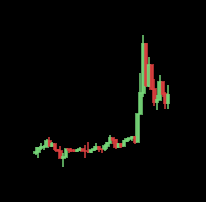

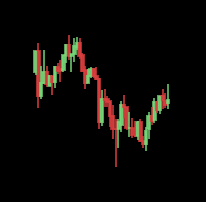

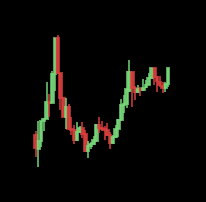

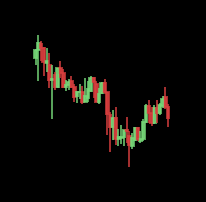

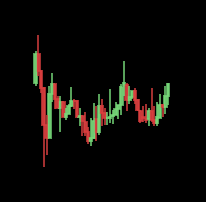

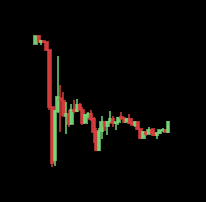

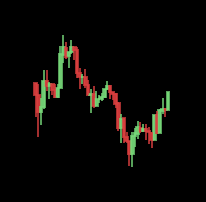

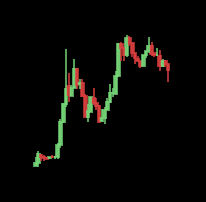

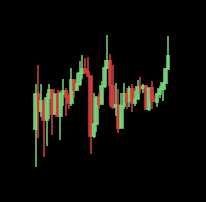

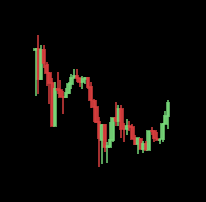

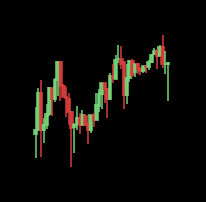

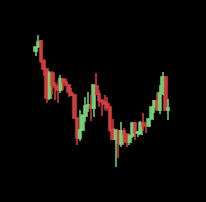

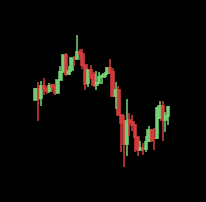

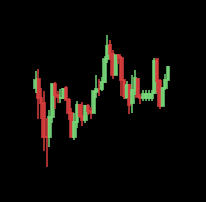

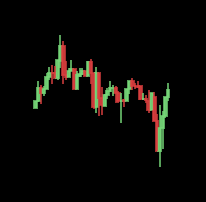

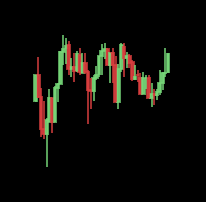

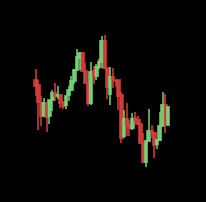

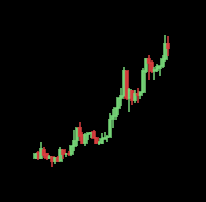

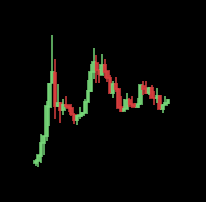

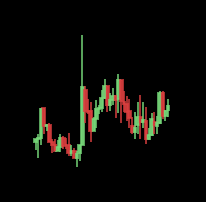

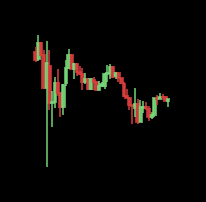

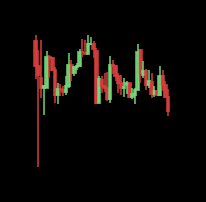

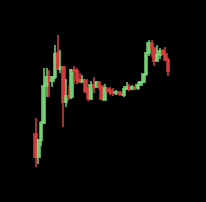

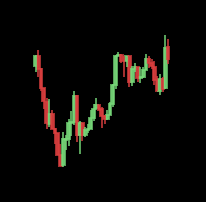

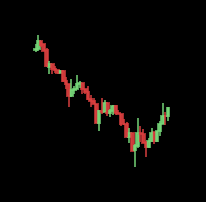

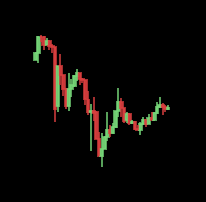

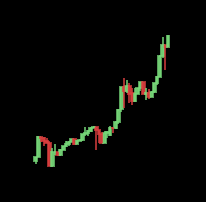

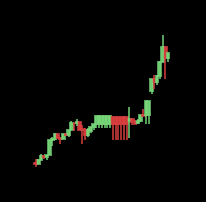

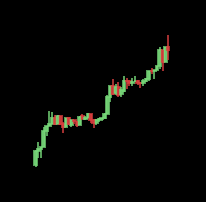

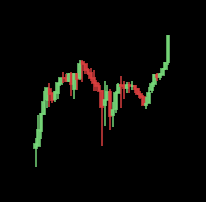

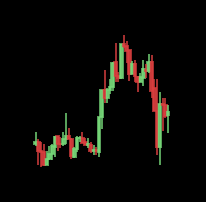

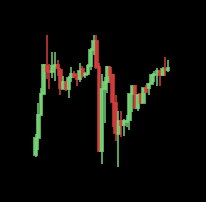

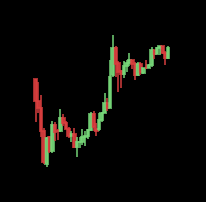

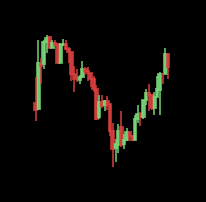

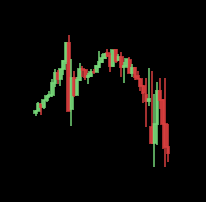

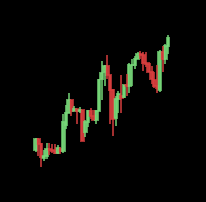

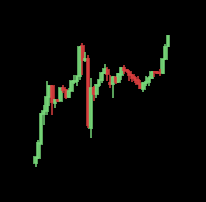

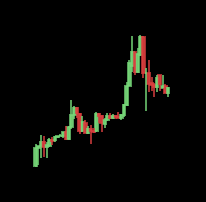

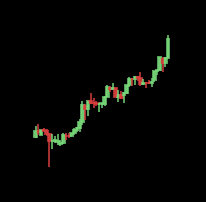

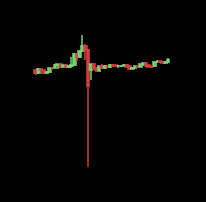

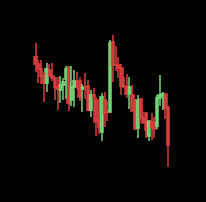

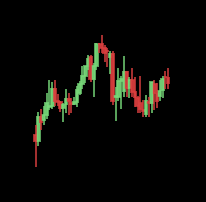

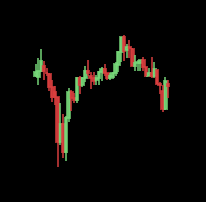

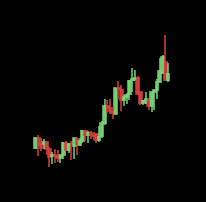

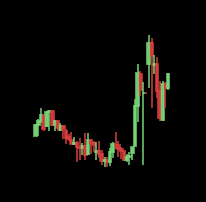

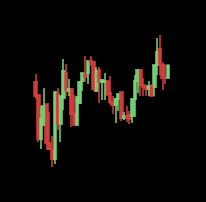

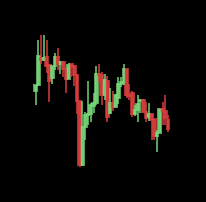

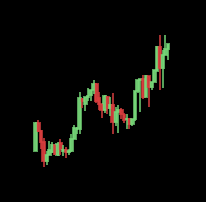

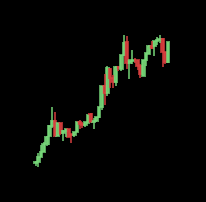

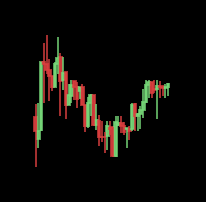

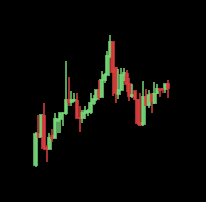

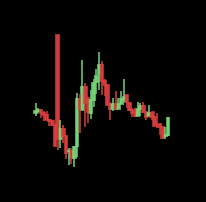

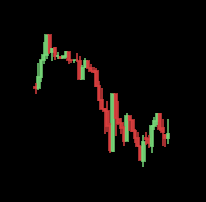

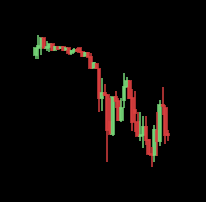

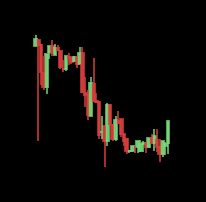

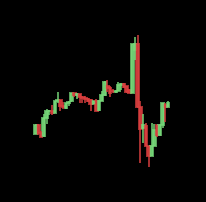

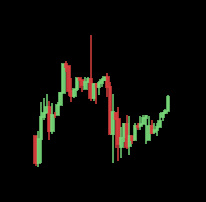

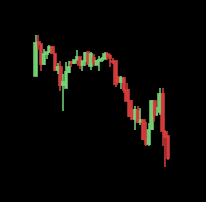

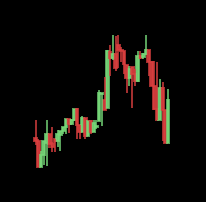

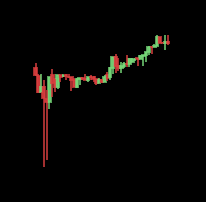

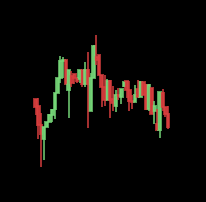

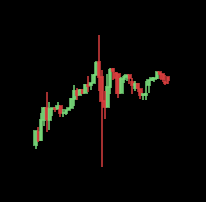

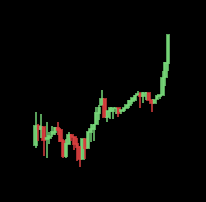

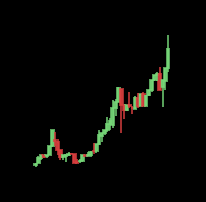

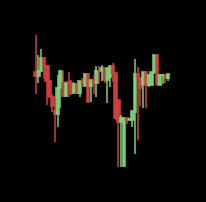

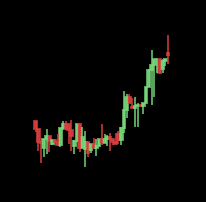

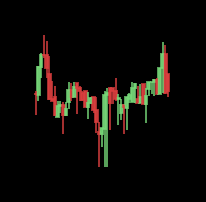

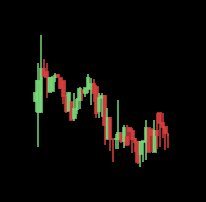

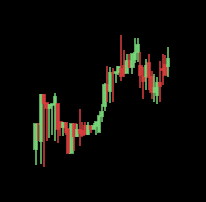

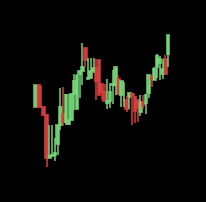

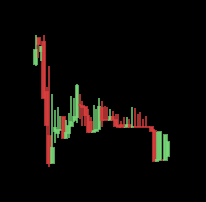

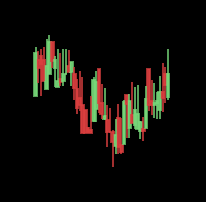

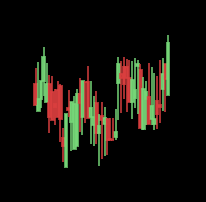

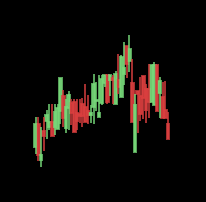

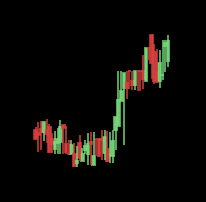

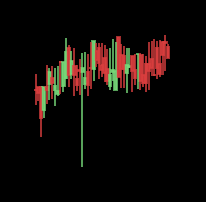

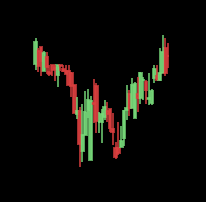

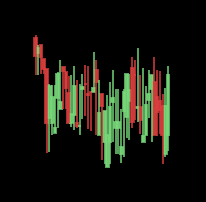

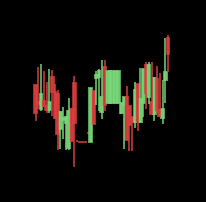

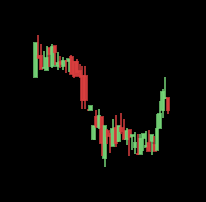

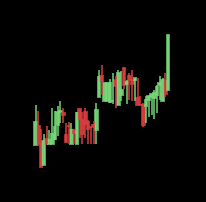

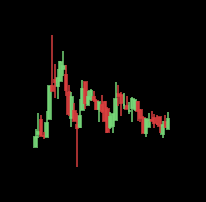

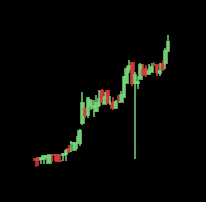

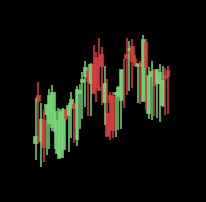

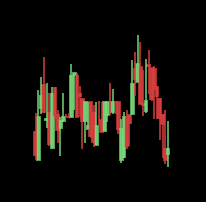

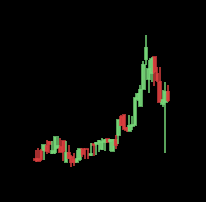

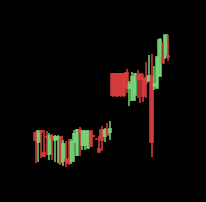

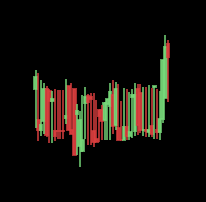

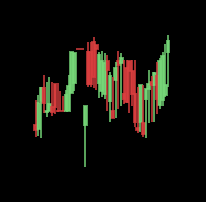

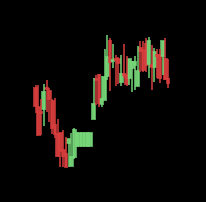

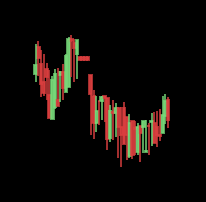

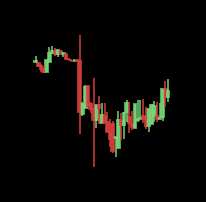

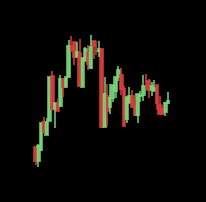

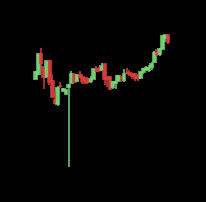

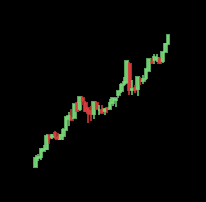

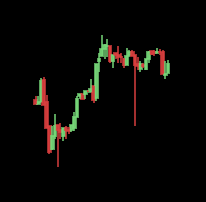

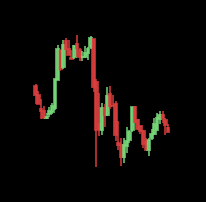

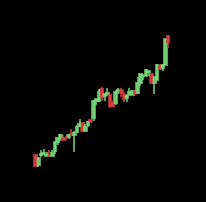

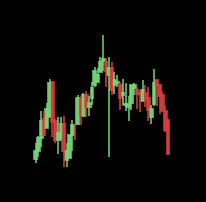

In [10]:
make_img(file_list)

## 캔들 패턴 분석
* 안보셔도 됩니다.

In [34]:
pip install TA-Lib

  Using cached TA-Lib-0.4.24.tar.gz (269 kB)
  Created wheel for TA-Lib: filename=TA_Lib-0.4.24-cp39-cp39-macosx_10_9_x86_64.whl size=386519 sha256=82ed75502d1db8dd529c50556cb2af0a7f3537ee0e638296df6b14b253e3c0c5
  Stored in directory: /Users/anjaeu/Library/Caches/pip/wheels/f6/c1/21/f37f7b0b19f995f2820f33bc6af33bf972900de1ebb7de9868
Successfully built TA-Lib
Note: you may need to restart the kernel to use updated packages.


In [42]:
import talib
import numpy as np

candle_names = talib.get_function_groups()['Pattern Recognition']
#talib.CDLTRISTAR(df['Open'], df['High'], df['Low'], df['Close'])
candle_names

['CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CDLPIERCING',
 'CDLRICKSHAWMAN',
 'CDLRISEFALL3METHODS',
 'CDLSEPARATINGLINES',
 'CDLSHOOTINGSTAR',
 'CDLSHORTLINE',
 'CDLSPINNINGTOP',
 'CDLSTALLEDPATTERN',
 

In [40]:
res = pd.DataFrame(data = {x : getattr(talib, x)(open = df['Open'], high = df['High'], 
                                                 low = df['Low'], close = df['Close']).replace(0, np.nan)
                          for x in candle_names})
res.idxmax(axis=1)

DateTime
2022-04-28 23:30:00                   NaN
2022-04-29 00:00:00                   NaN
2022-04-29 00:30:00                   NaN
2022-04-29 01:00:00                   NaN
2022-04-29 01:30:00                   NaN
2022-04-29 02:00:00                   NaN
2022-04-29 02:30:00                   NaN
2022-04-29 03:00:00                   NaN
2022-04-29 03:30:00                   NaN
2022-04-29 04:00:00                   NaN
2022-04-29 04:30:00               CDLDOJI
2022-04-29 05:00:00        CDLSPINNINGTOP
2022-04-29 05:30:00           CDLBELTHOLD
2022-04-29 06:00:00        CDLSPINNINGTOP
2022-04-29 06:30:00     CDLINVERTEDHAMMER
2022-04-29 07:00:00               CDLDOJI
2022-04-29 07:30:00           CDLLONGLINE
2022-04-29 08:00:00           CDLLONGLINE
2022-04-29 08:30:00             CDLHAMMER
2022-04-29 09:00:00                   NaN
2022-04-29 09:30:00           CDLHIGHWAVE
2022-04-29 10:00:00        CDLSPINNINGTOP
2022-04-29 10:30:00            CDLHIKKAKE
2022-04-29 11:00:00      

In [59]:
df_day = pd.read_csv('btc_day.csv')
df_day = df_day.drop(['Unnamed: 5'],axis = 1)
df_day

Date      Open      High       Low     Close
0     2022.04.29  50543000  50712000  49400000  49715000
1     2022.04.28  49915000  51169000  49667000  50549000
2     2022.04.27  48720000  50067000  48570000  49918000
3     2022.04.26  50623000  51147000  48202000  48710000
4     2022.04.25  49617000  50897000  48560000  50633000
...          ...       ...       ...       ...       ...
1670  2017.09.30   4658000   4898000   4654000   4891000
1671  2017.09.29   4592000   4710000   4478000   4658000
1672  2017.09.28   4654000   4791000   4518000   4592000
1673  2017.09.27   4320000   4680000   4313000   4654000
1674  2017.09.26   4319000   4420000   4306000   4320000

[1675 rows x 5 columns]

In [60]:
df_day.index = pd.DatetimeIndex(df_day['Date'])
df_day = df_day.drop(['Date'], axis = 1)
df_day = df_day.sort_values('Date', ascending=True)
df_day = df_day.astype(int)
df_day

Open      High       Low     Close
Date                                              
2017-09-26   4319000   4420000   4306000   4320000
2017-09-27   4320000   4680000   4313000   4654000
2017-09-28   4654000   4791000   4518000   4592000
2017-09-29   4592000   4710000   4478000   4658000
2017-09-30   4658000   4898000   4654000   4891000
...              ...       ...       ...       ...
2022-04-25  49617000  50897000  48560000  50633000
2022-04-26  50623000  51147000  48202000  48710000
2022-04-27  48720000  50067000  48570000  49918000
2022-04-28  49915000  51169000  49667000  50549000
2022-04-29  50543000  50712000  49400000  49715000

[1675 rows x 4 columns]

In [57]:
df_day.dtypes

Open     int64
High     int64
Low      int64
Close    int64
dtype: object

In [74]:
res = pd.DataFrame(data = {x : getattr(talib, x)(open = df_day['Open'], high = df_day['High'], 
                                                 low = df_day['Low'], close = df_day['Close']).replace(0, np.nan)
                          for x in candle_names})
df_day['Pattern'] = res.idxmax(axis=1)
df_day = df_day.dropna()

In [75]:
df_day.to_csv('btc_day.csv')